# MLabsPy

I origonally started this project while working for an in-house AV company, mostly as a Power Distribution Technicain and Rigger, in my speare time.  It was only a basic script that ploted 3 graphs, made some HTML files with plotly and had to be run from the console. The code bellow are going to be used for a module that will only parse the log file and provide statistics on that file.

## PM-XXX Series Power Meter Logger

Details for the local Data logging format and how to import into excel is discussed in the manual (pg 23, 8. Local Data Logging):

https://www.motionlabs.com/wp-content/uploads/PM-XXX-UM.pdf

This Python nodebook and the modules I'm developing with it are going to have more posiblities for Data driven solutions than Excel.  This data can be used to get an understanding of how they use the electrical services are used by your big client

In [1]:
from os.path import basename

# my basic plot module
import MLabsPy as l
import MLabs_PlotLog as q


file='./test/test.csv'

## tkinter example
# https://stackoverflow.com/questions/20790926/ipython-notebook-open-select-file-with-gui-qt-dialog
# answered Sep 24 '19 at 23:50 Alireza Honarfar
#try:
#    from tkinter import Tk
#    from tkFileDialog import askopenfilenames
#except:
#    from tkinter import Tk
#    from tkinter import filedialog
#Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
#file = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file


ML = l.MLabsLogParse(file)

savedir = basename(file)
savedir

'test.csv'

## Record Time
This is the timestap that this record was taken



## default Settings for the plots
the plan is to use the above code to become a parser for the motion labs log files using numpy and some scipy.  I plan to further build on that to include a MySQL/Postgres import feature to allow large in house AV companies to use their motion labs logger data to make better informed sales desions that looks to maximize profits.  or you can do some other predictions if take enough readings.

bellow are calls to my matplotlib module for plotting this data

# Phase-Nutral voltages

120 Volts
L1, L2, L3


# Average Phase-Nutral voltage

Vavr



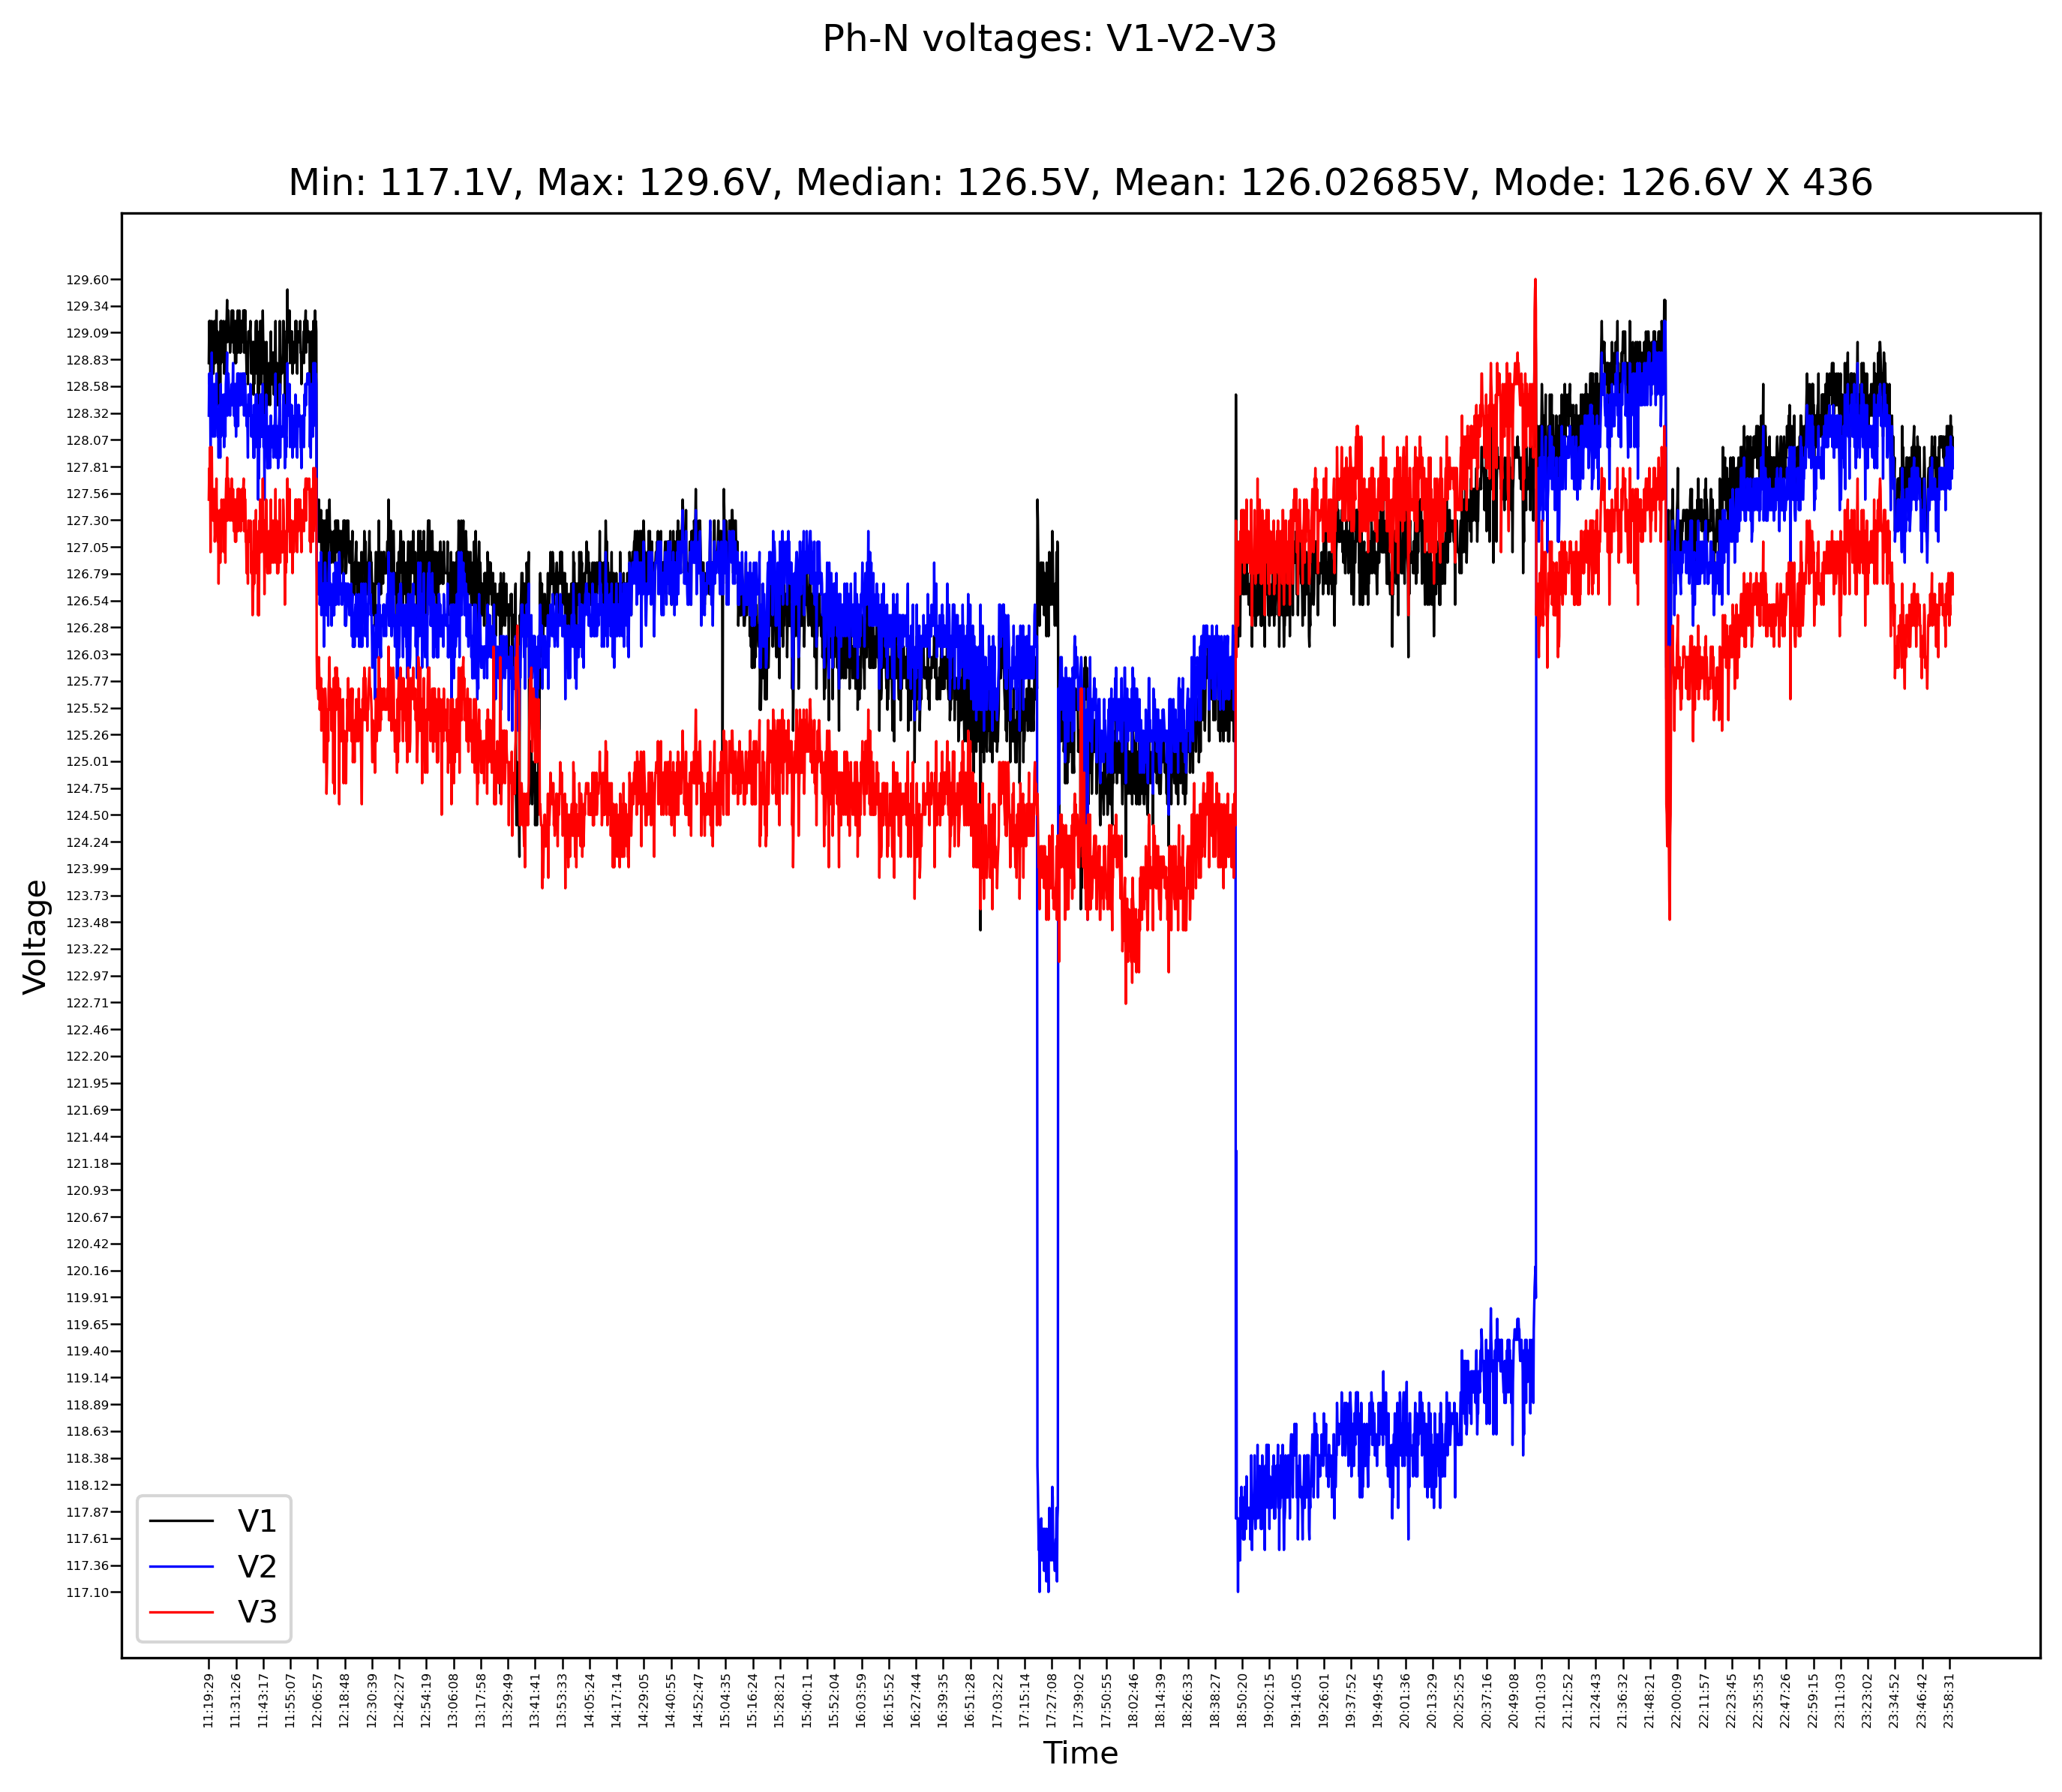

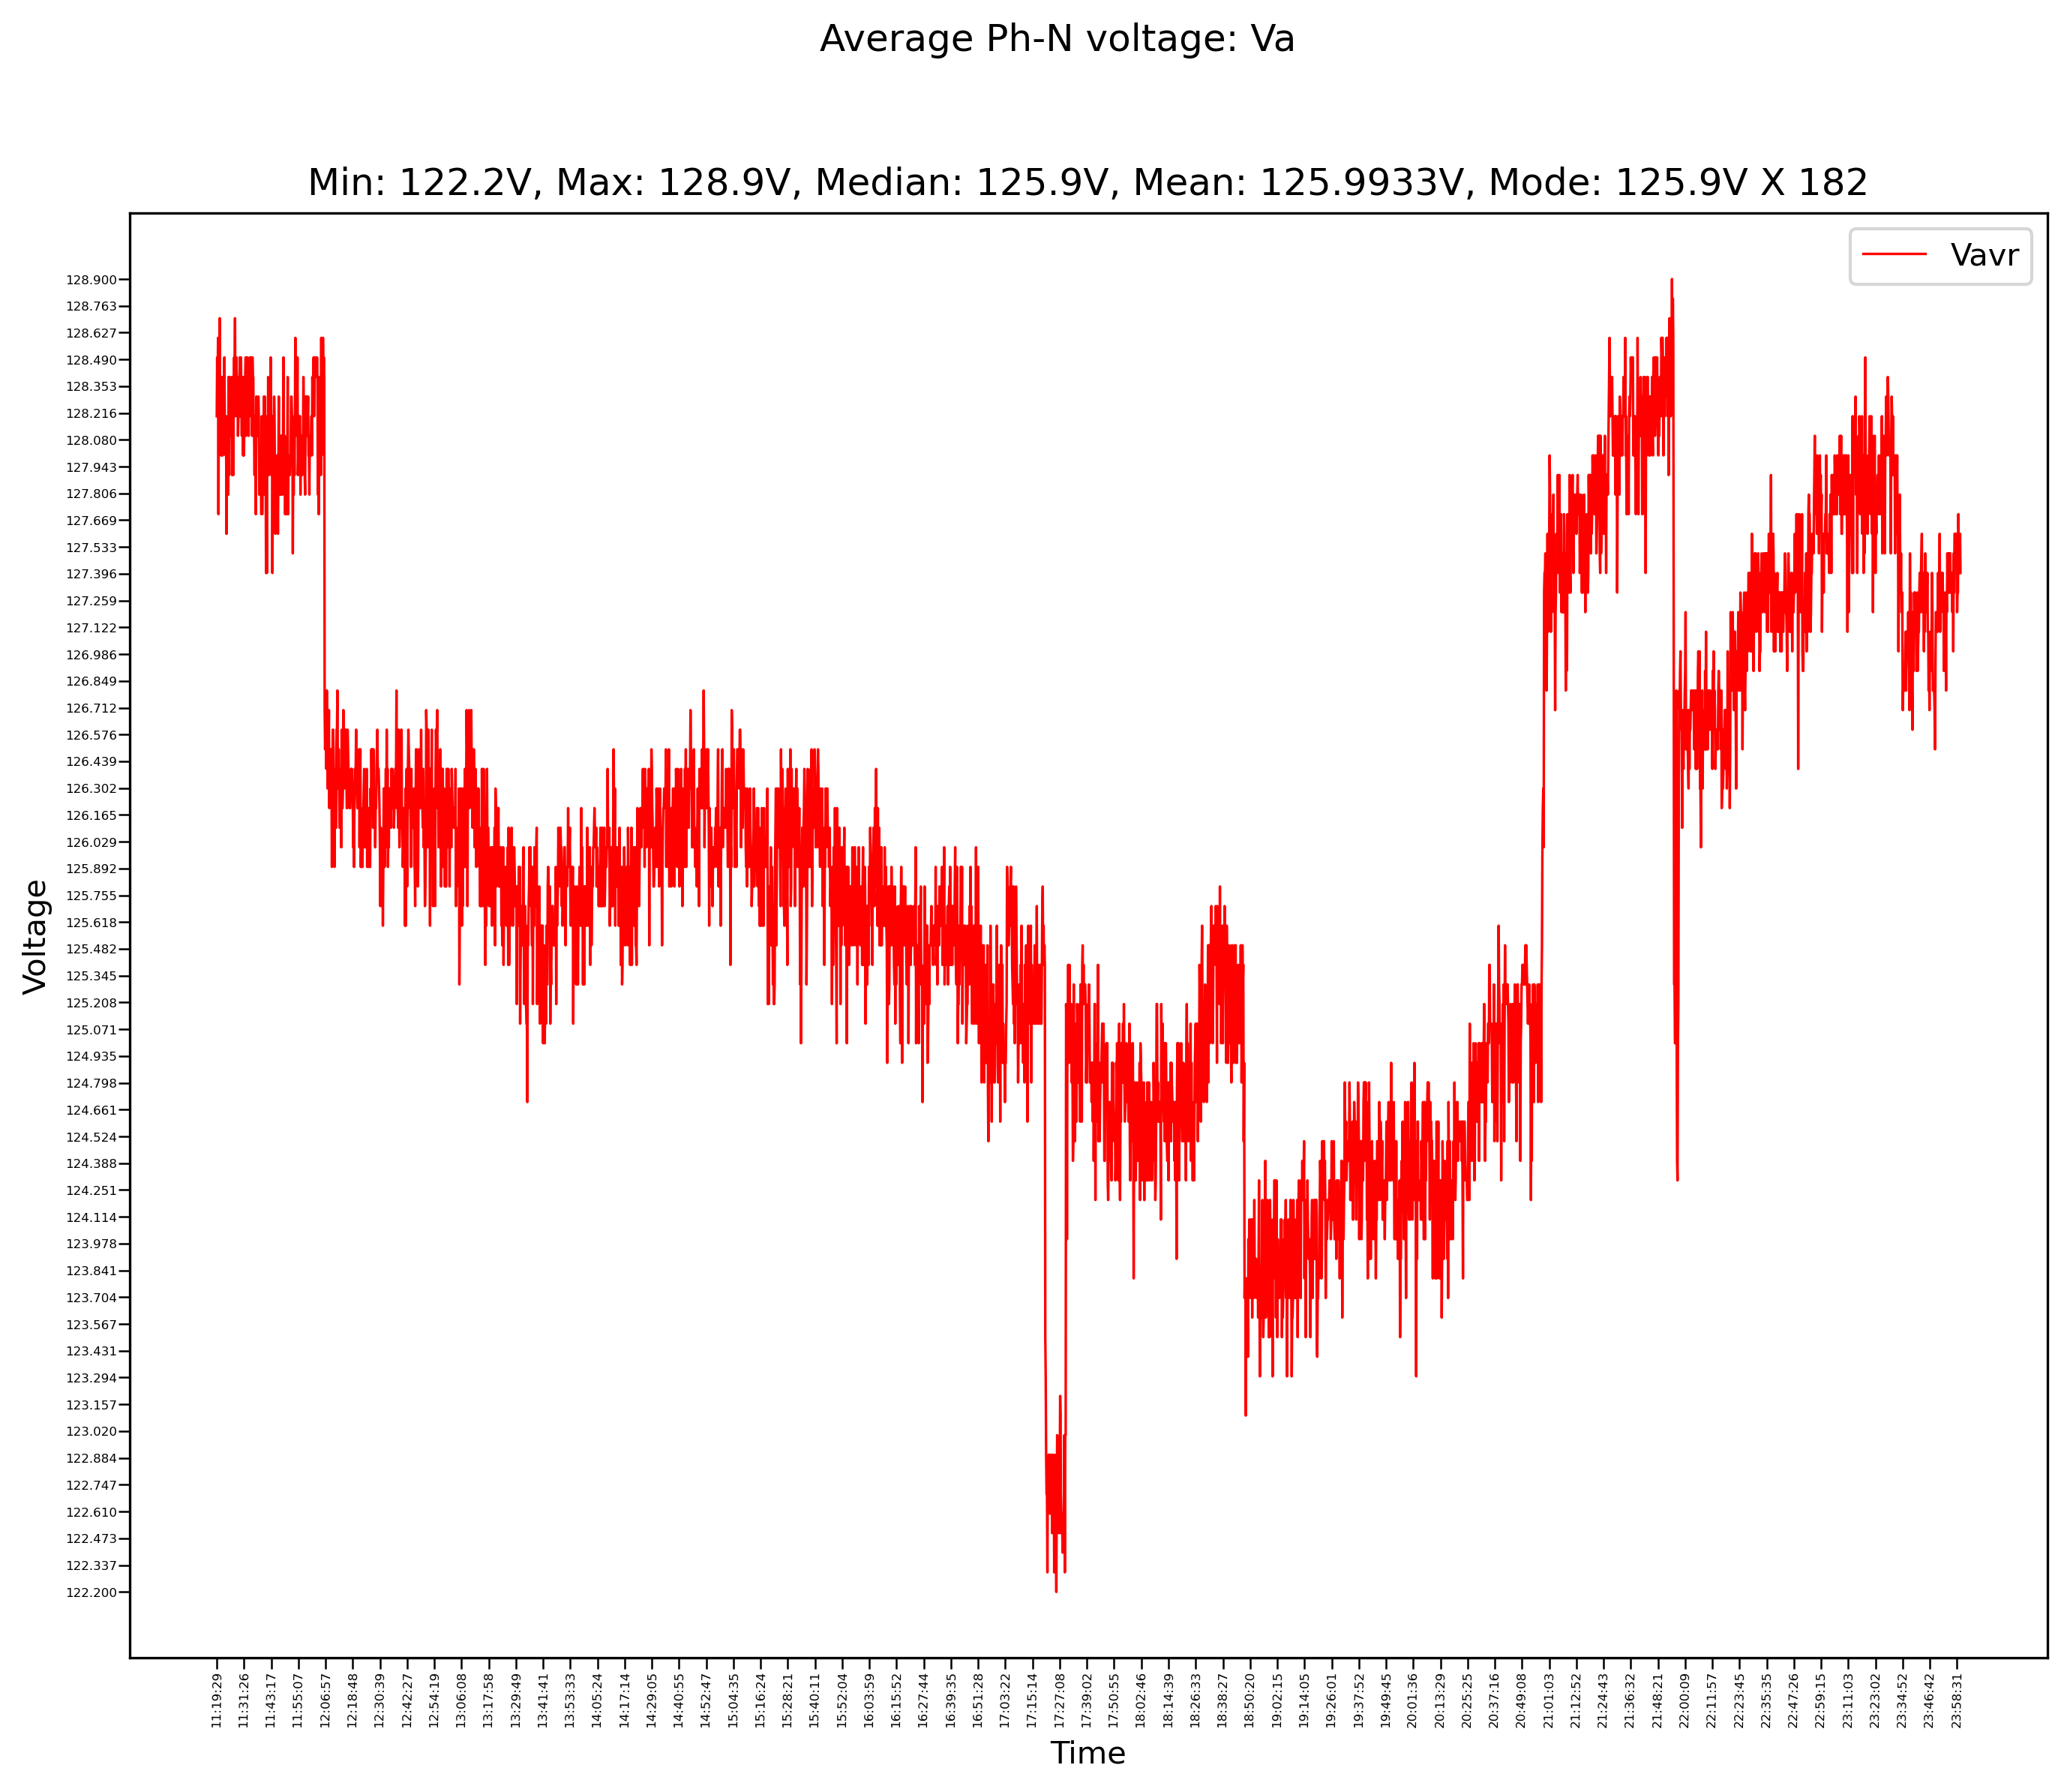

In [2]:
v120 = q.MLabsPlot('v120')
v120.mkplot(ML.multiData('v120'), savedir)
Vavr = q.MLabsPlot('Vavr')
Vavr.mkplot(ML.PlotData('Vavr'), savedir)

# Phase-Phase voltages

Graph the data for 208 Volts

L12, L23, L31

# Average Phase-Phase voltage

Uavr

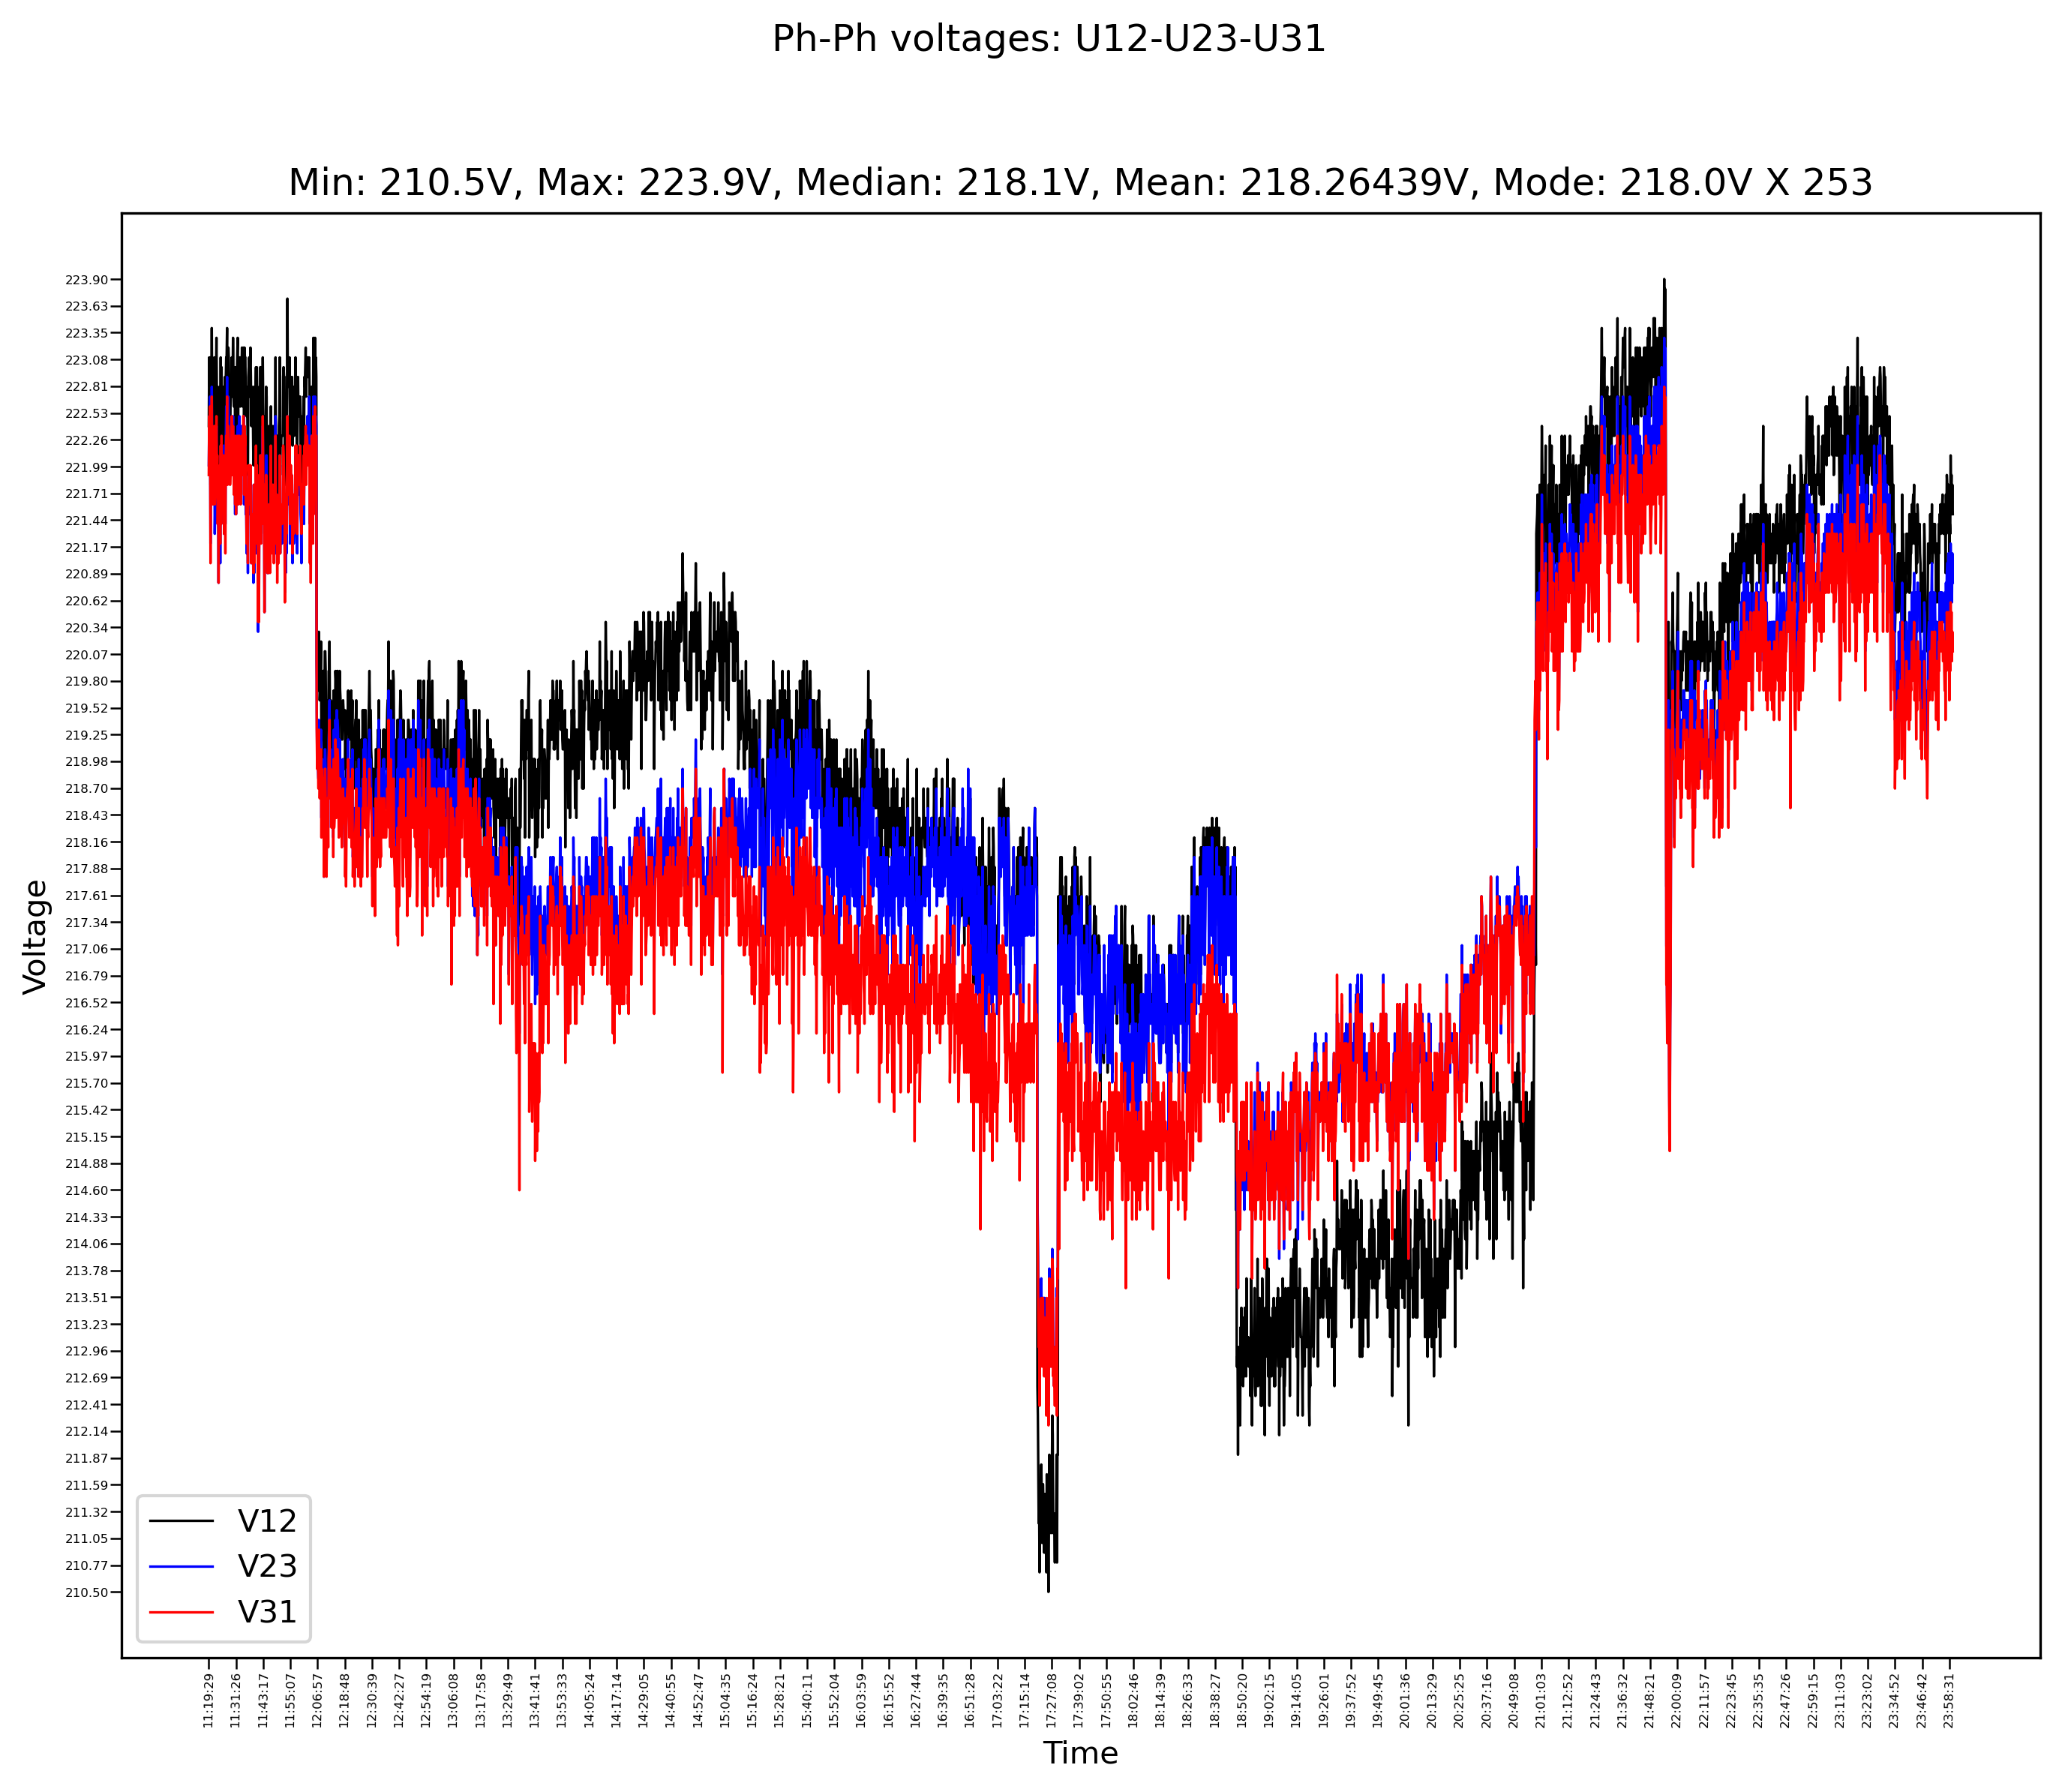

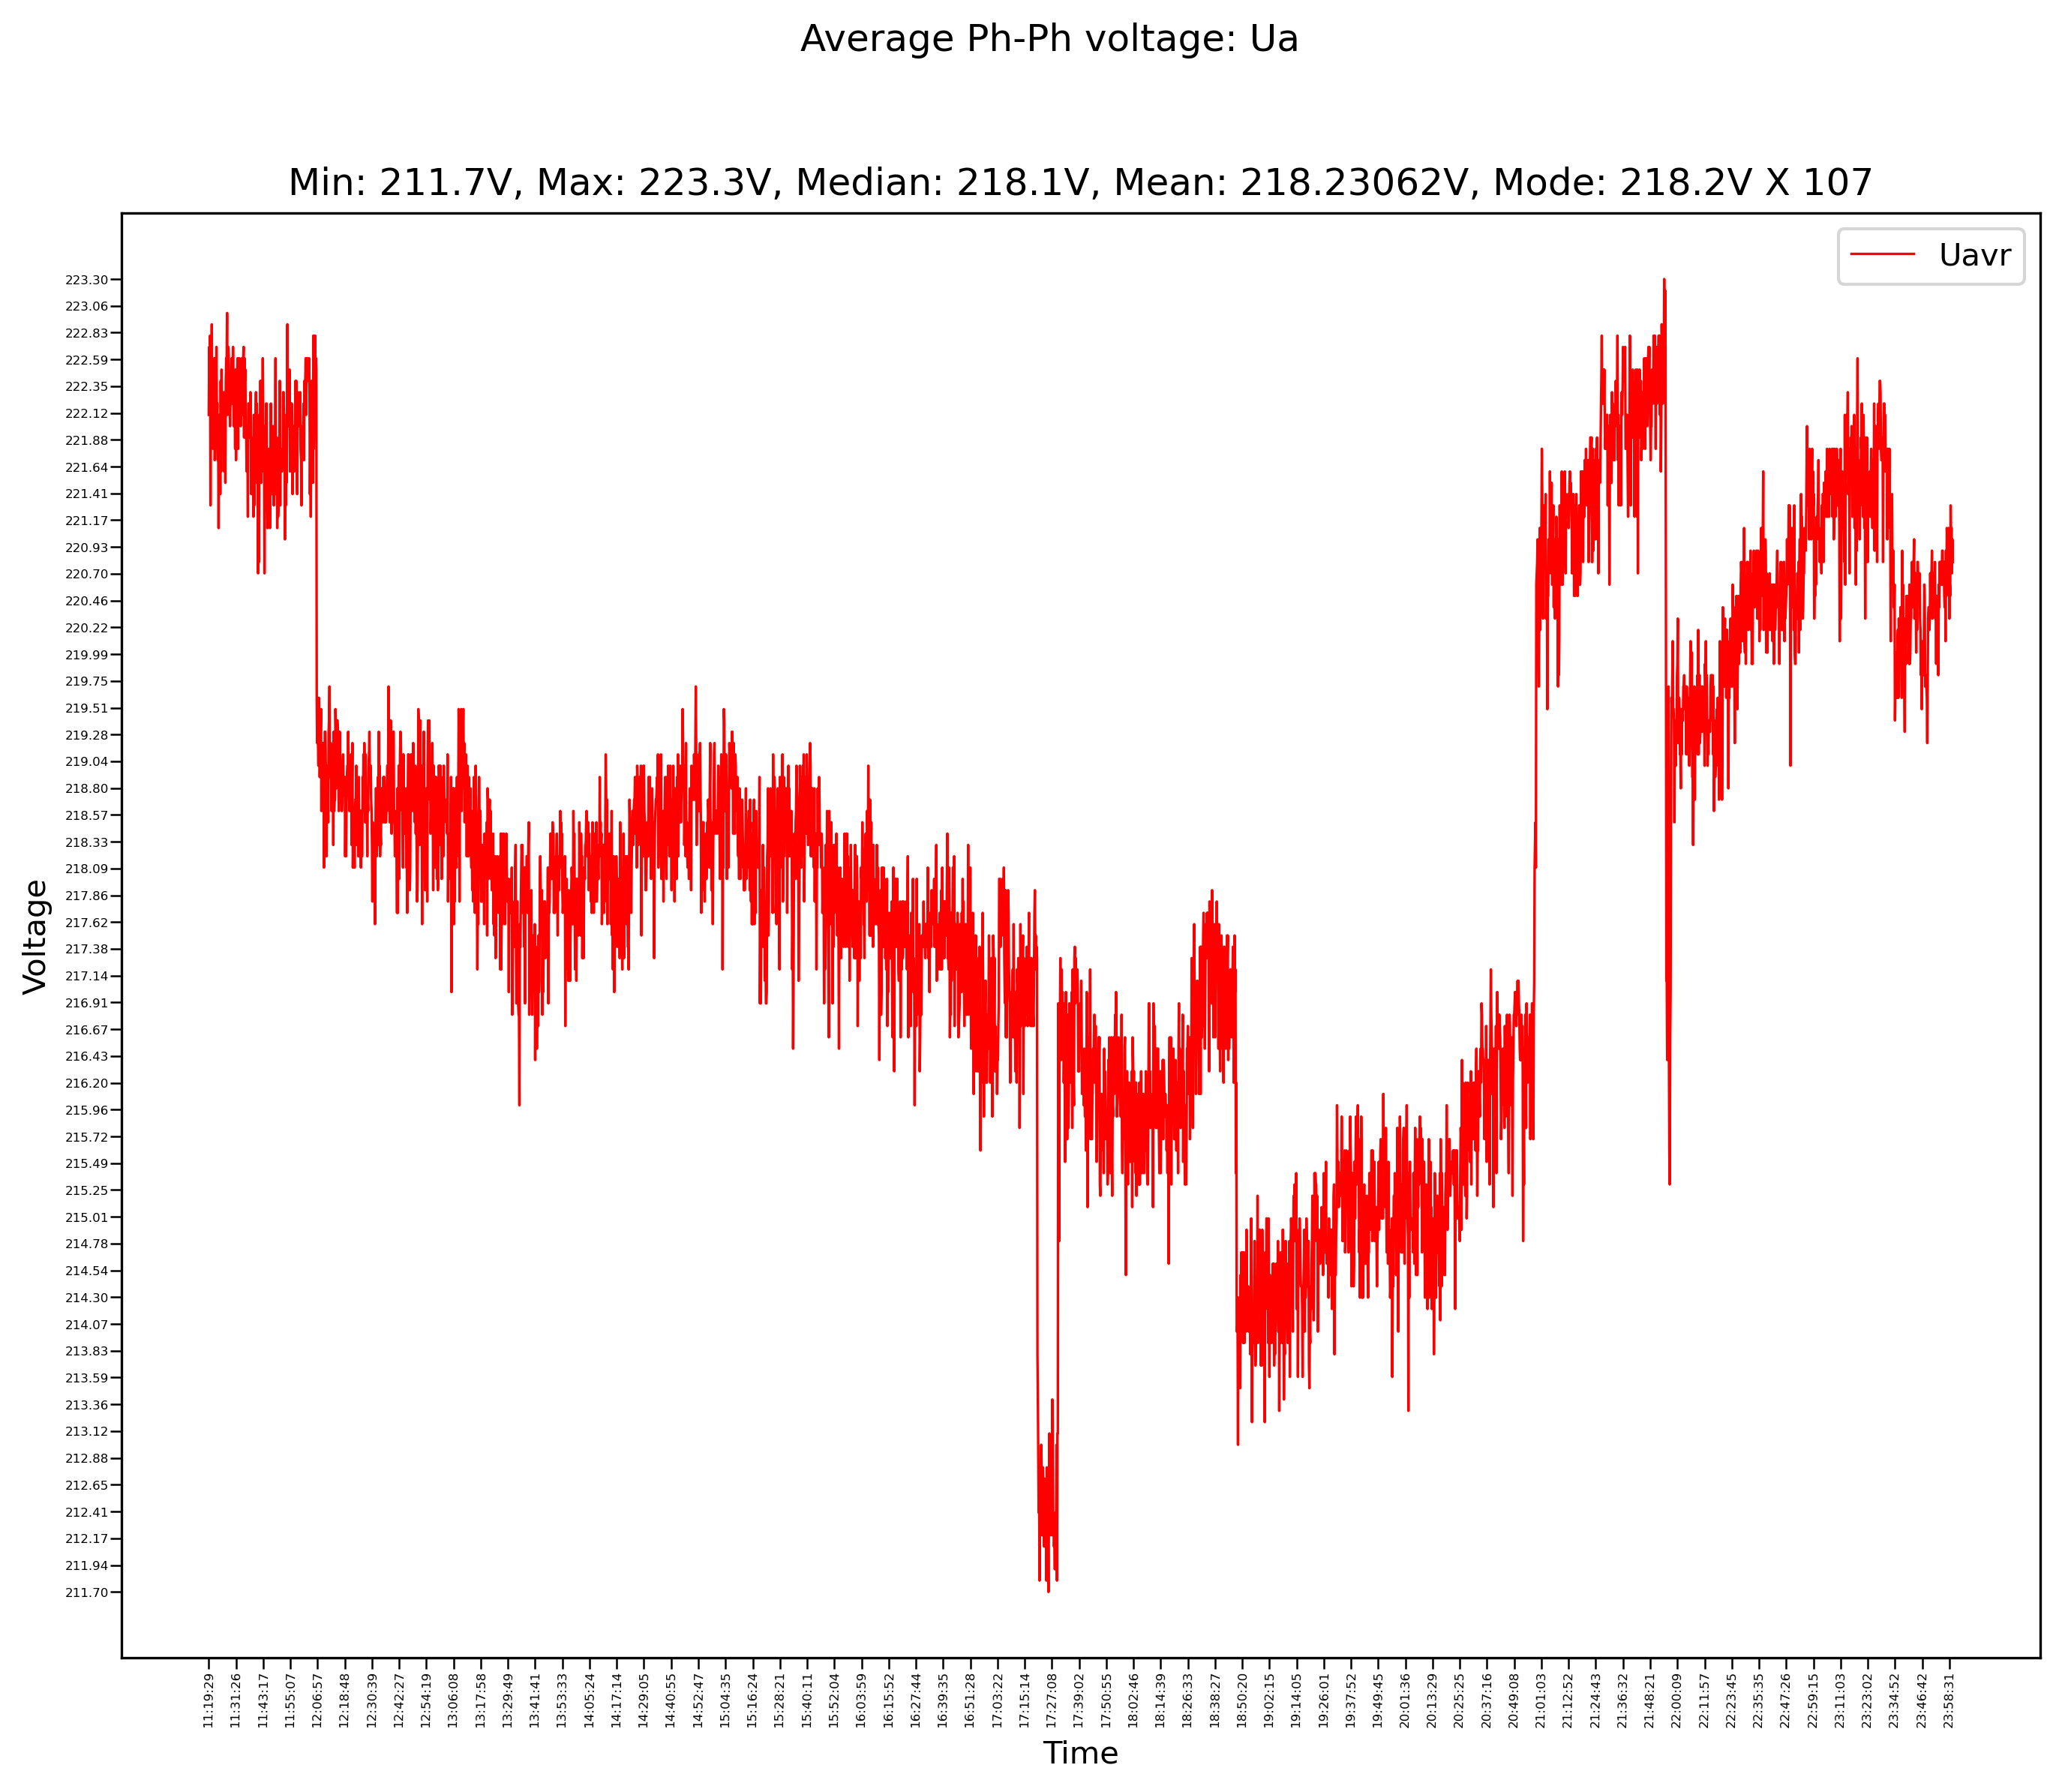

In [3]:
v208 = q.MLabsPlot('v208')
v208.mkplot(ML.multiData('v208'), savedir)
Uavr = q.MLabsPlot('Uavr')
Uavr.mkplot(ML.PlotData('Uavr'), savedir)

# Phase currents

I1, I2, I3, In

# Average current

Iavr



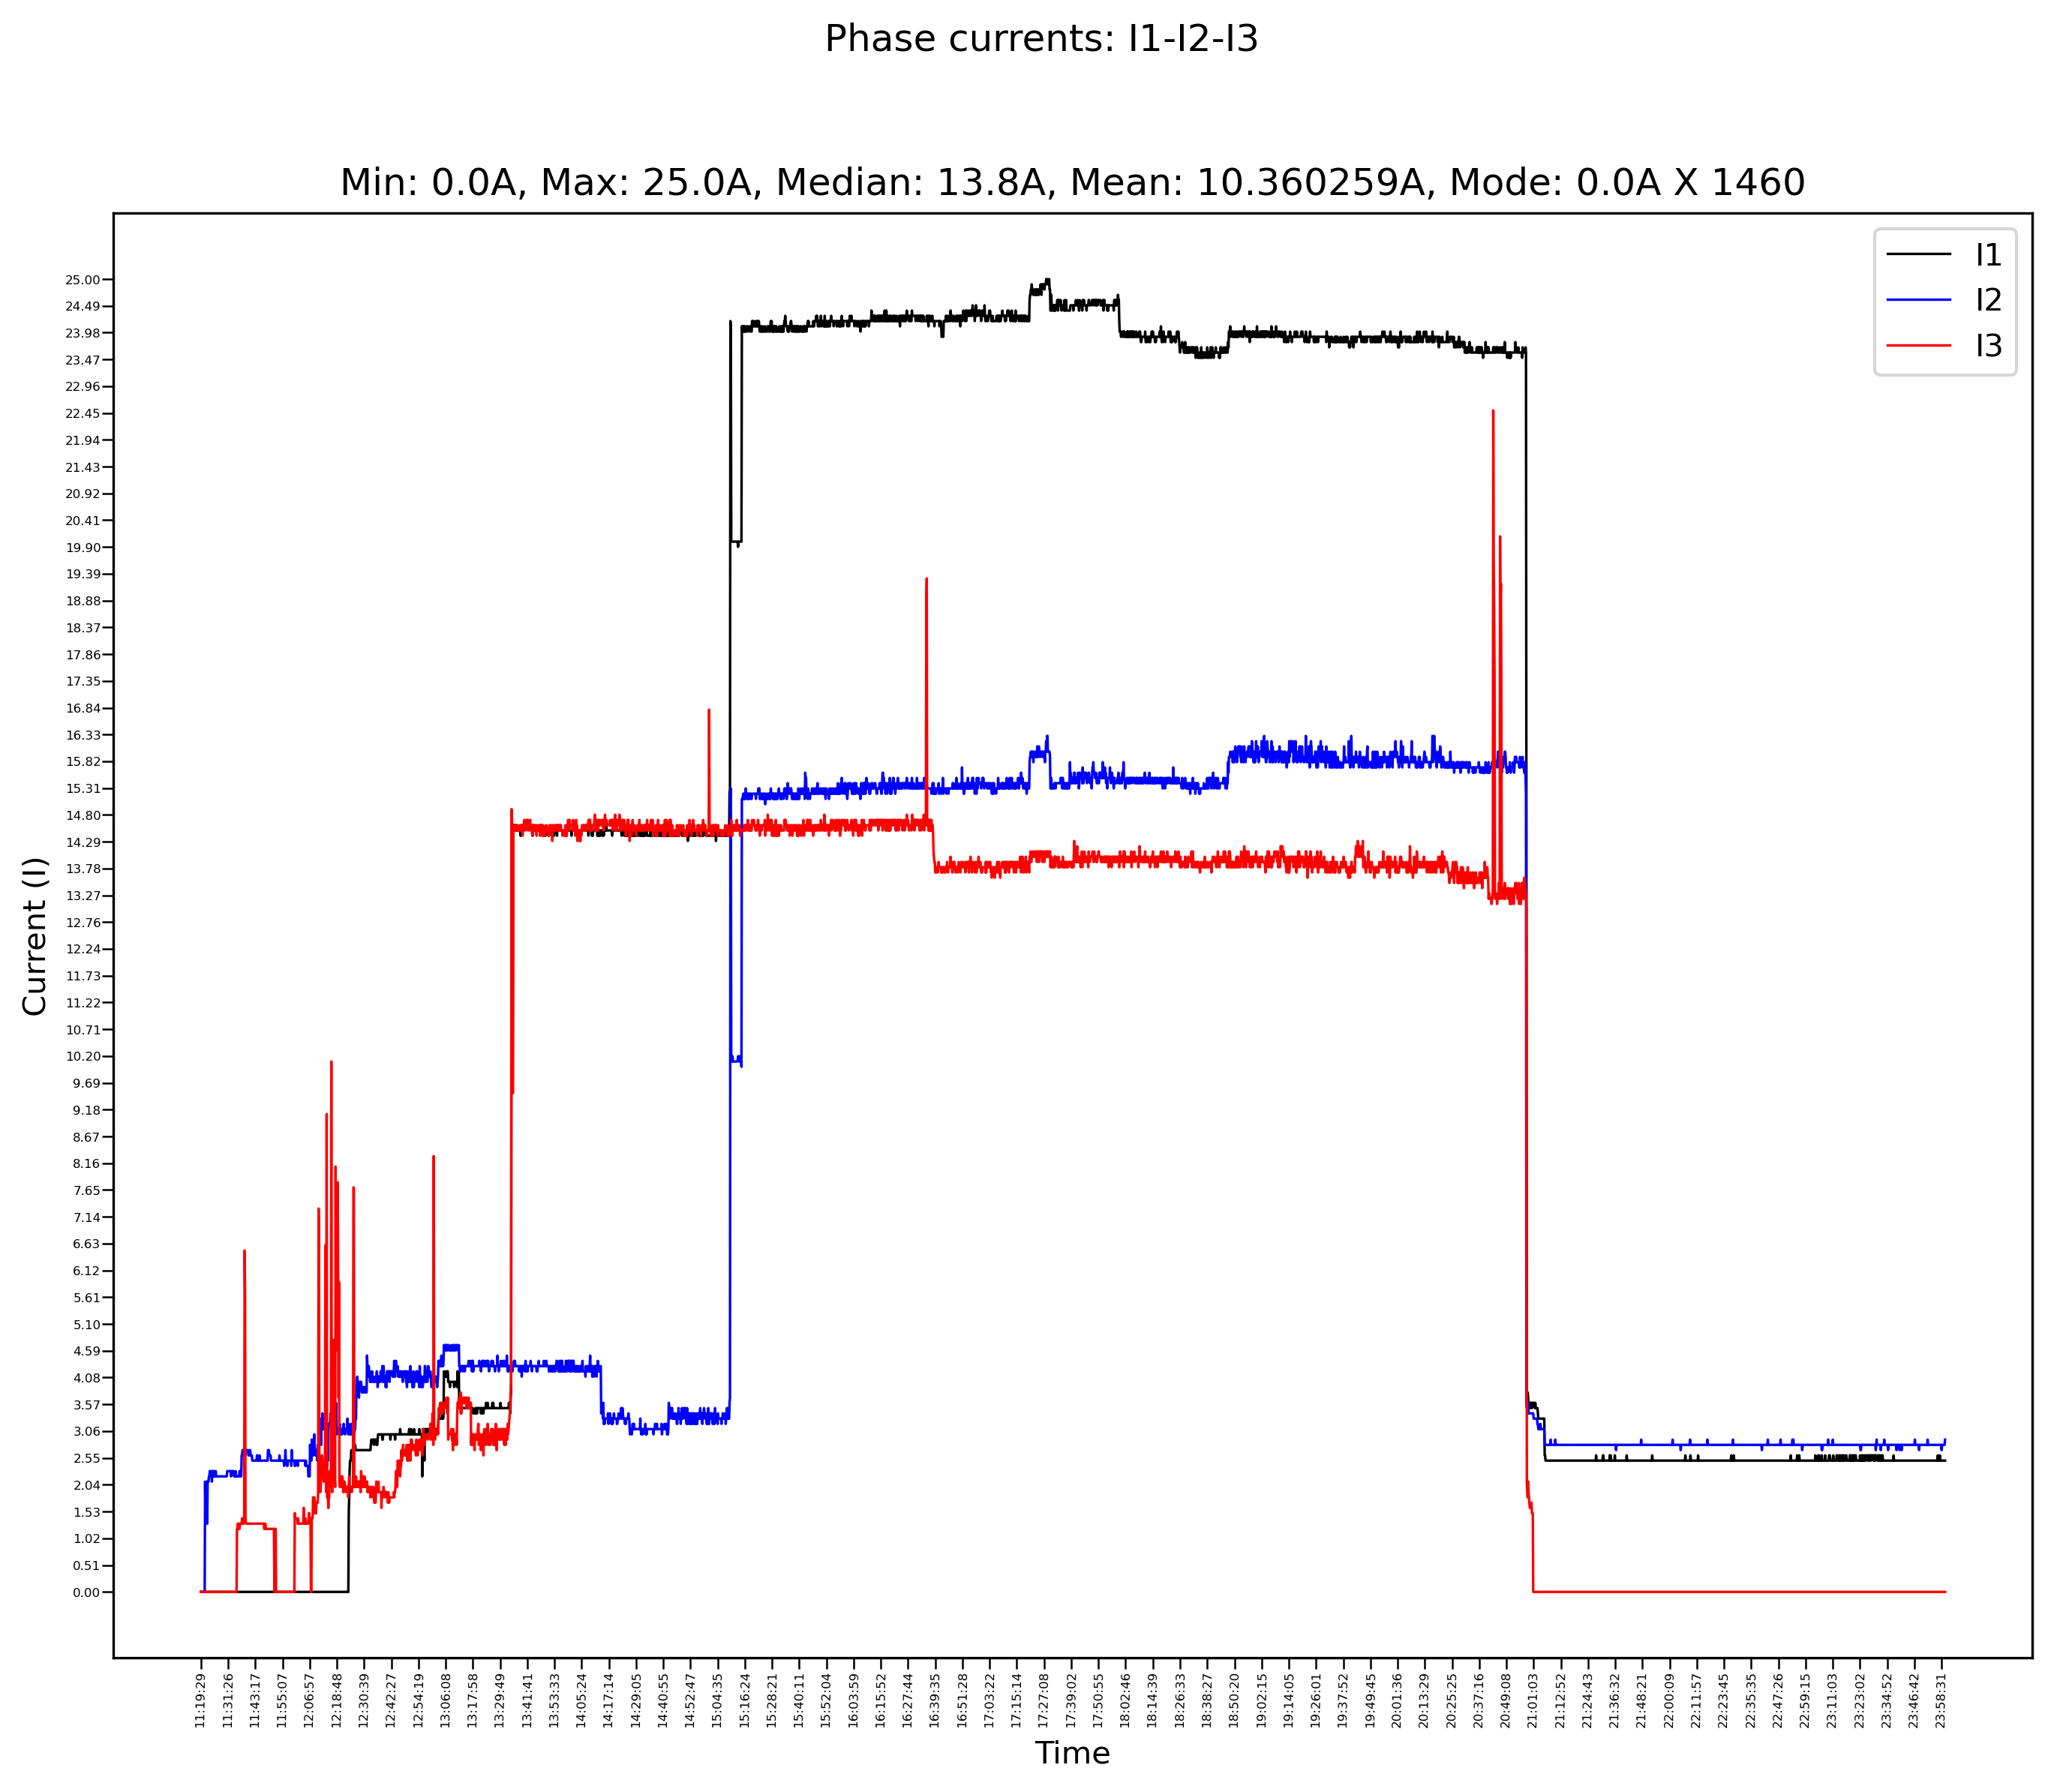

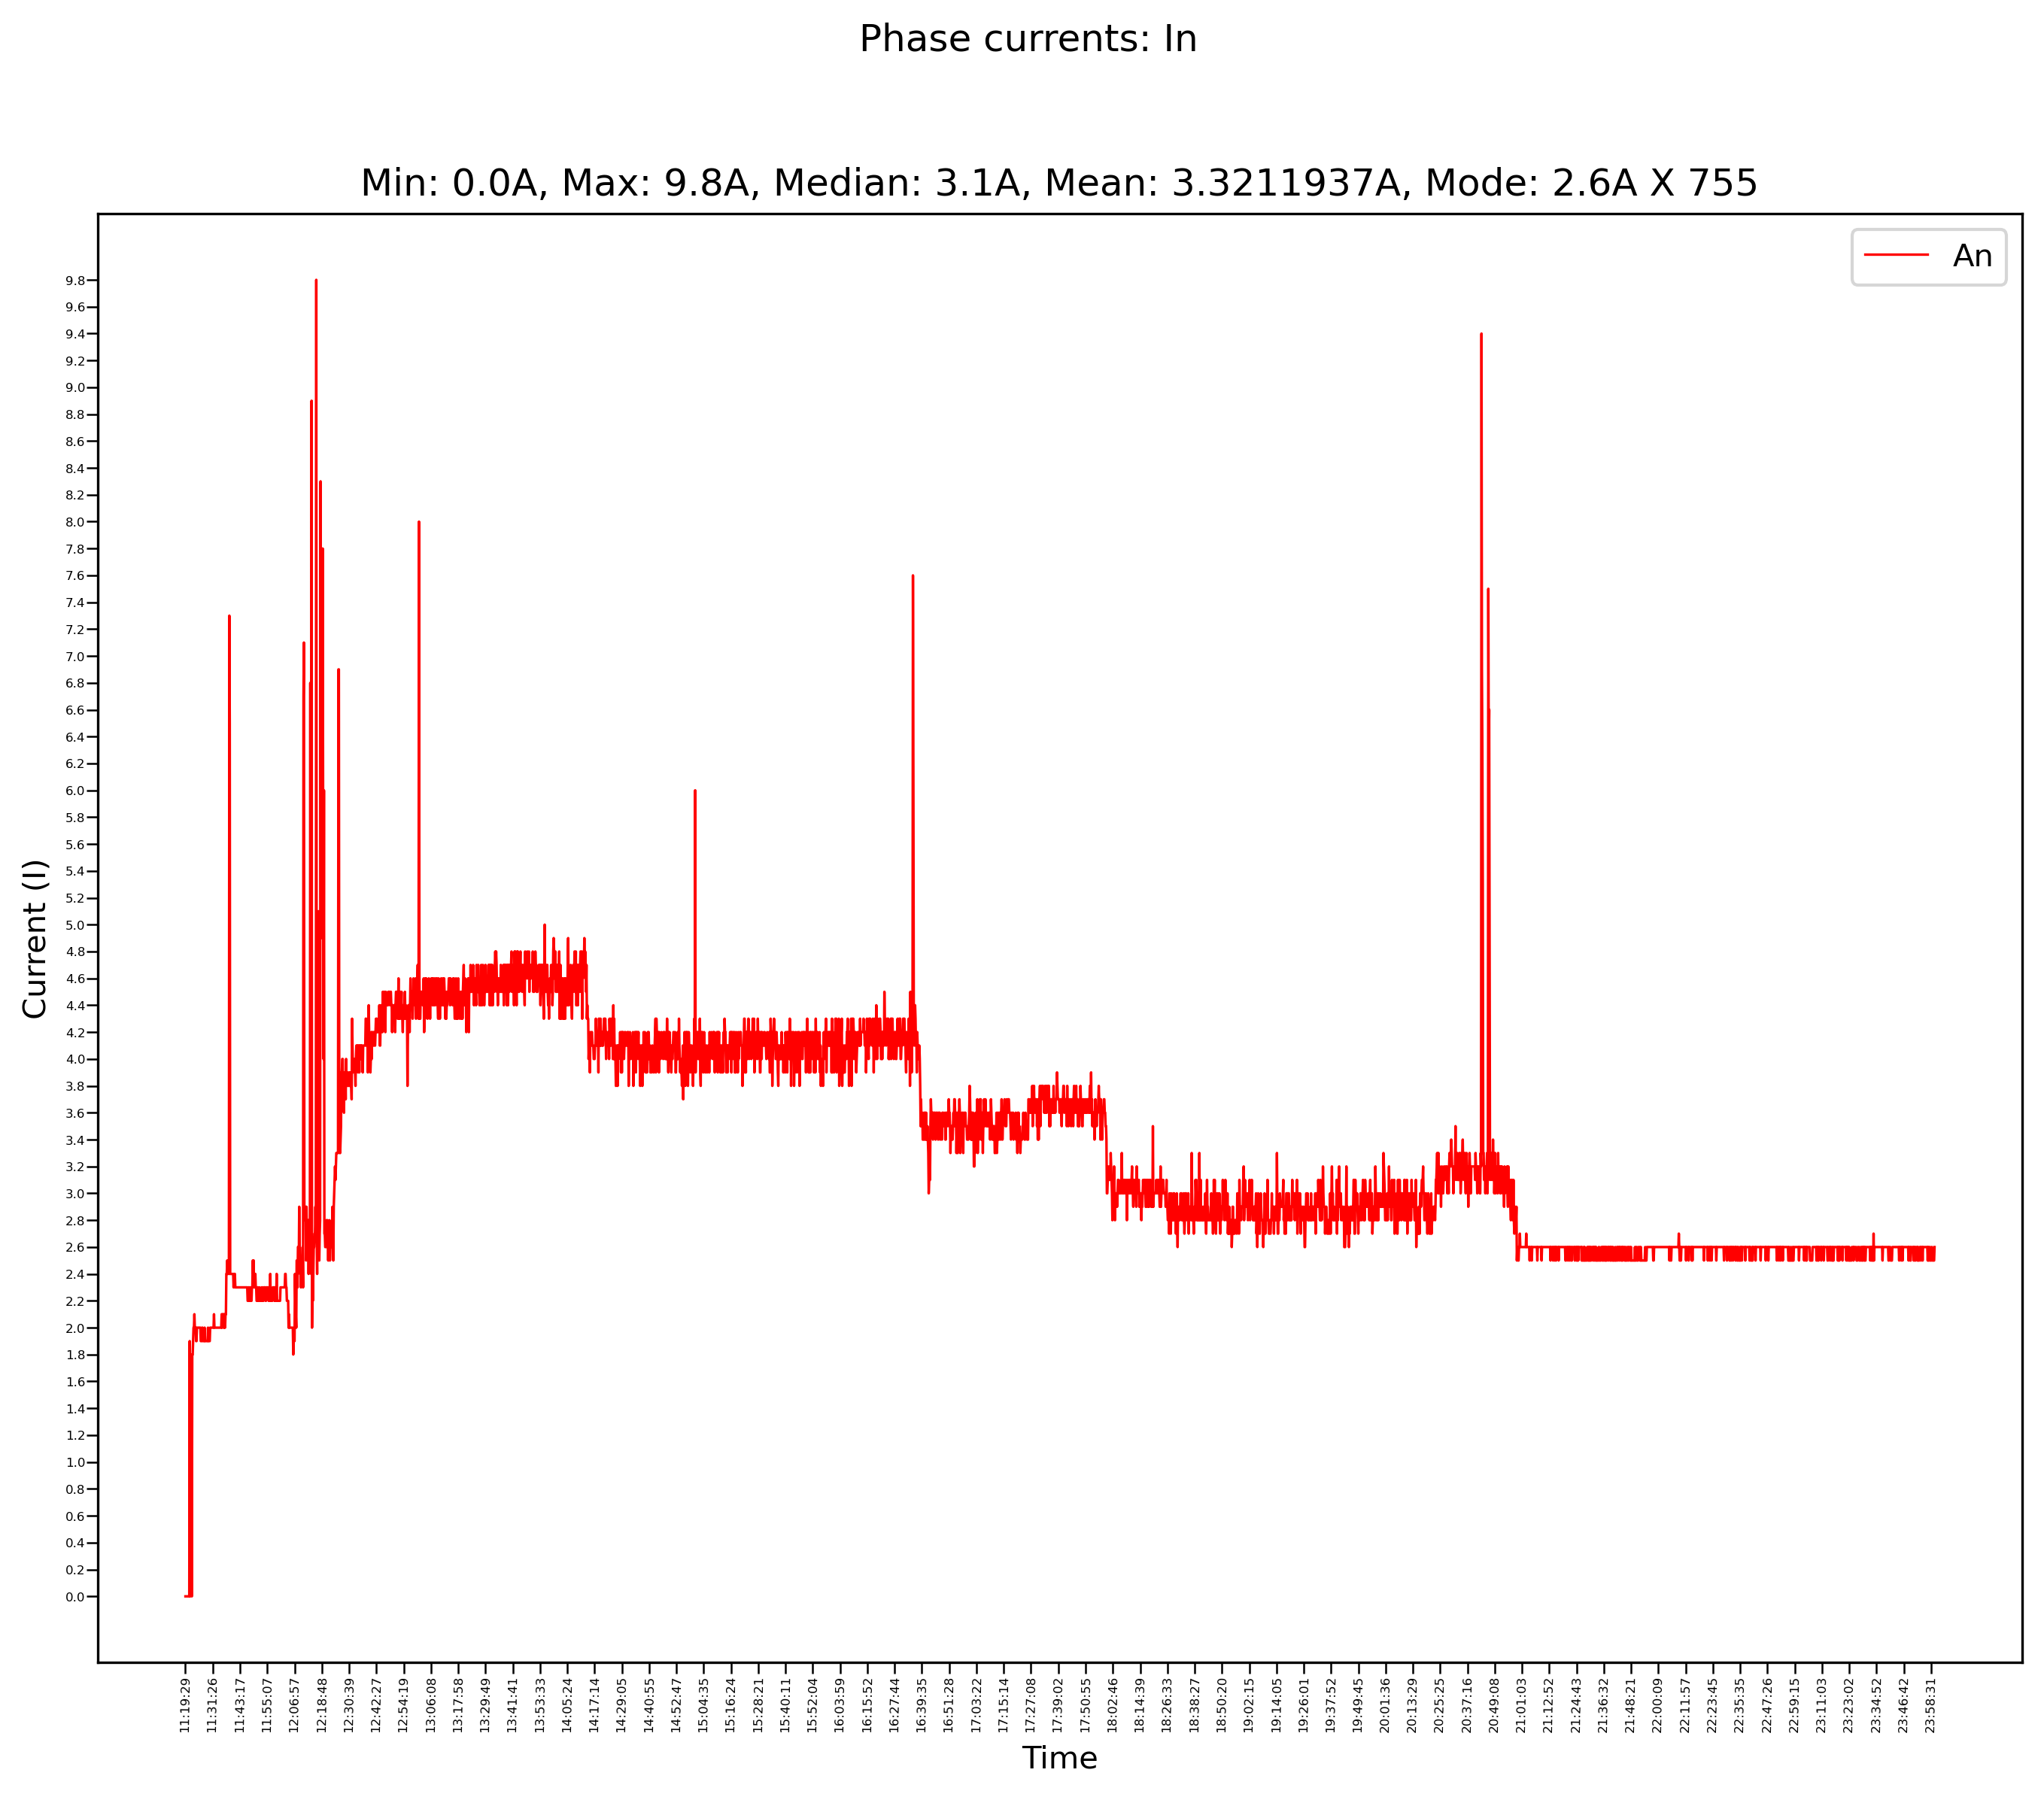

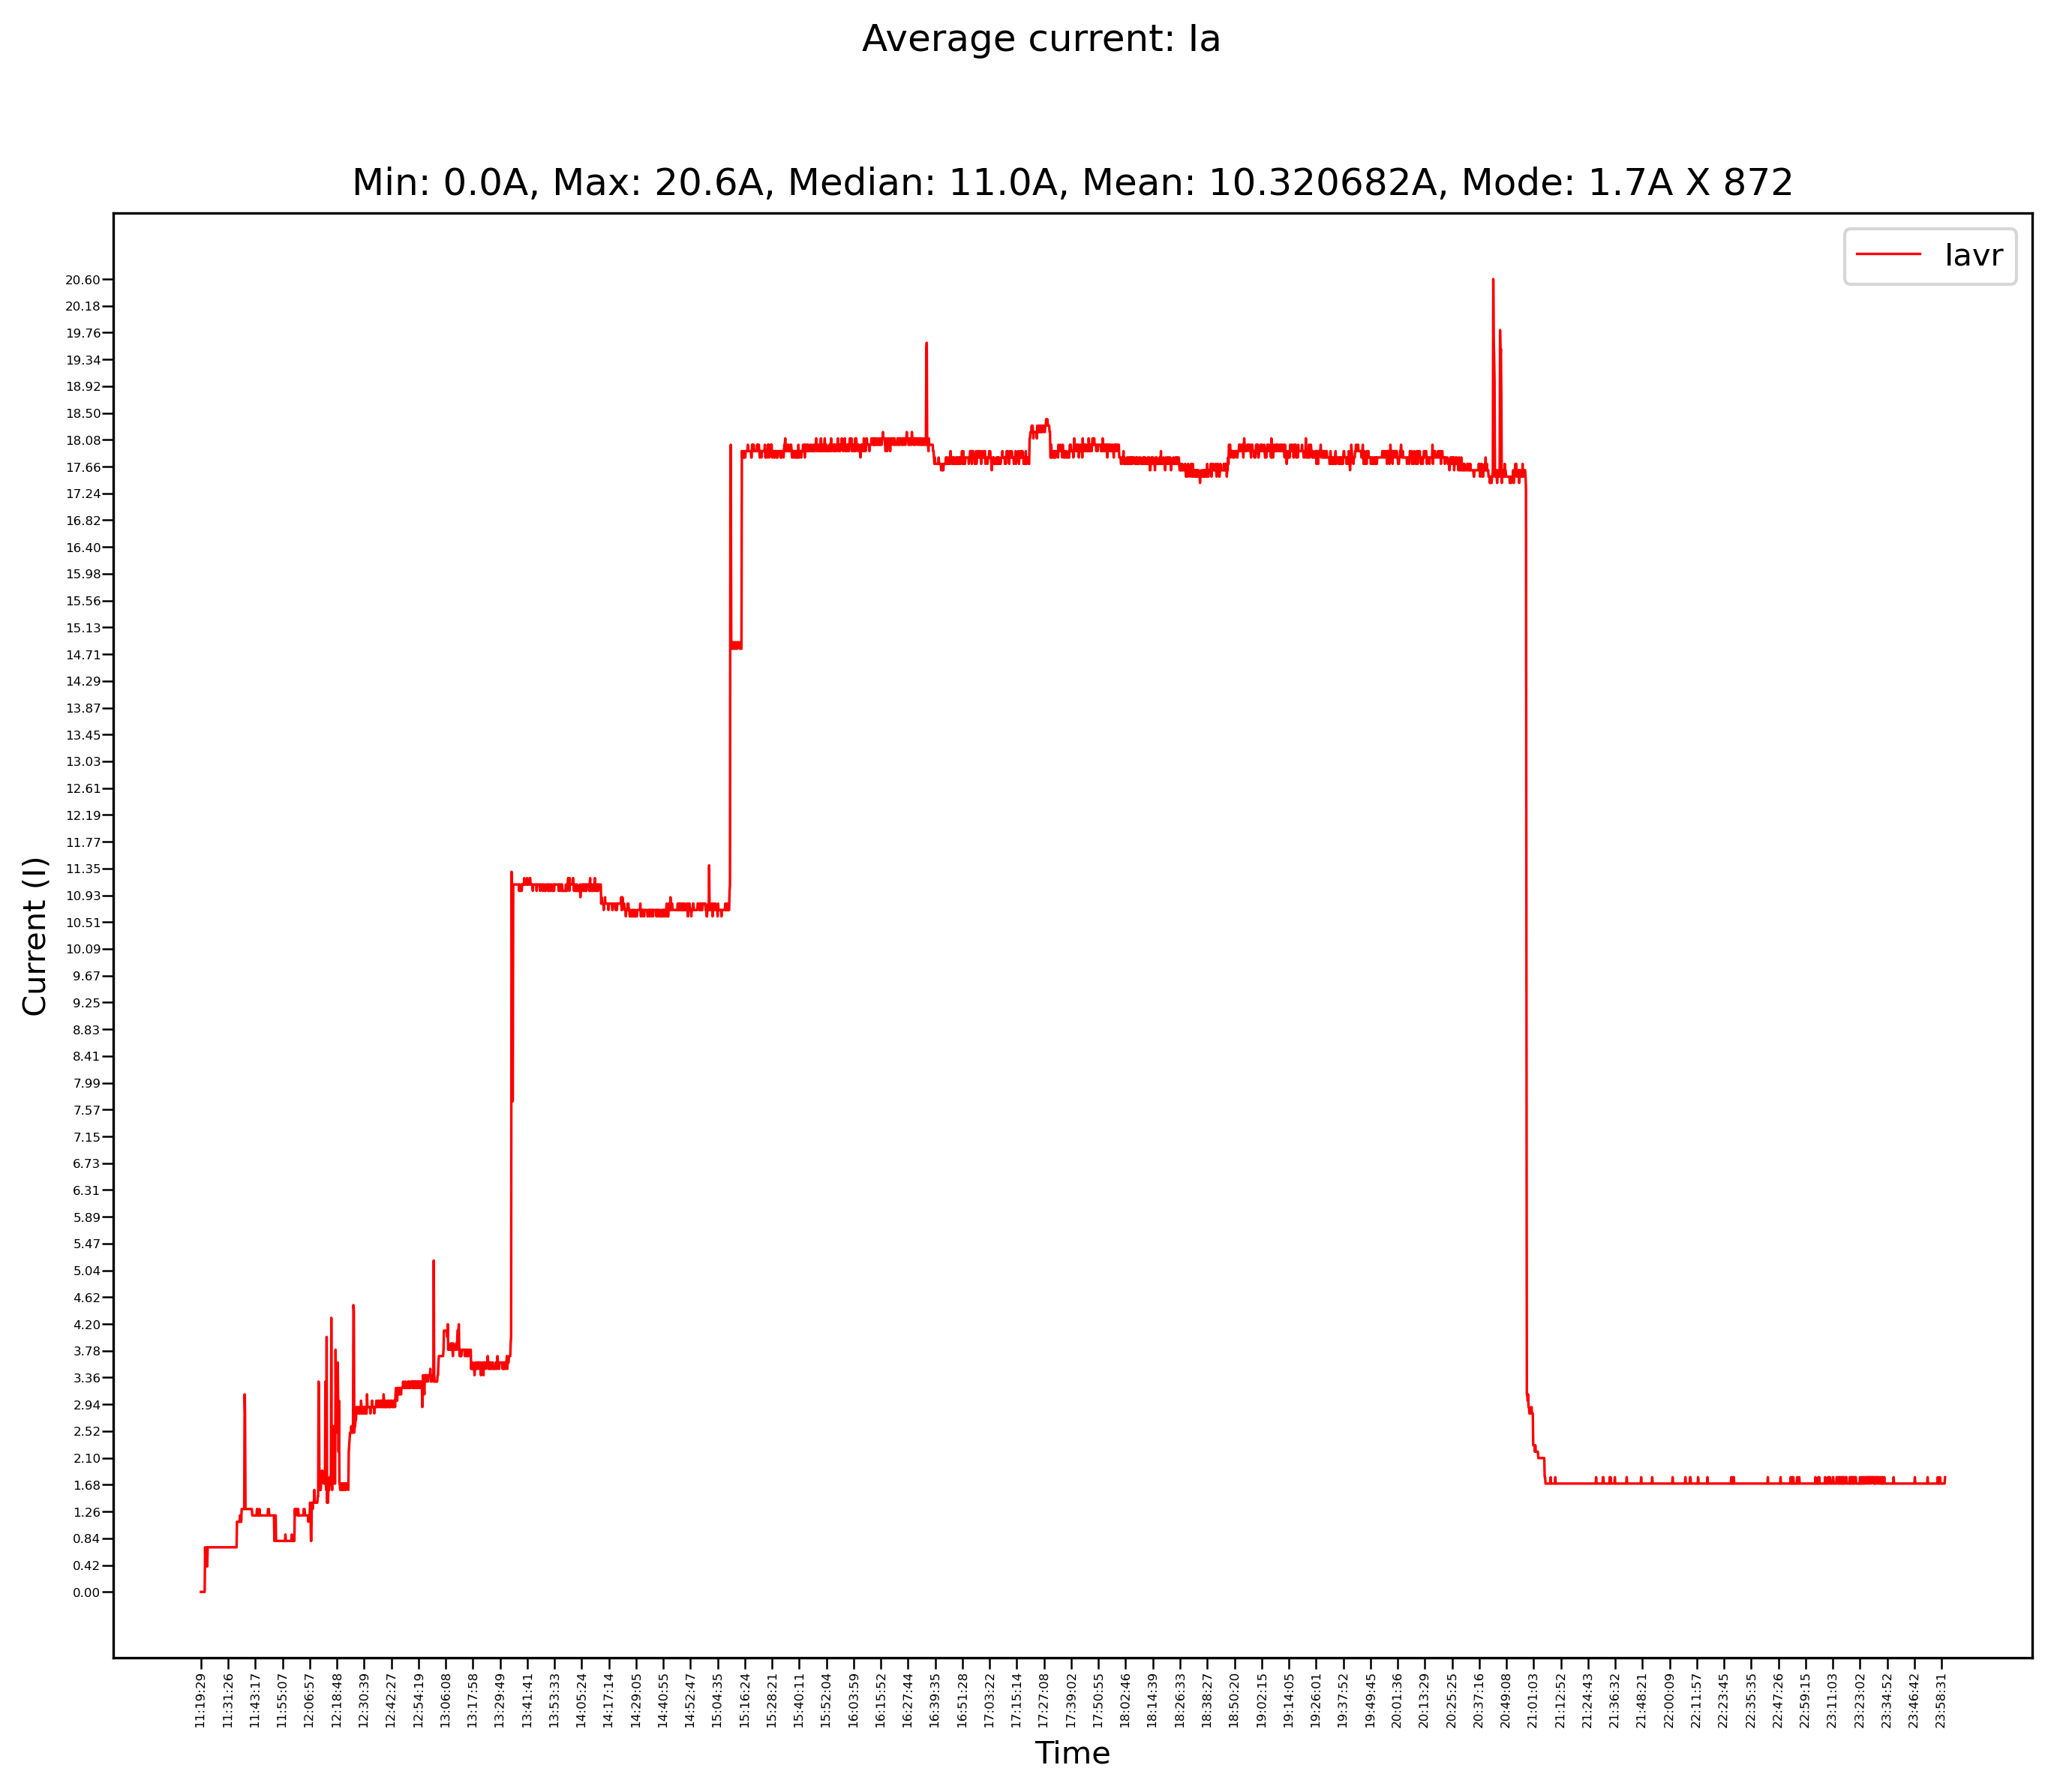

In [4]:
amps = q.MLabsPlot('amps')
amps.mkplot(ML.multiData('amps'))
An = q.MLabsPlot('An')
An.mkplot(ML.PlotData('An'))
Iavr = q.MLabsPlot('Iavr')
Iavr.mkplot(ML.PlotData('Iavr'))

#  Total Active Power (kW) 

* P is Active power or real power, logged as kW
* P1, P2, P3 as kW


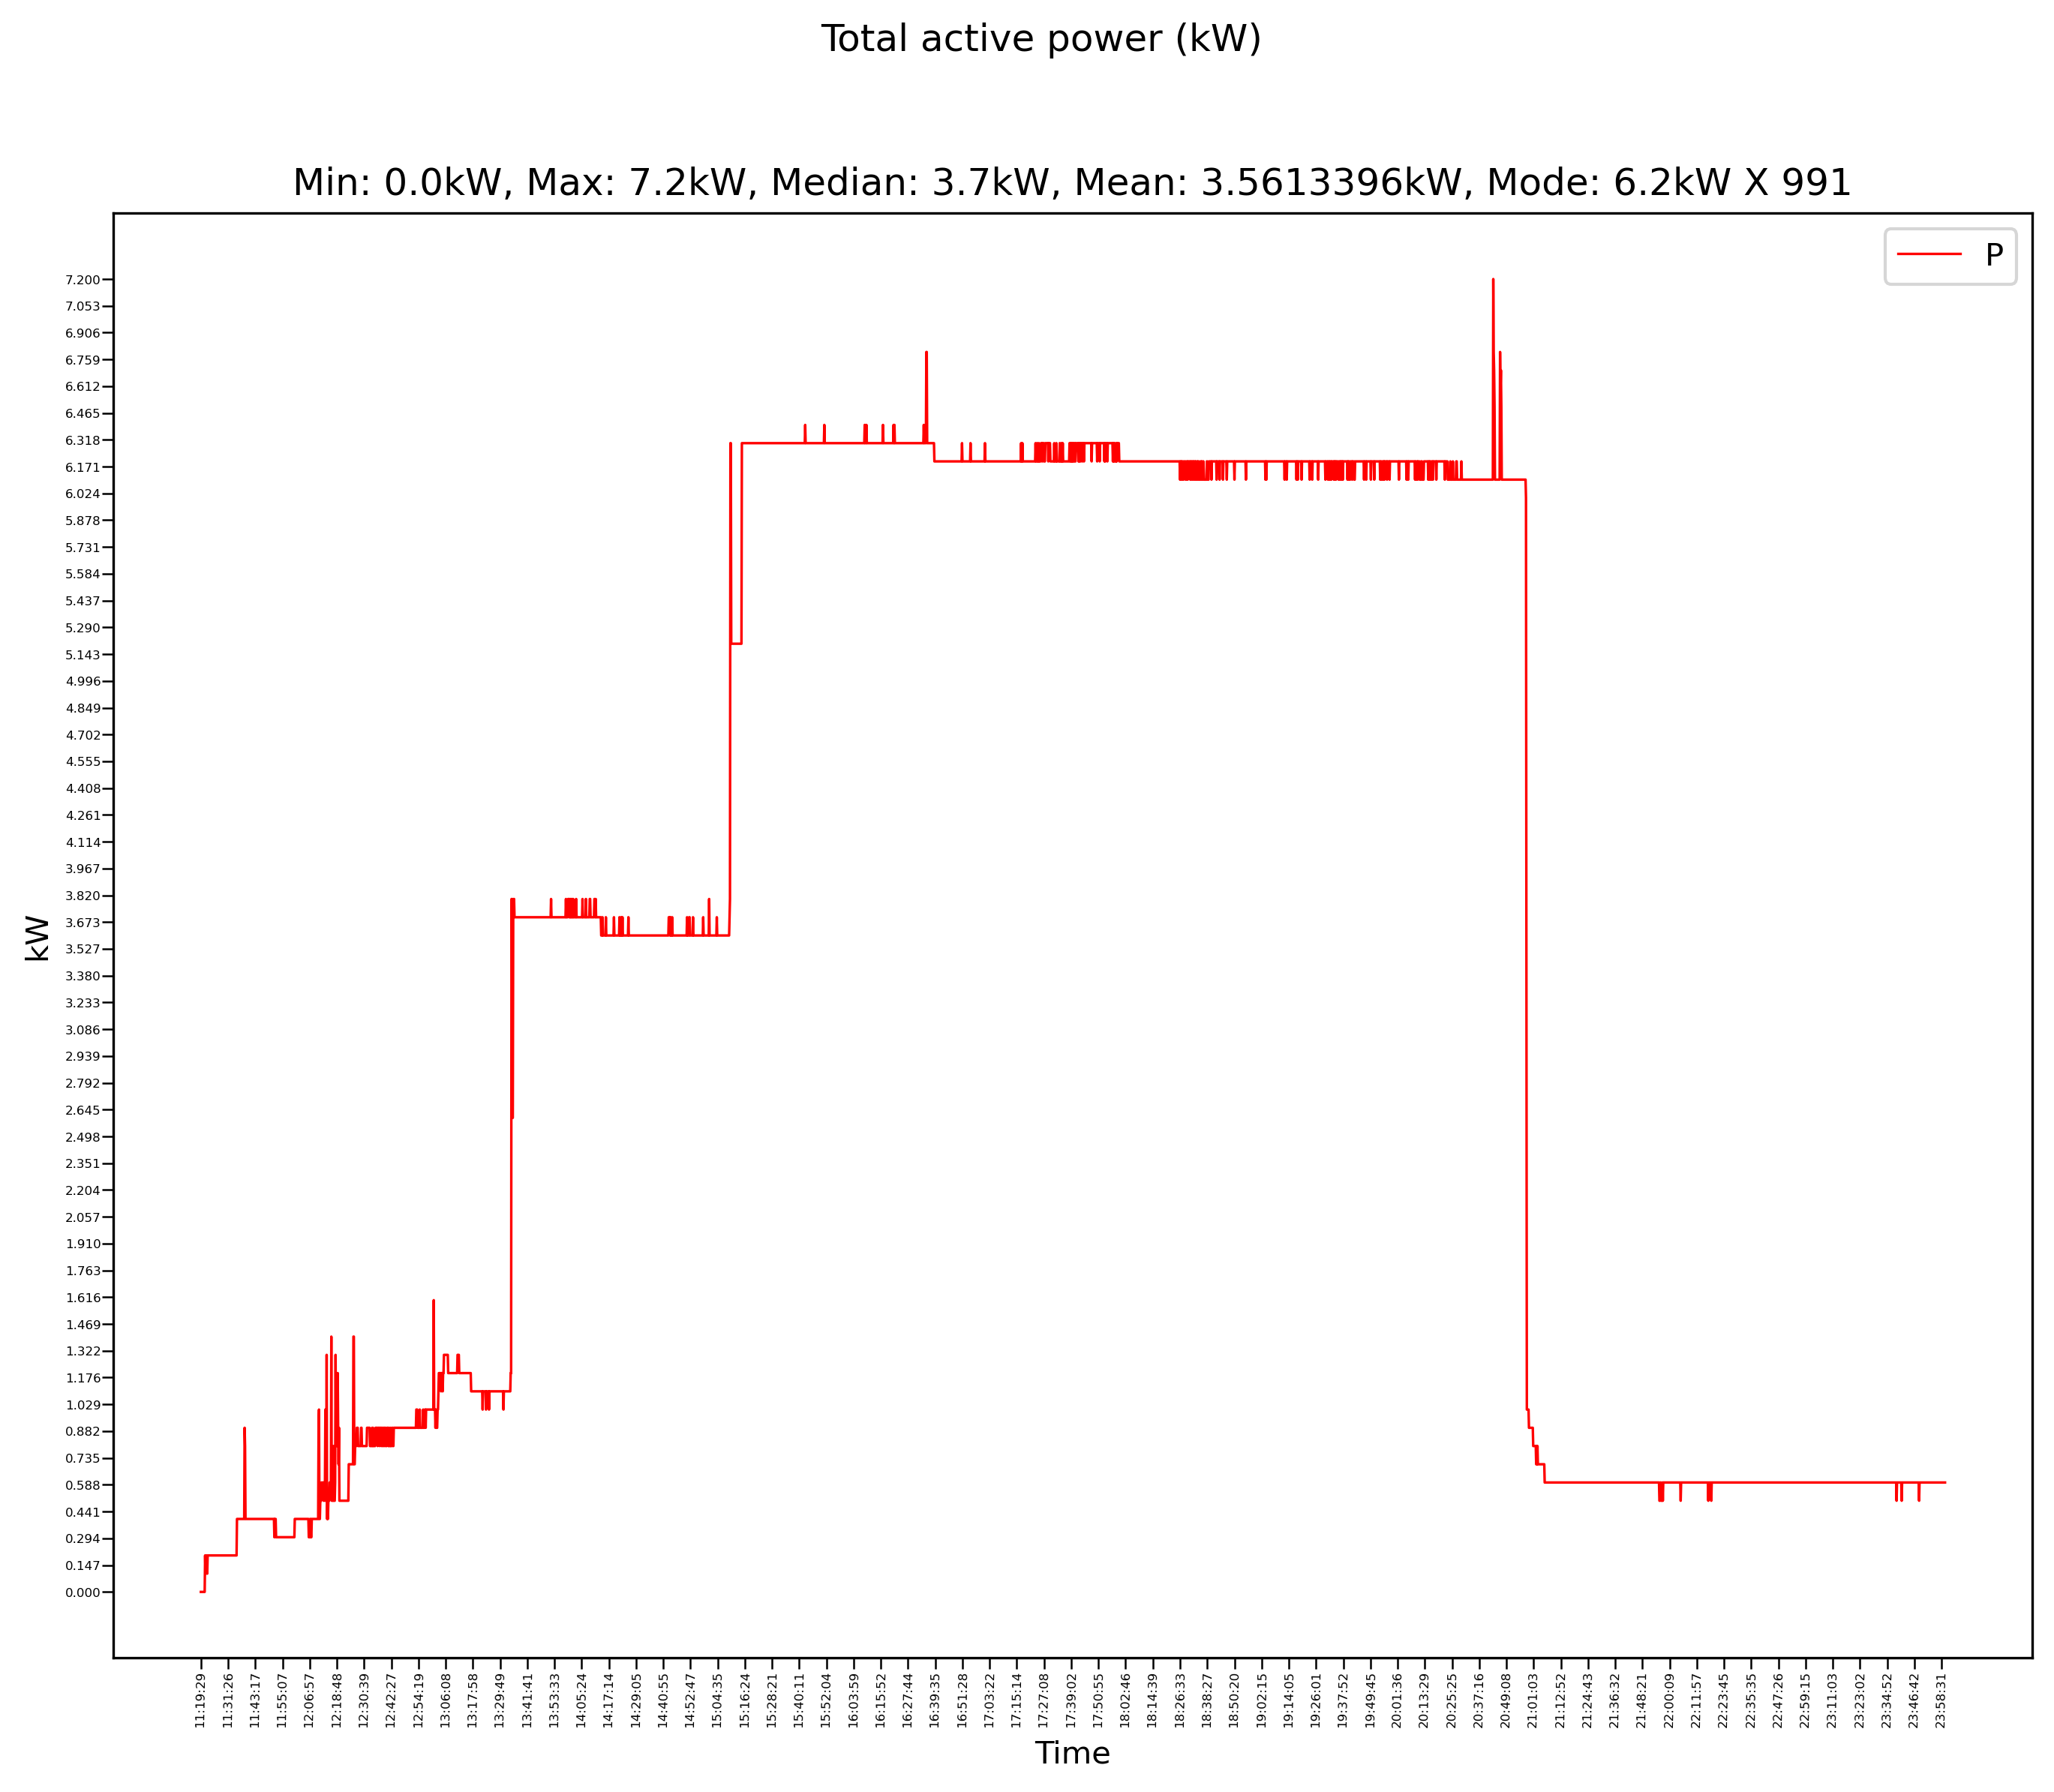

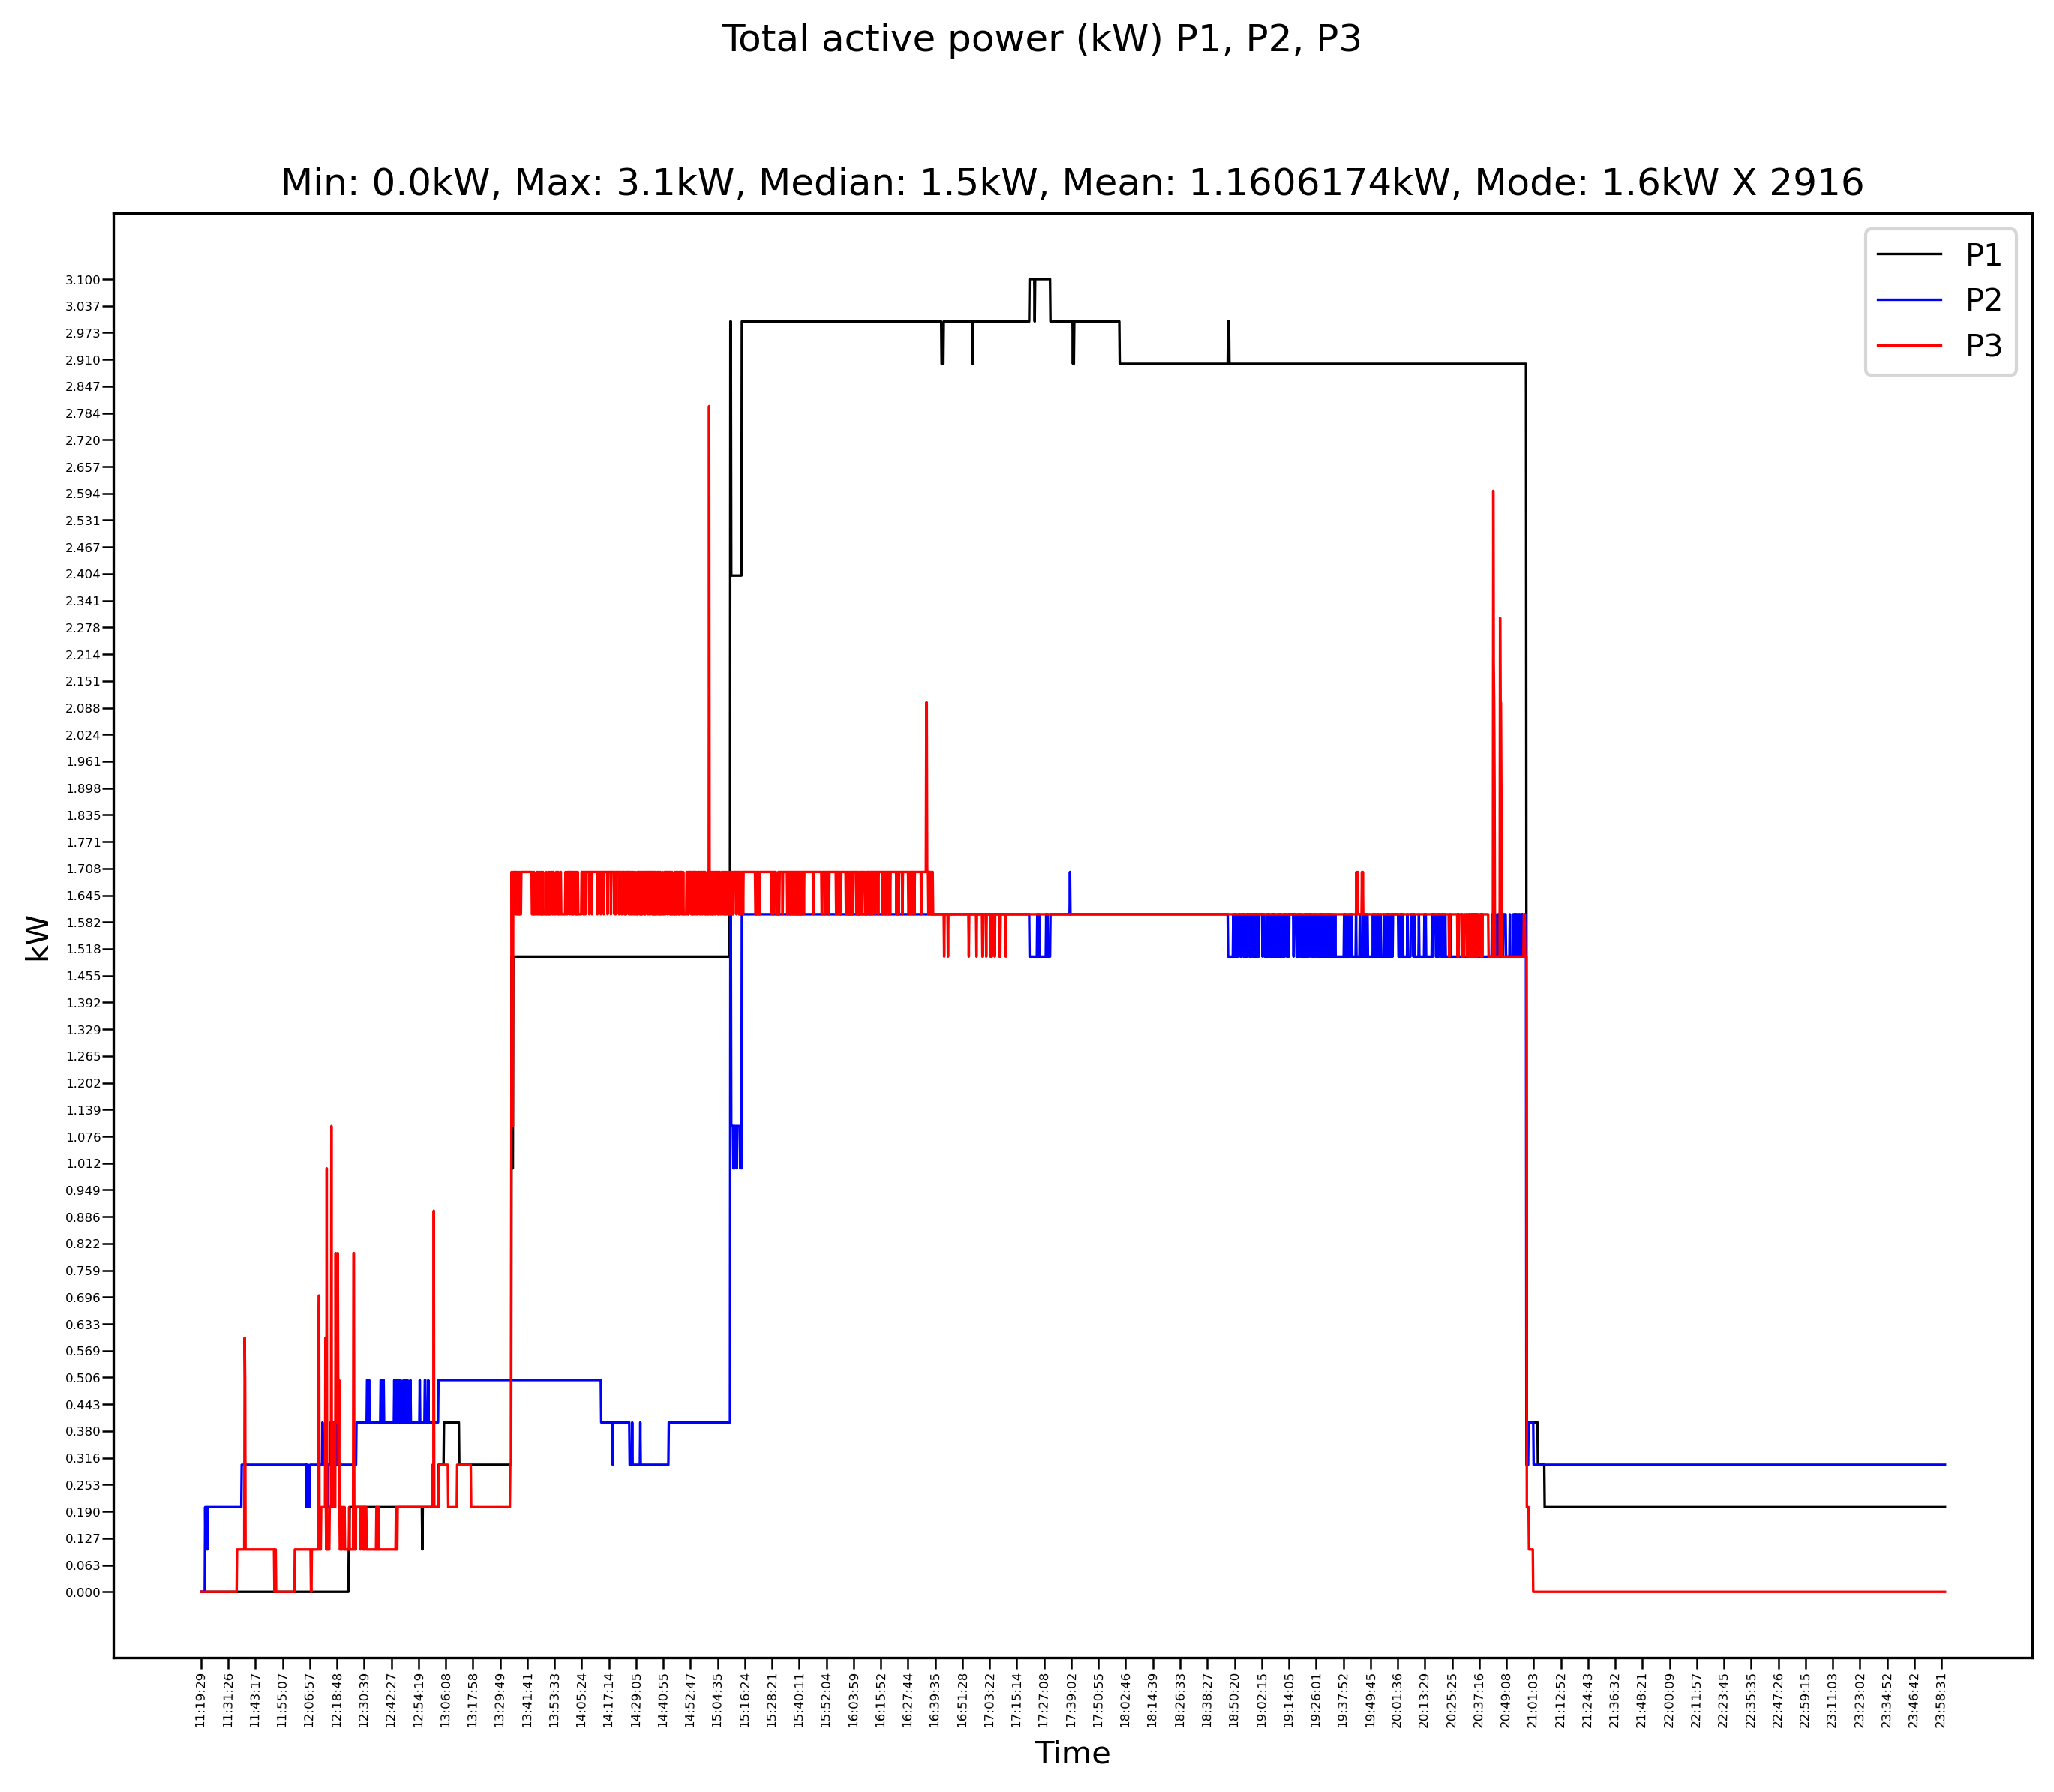

In [5]:
P = q.MLabsPlot('P')
P.mkplot(ML.PlotData('P'))
kWatt = q.MLabsPlot('kWatt')
kWatt.mkplot(ML.multiData('kWatt'))

## Total reactive power (kVAr) 

* Q is Reactive power, logged as kVar
* Q1, Q2, Q3 as kVar



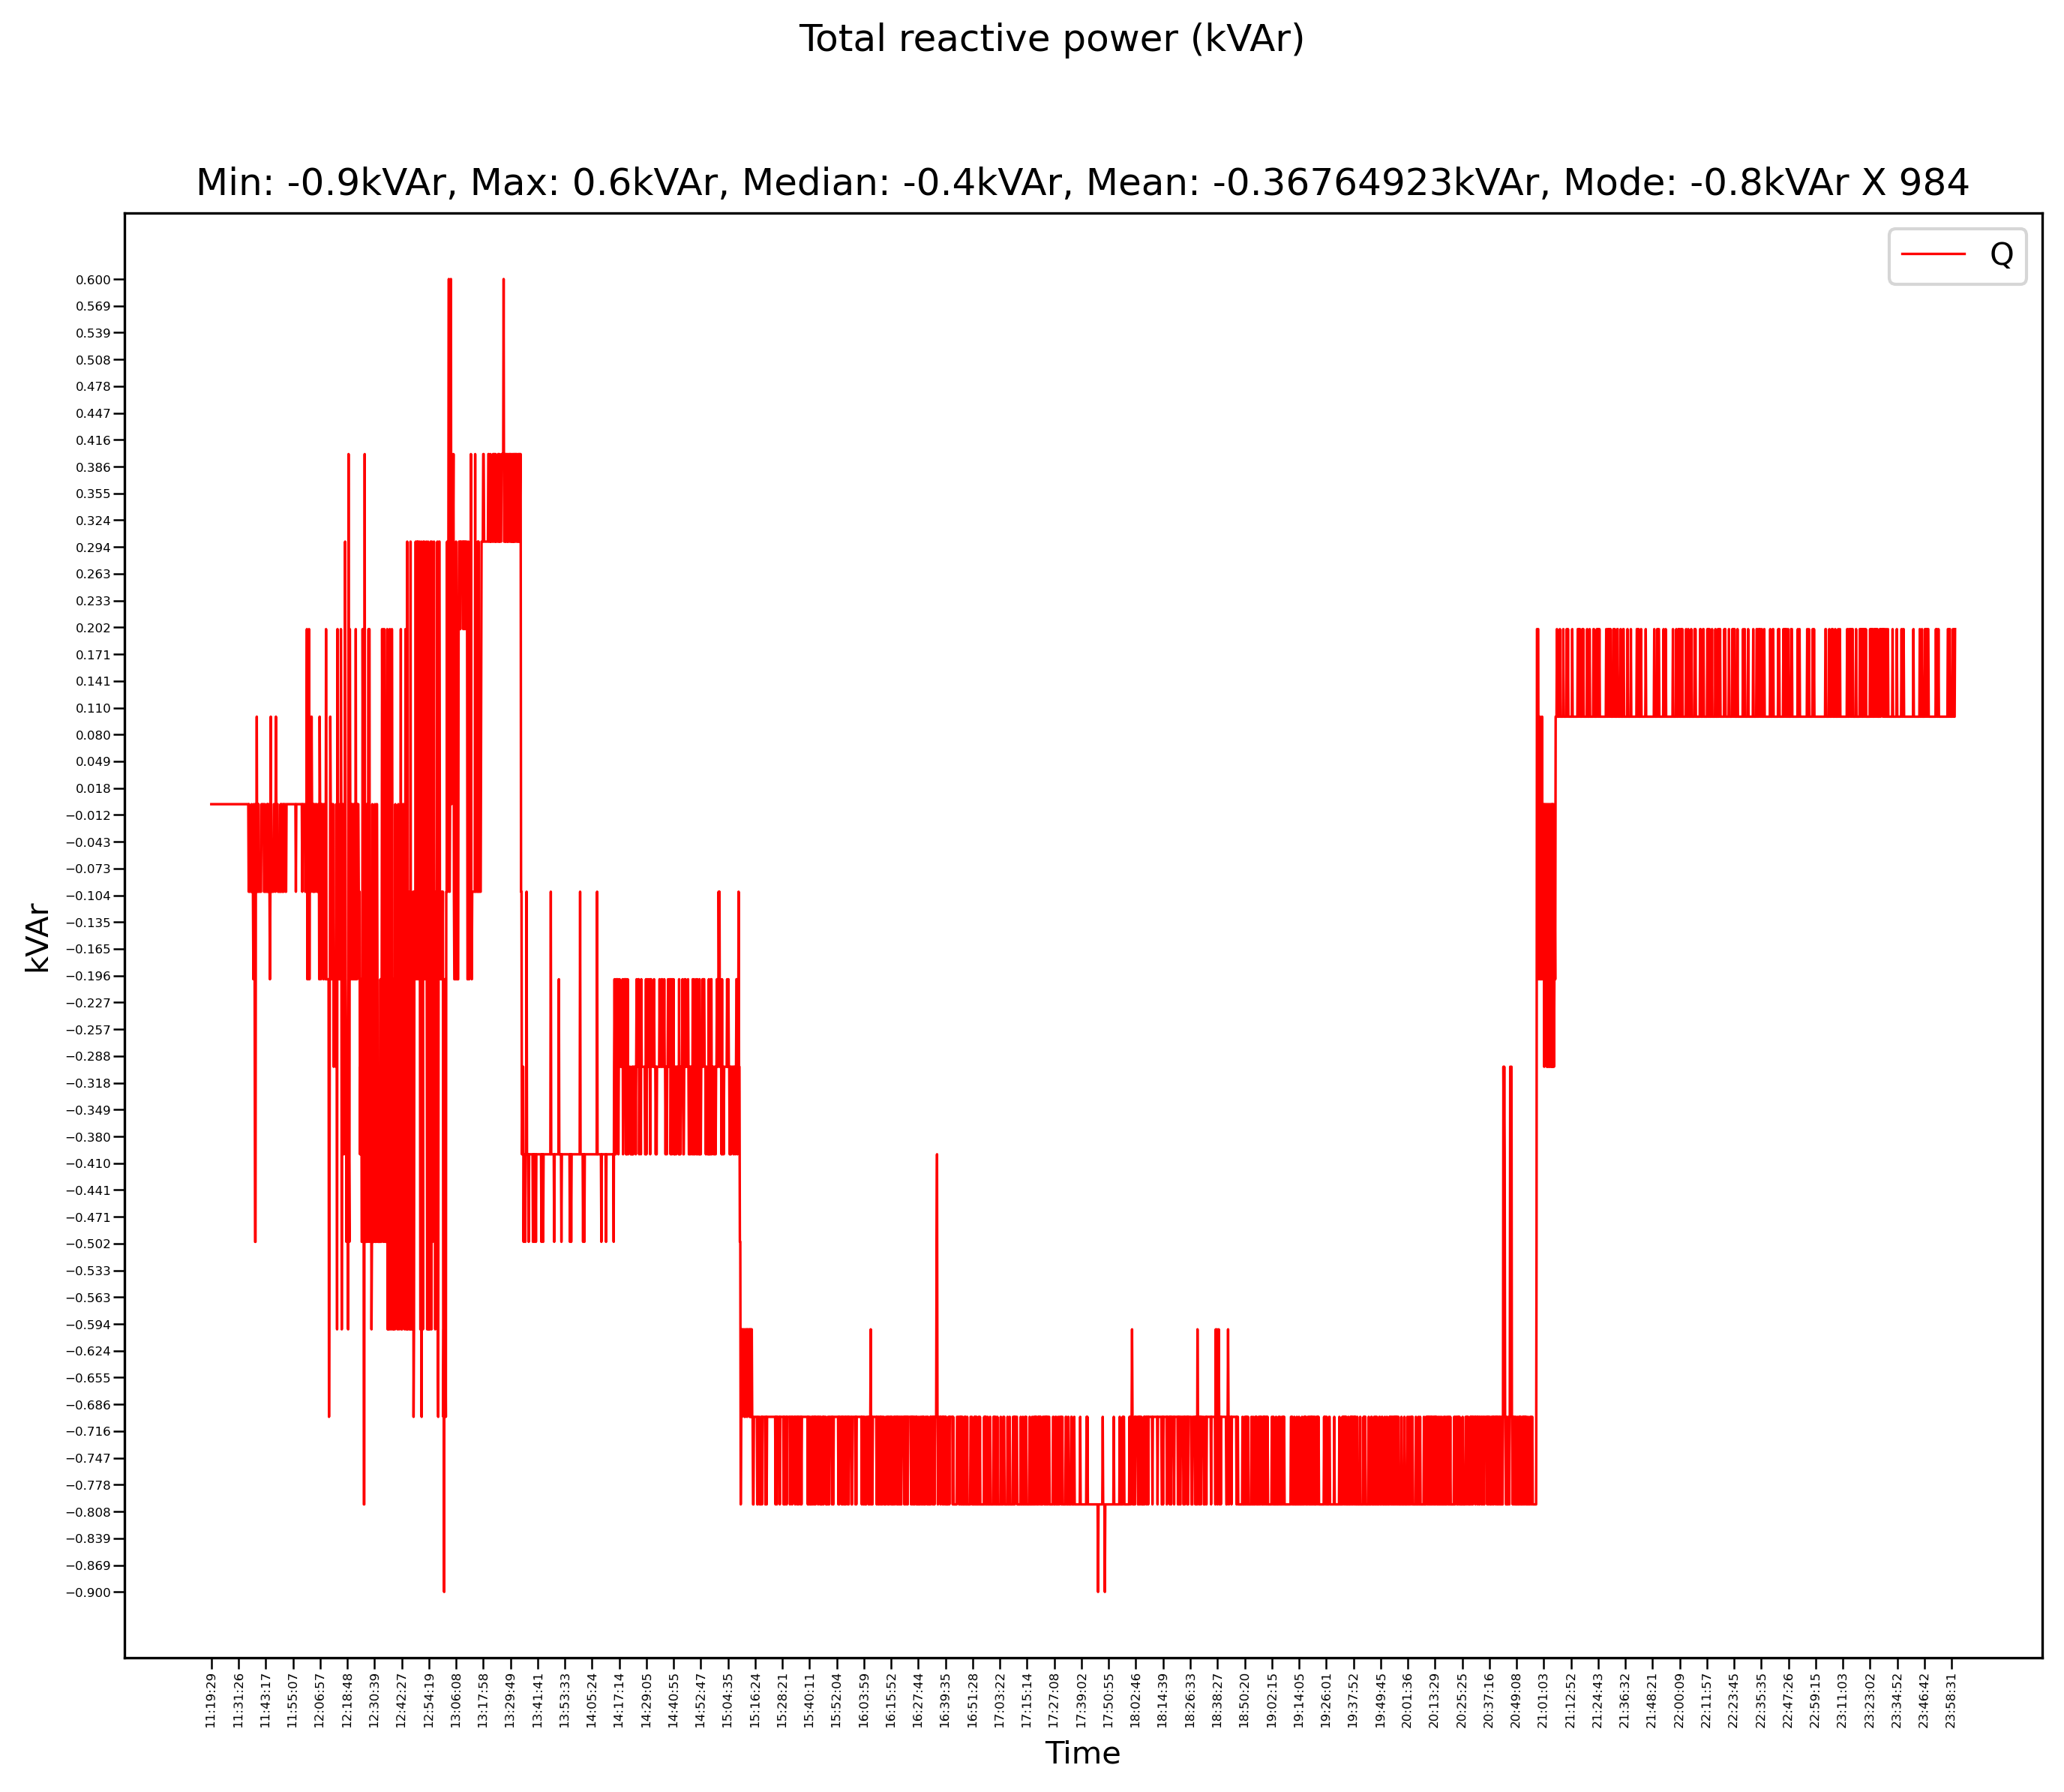

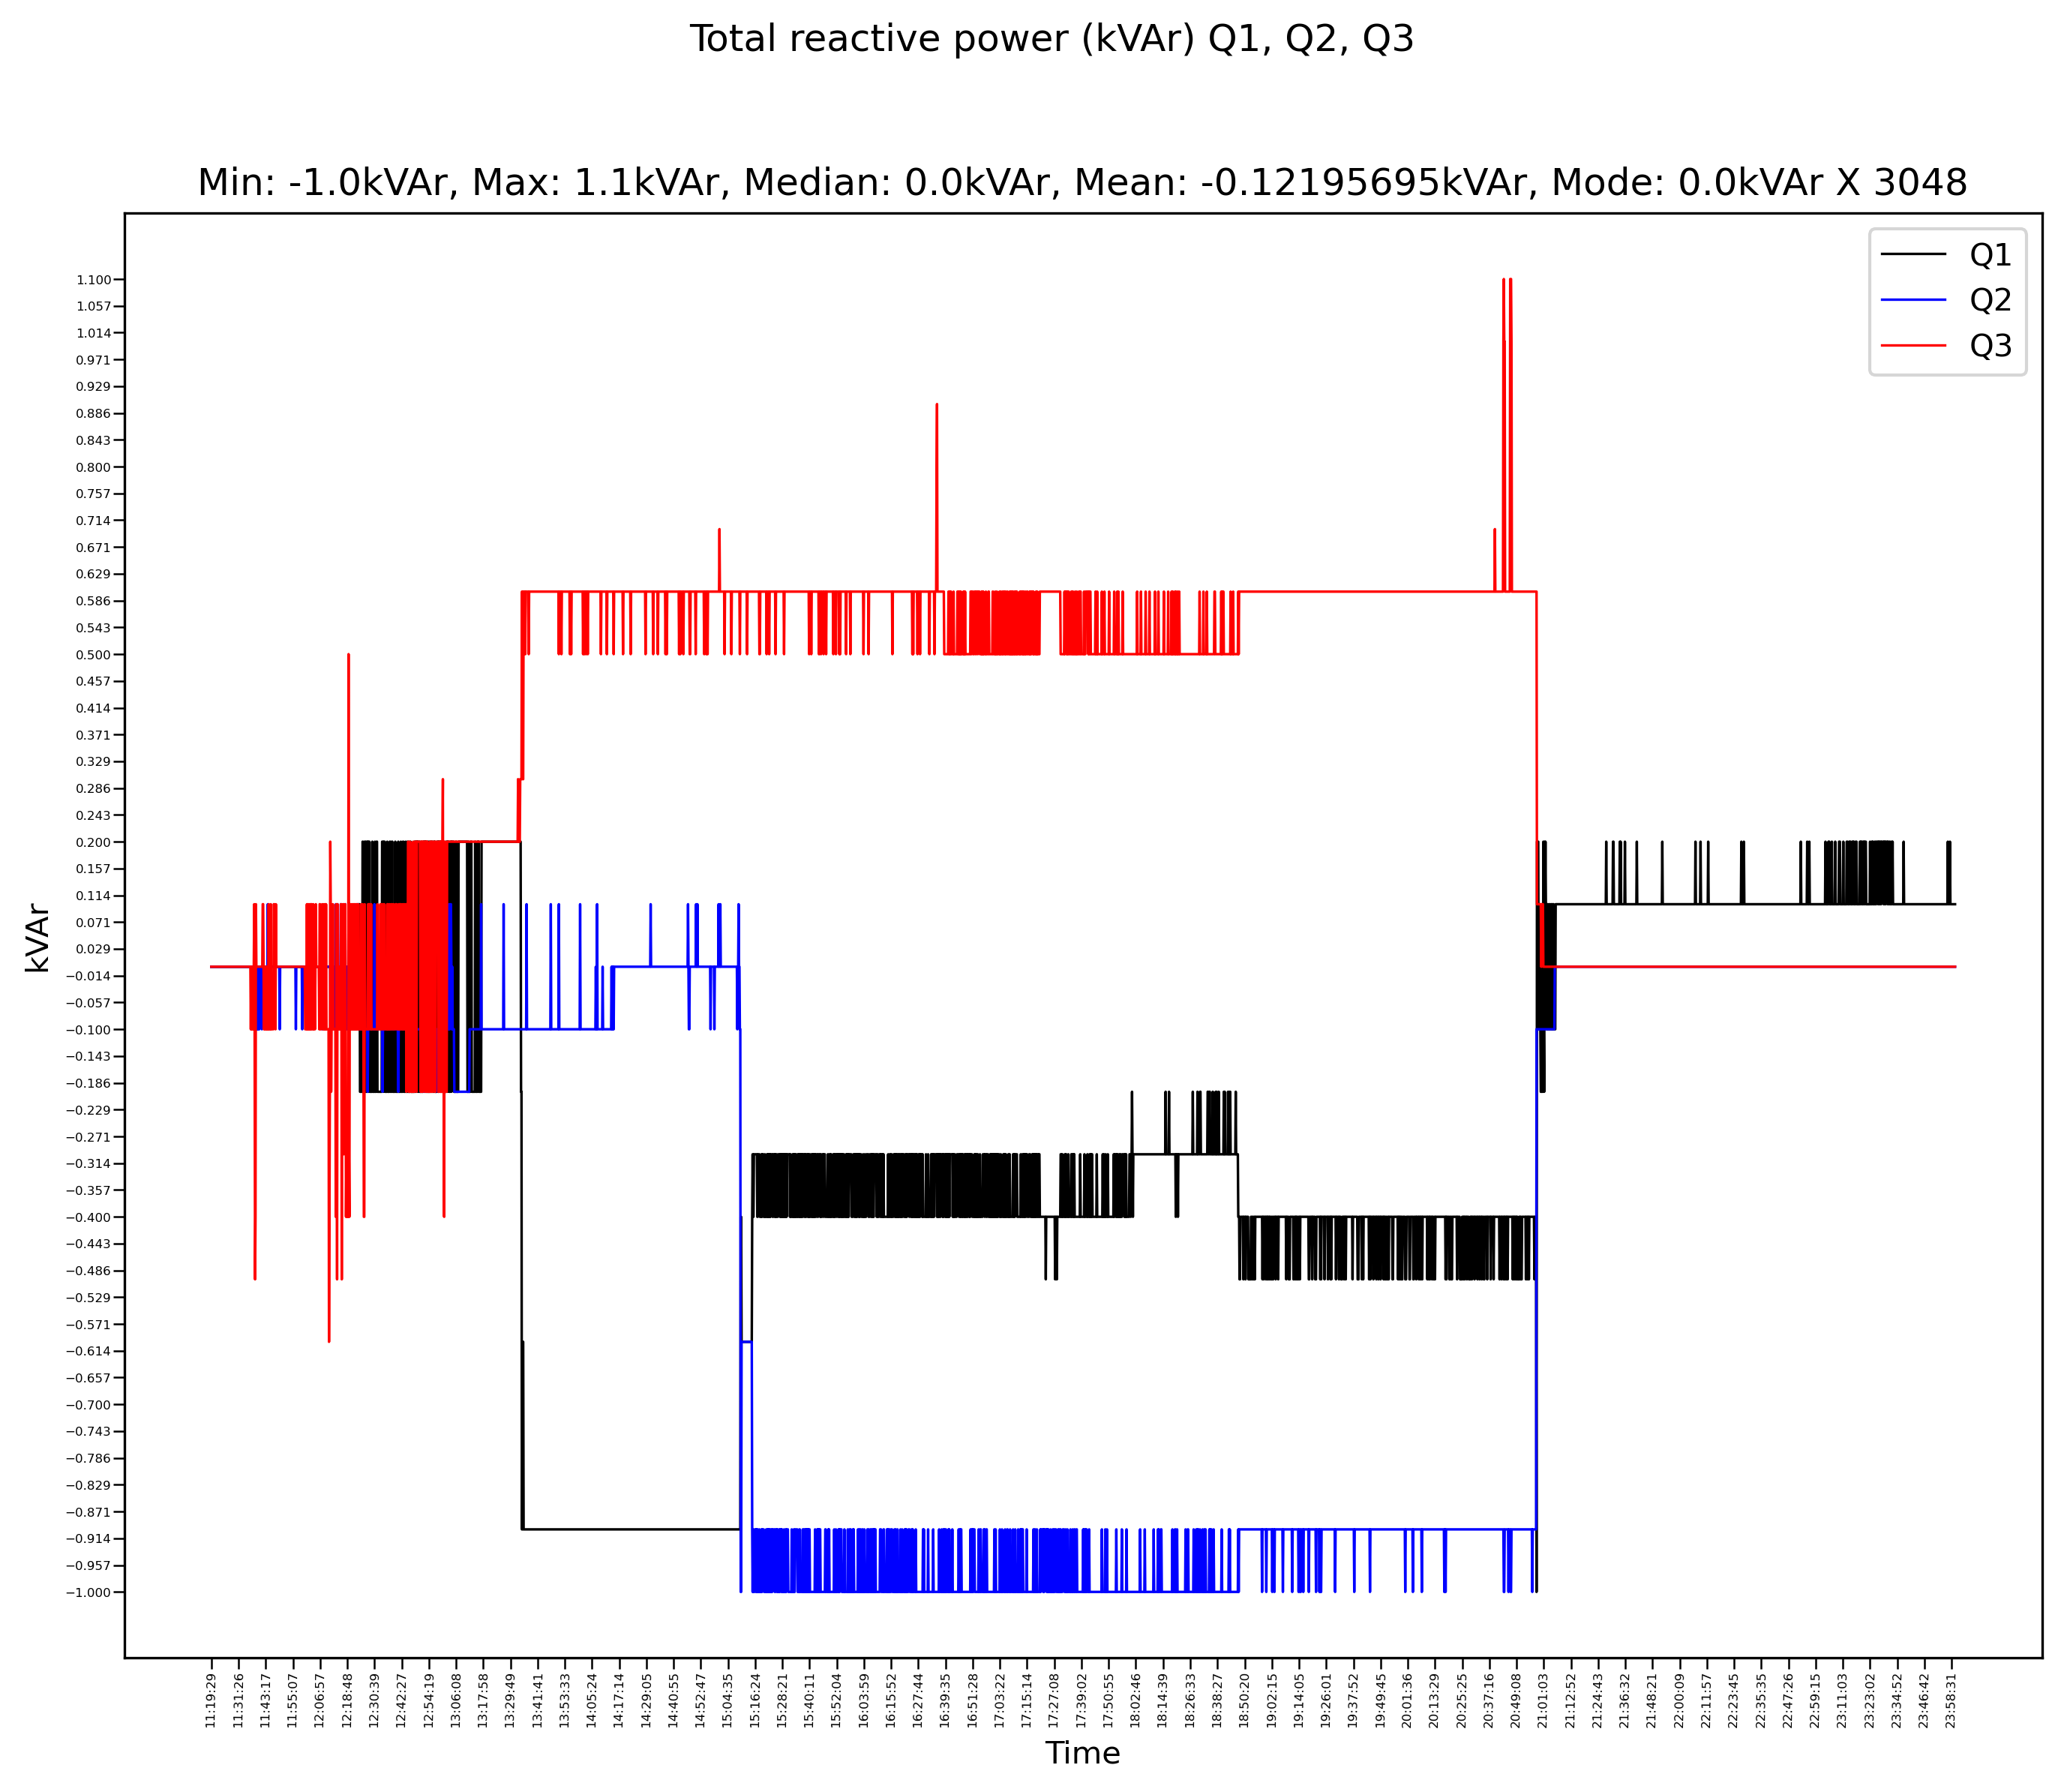

In [6]:
Q = q.MLabsPlot('Q')
Q.mkplot(ML.PlotData('Q'))
kAVr = q.MLabsPlot('kVAr')
kAVr.mkplot(ML.multiData('kVAr'))


# Total apparent power (kVA)

* S is Complex power, logged as kVA
 

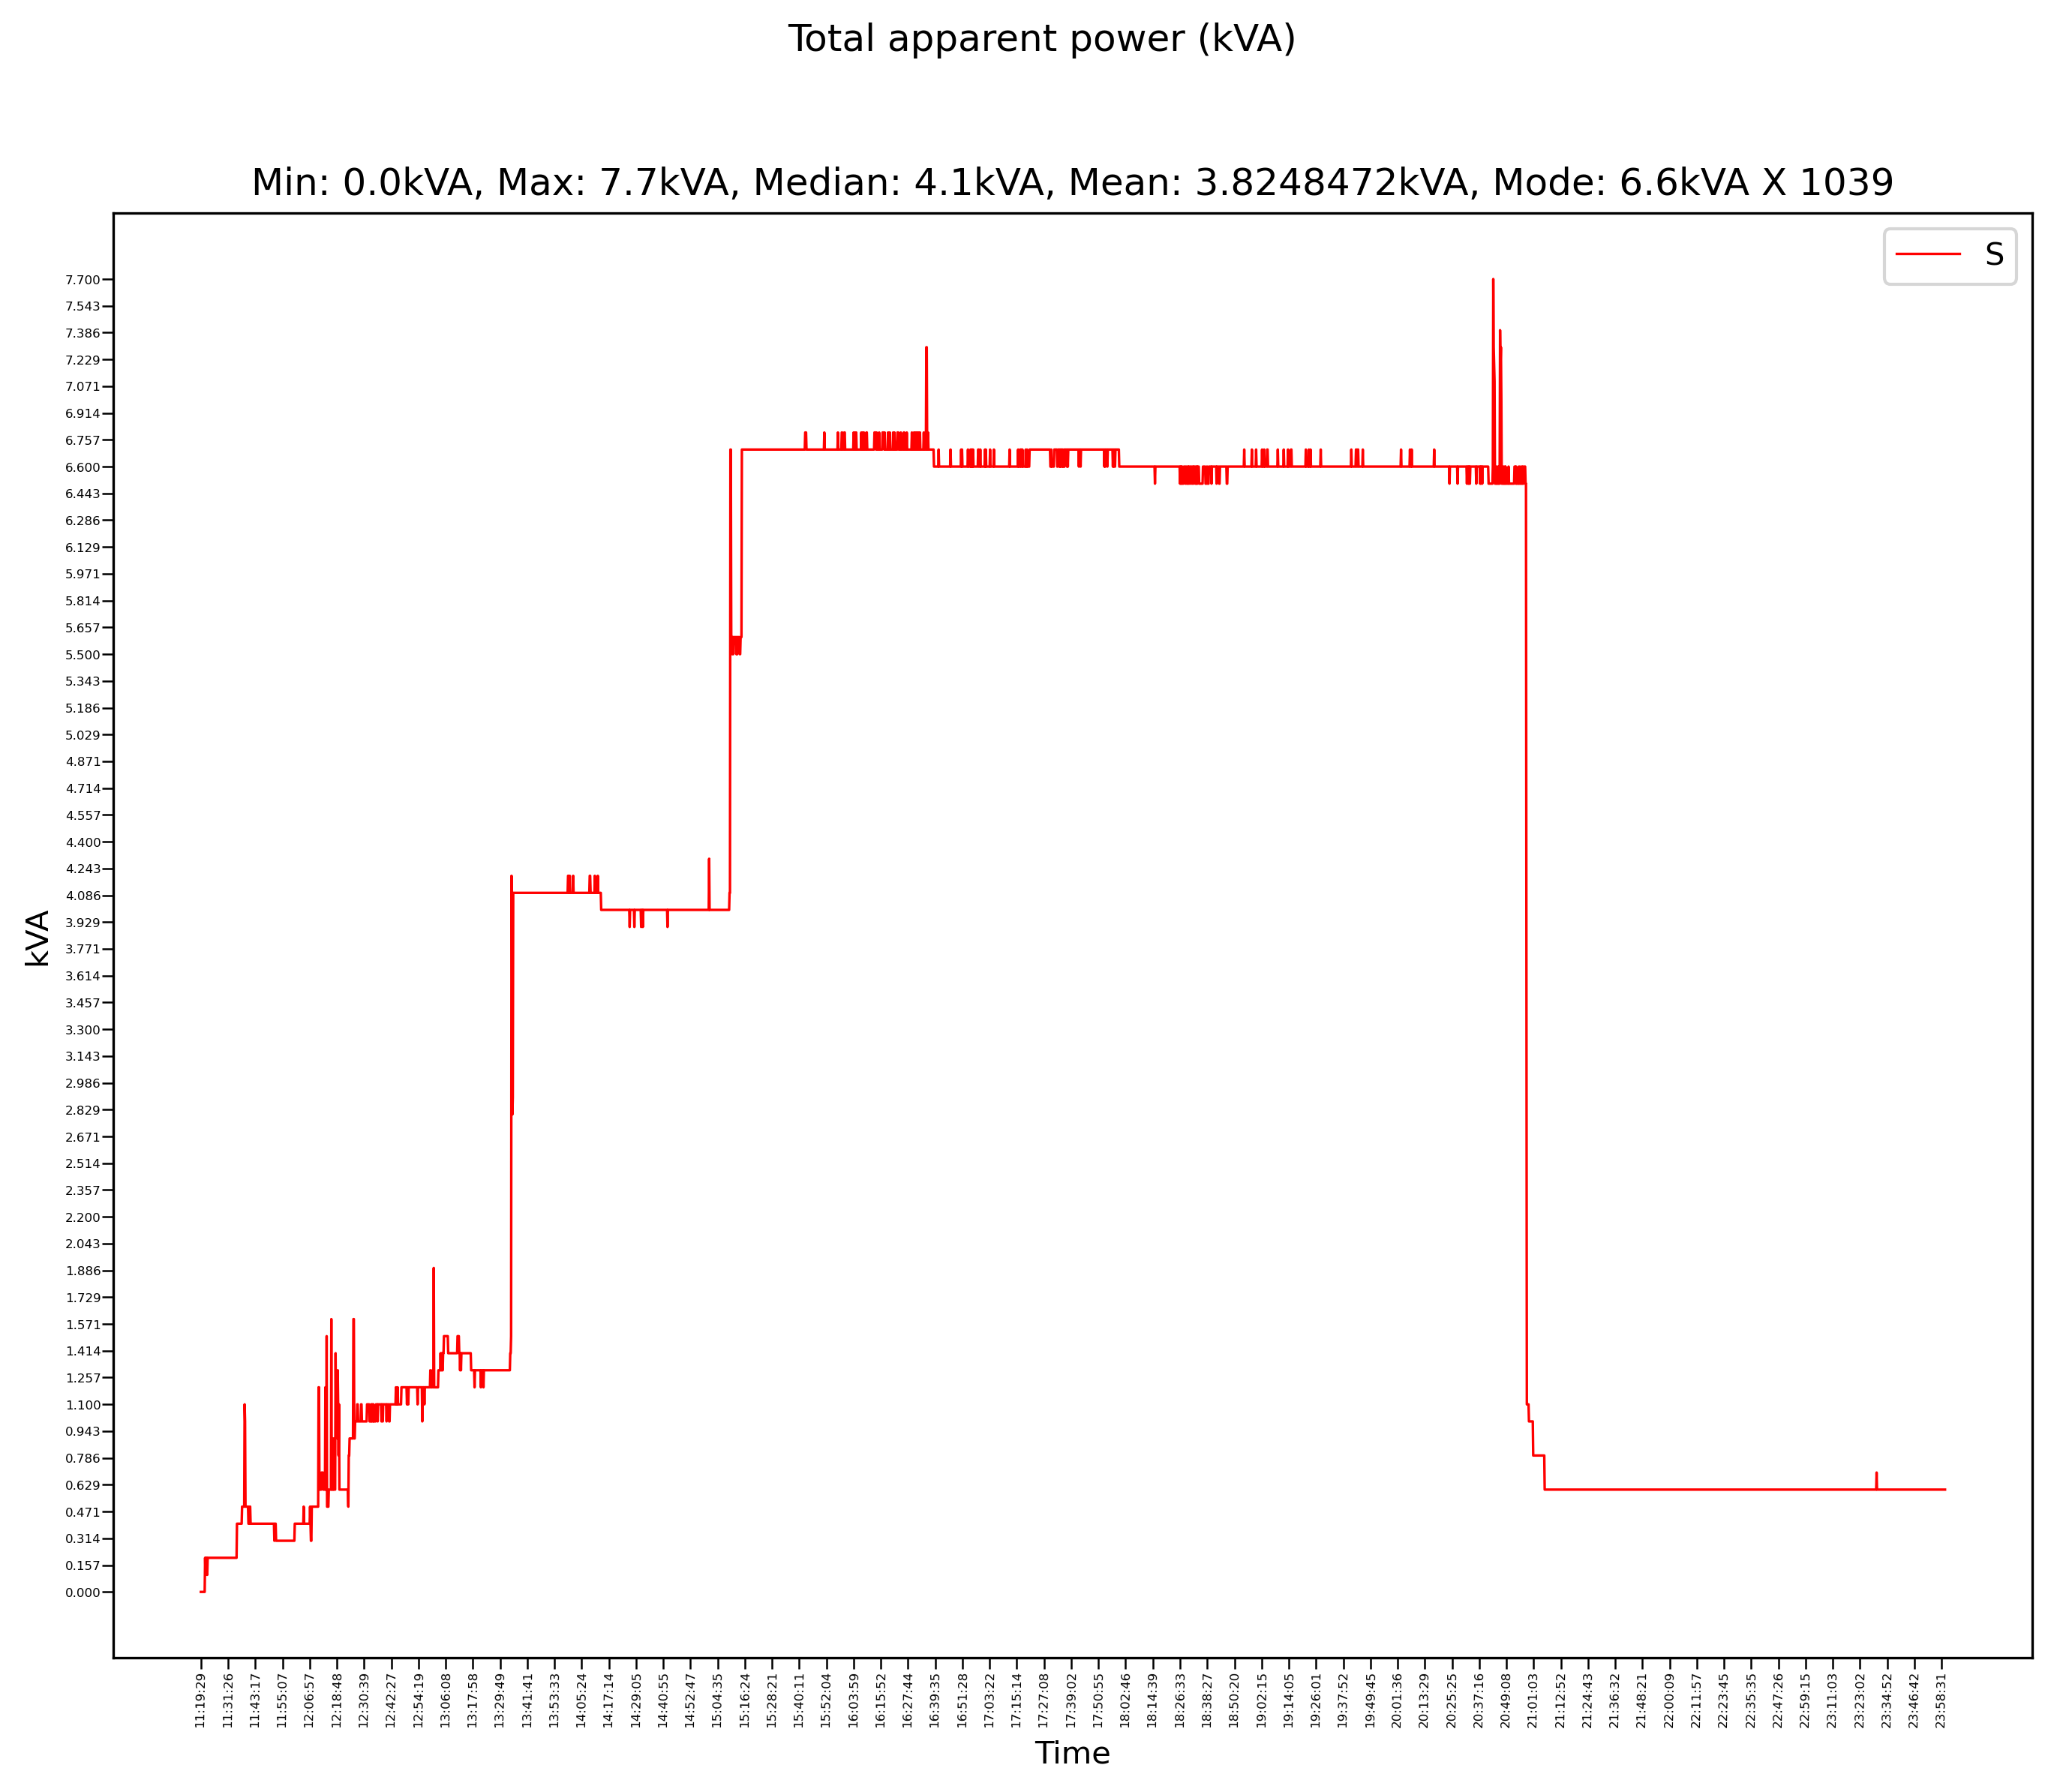

In [7]:
S = q.MLabsPlot('S')
S.mkplot(ML.PlotData('S'))


# Freqency
* Freq, logged as Hz

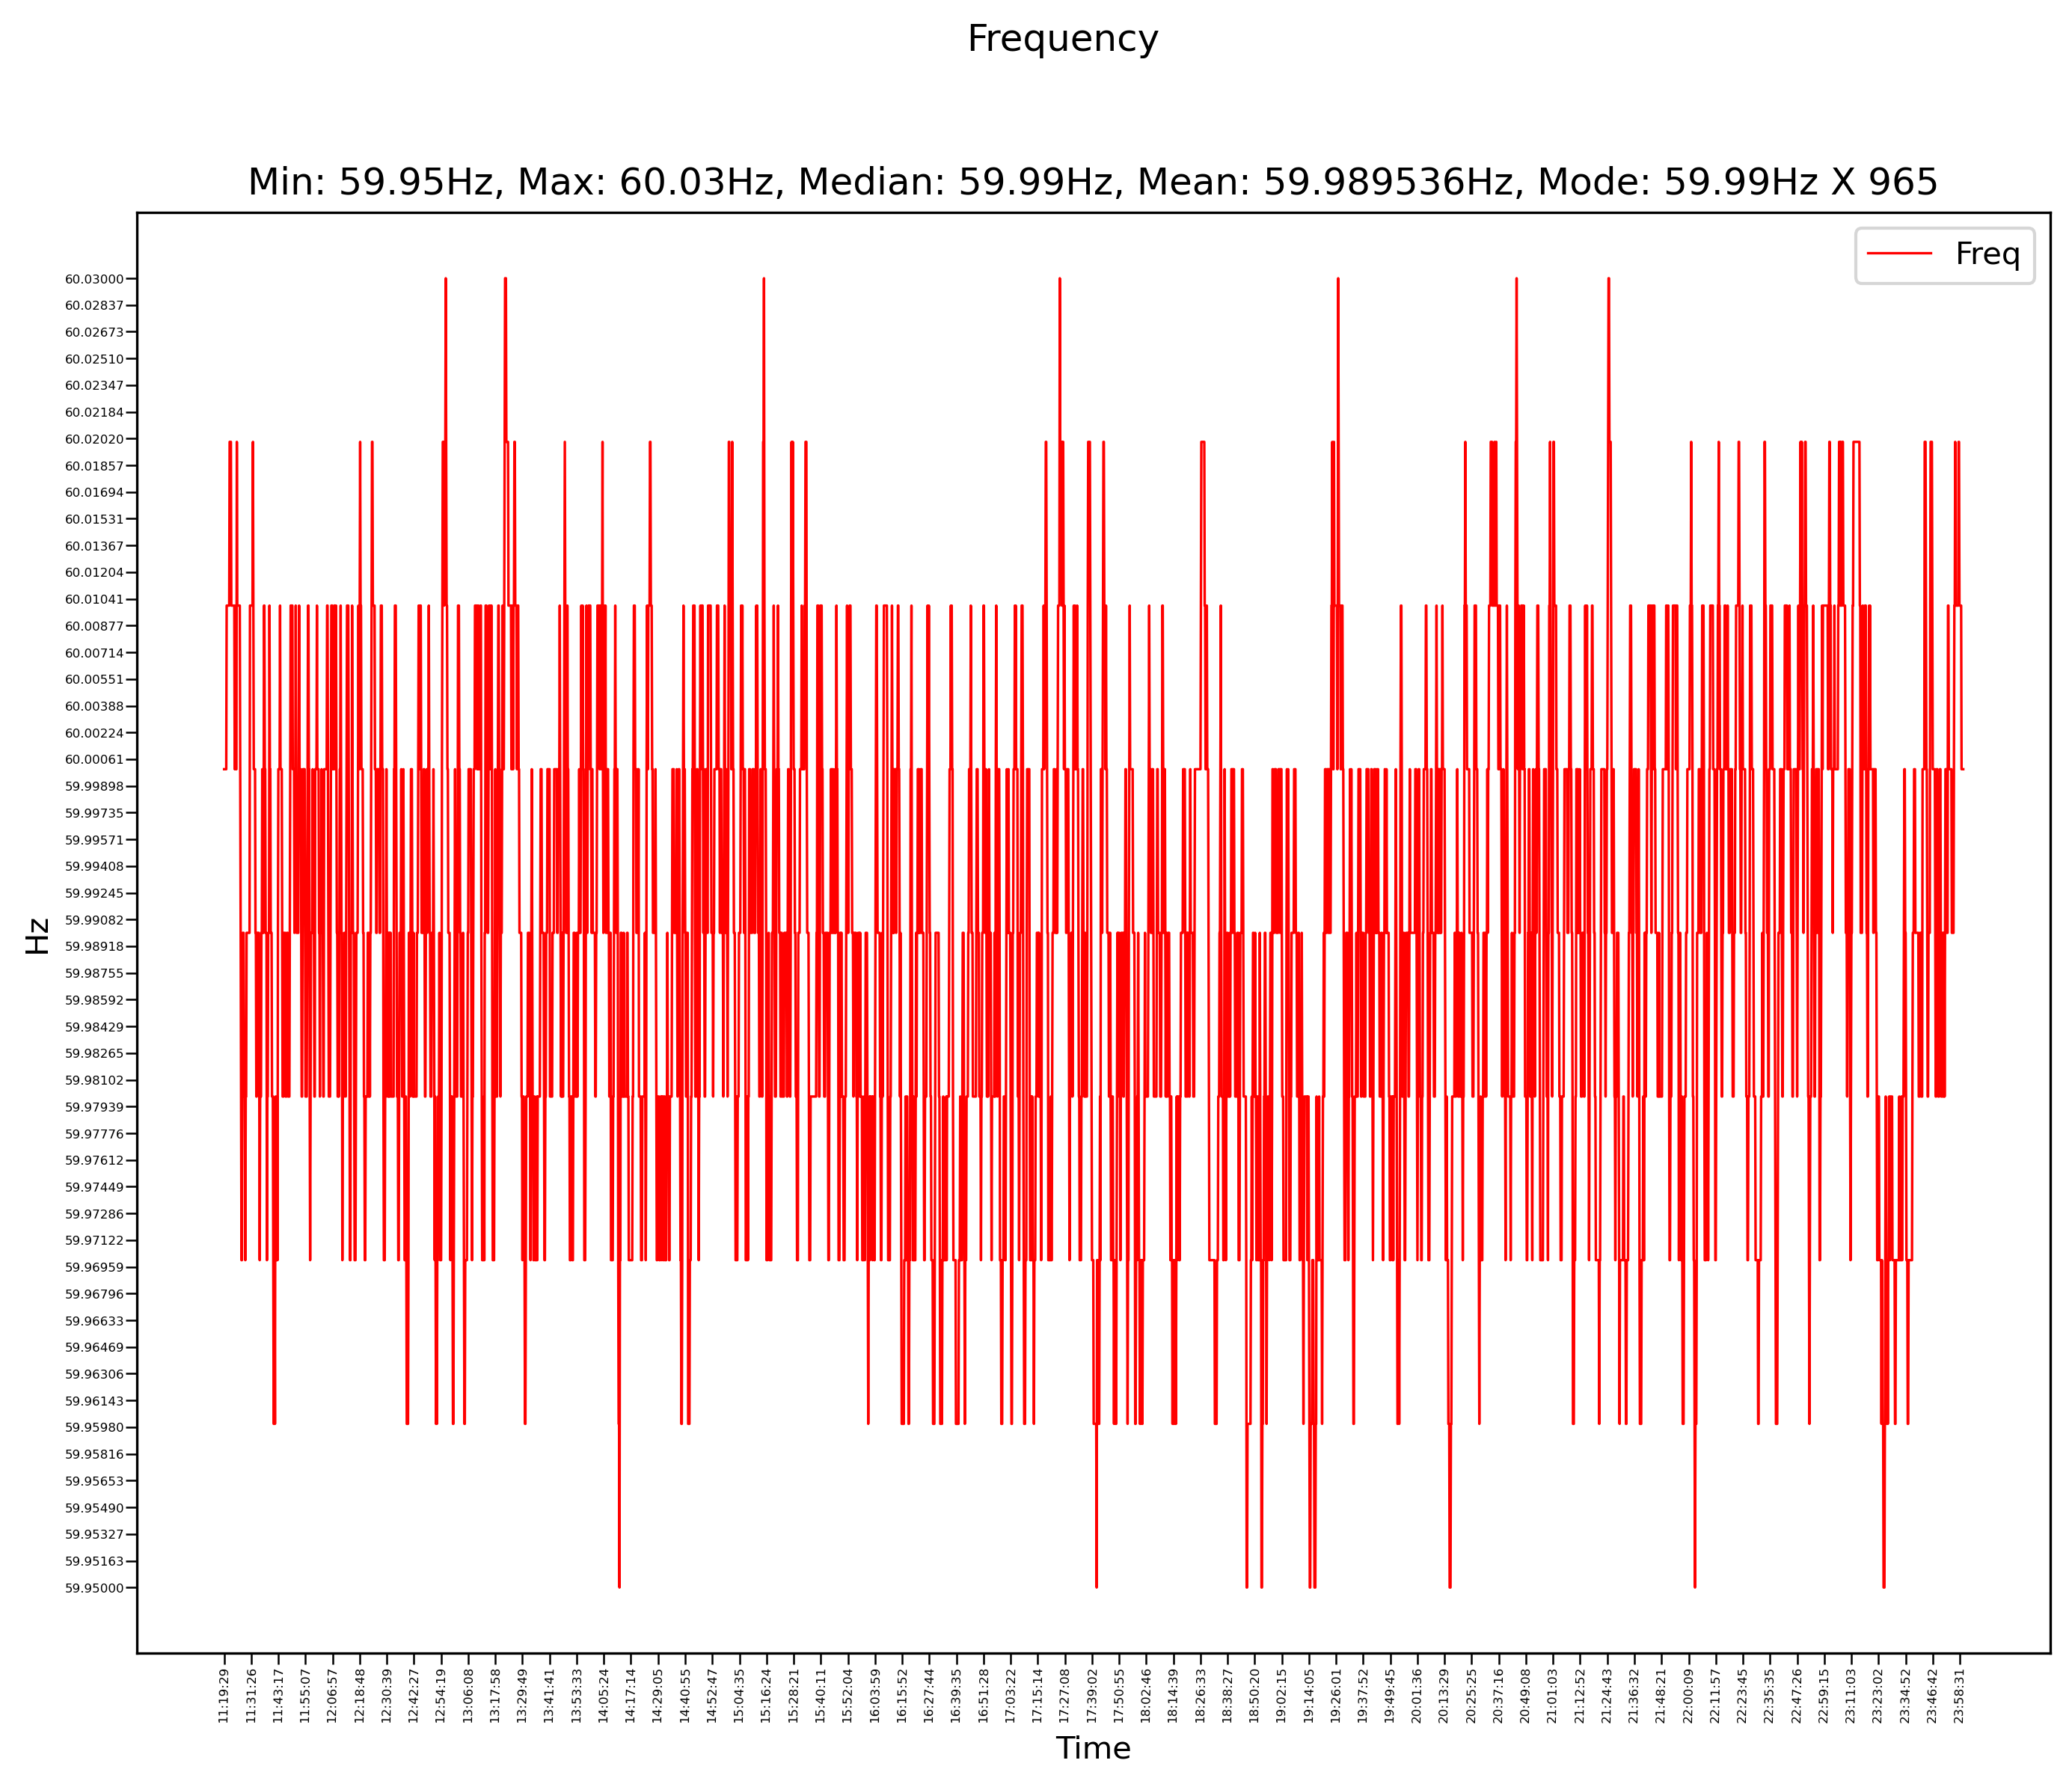

In [8]:
Freq = q.MLabsPlot('Freq')
Freq.mkplot(ML.PlotData('Freq'))

# Total power factor (pf) 

* PF

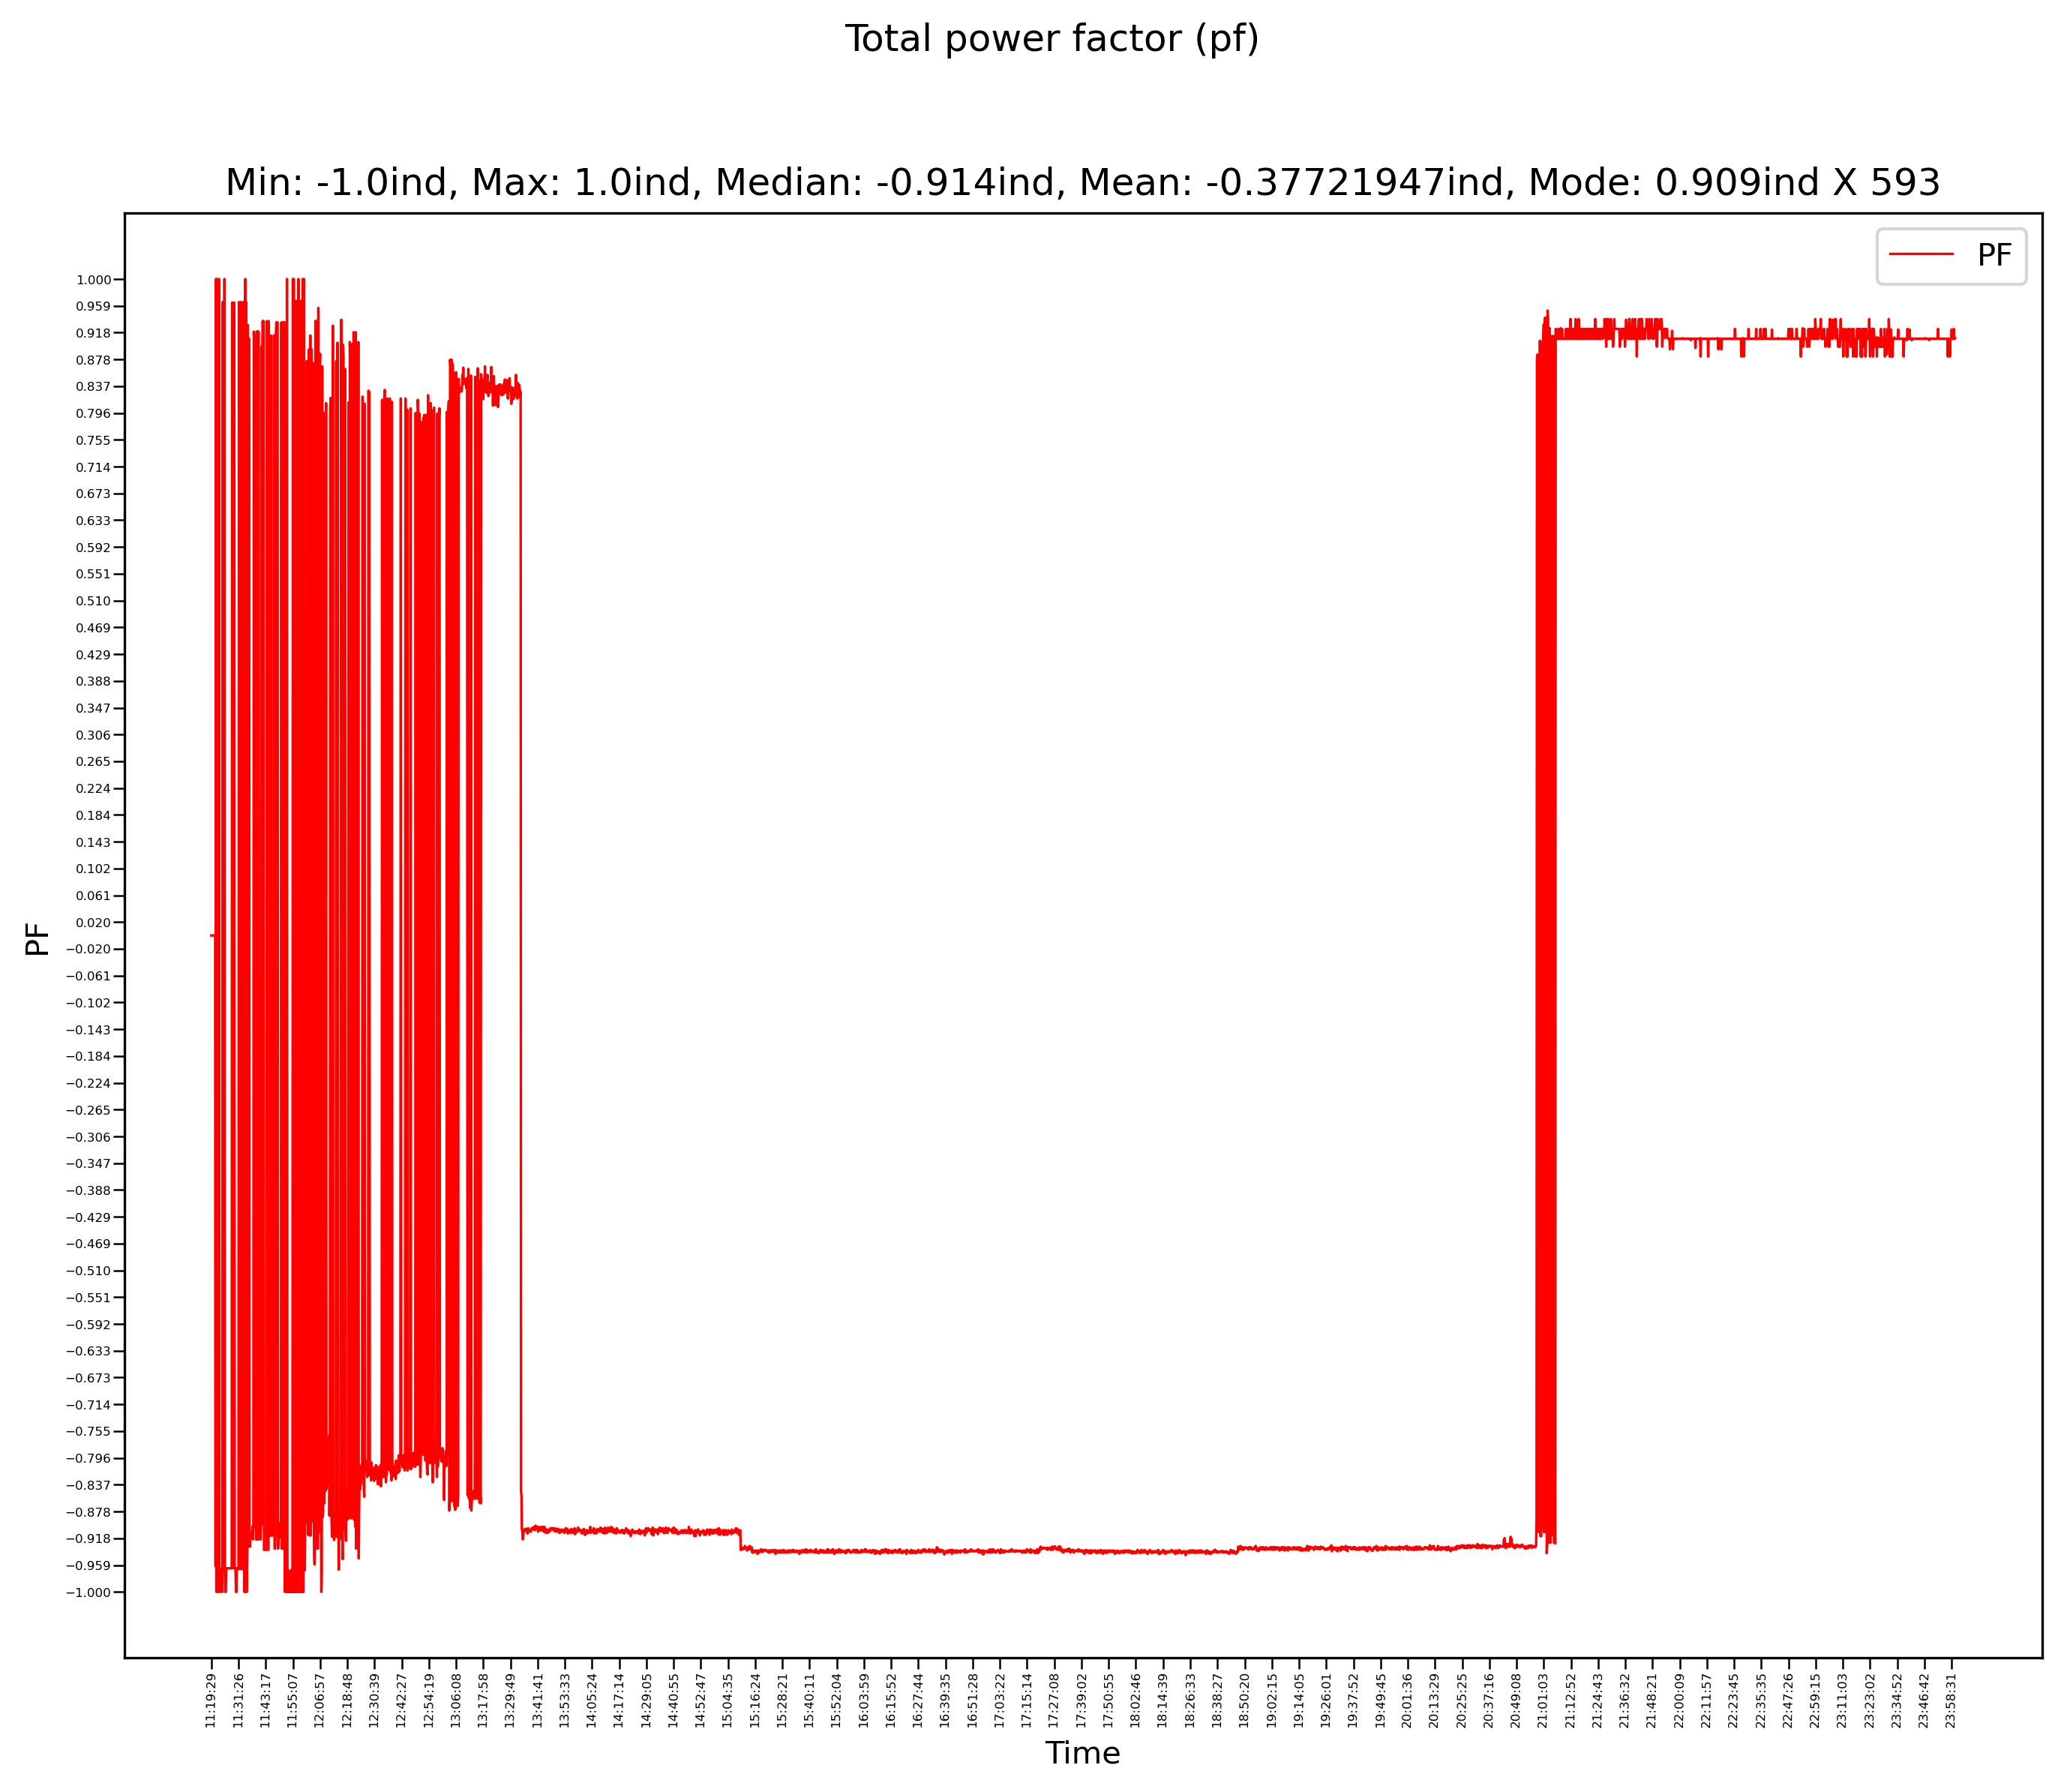

In [9]:
pf = q.MLabsPlot('PF')
pf.mkplot(ML.PlotData('PF'))

## Demands: Phase Currents 

* dI1 dI2, dI3, dIo as Amps

## Demands: Active

* dkW as kW

## Demands: Reactive Power 

* dkVAr as kVAr


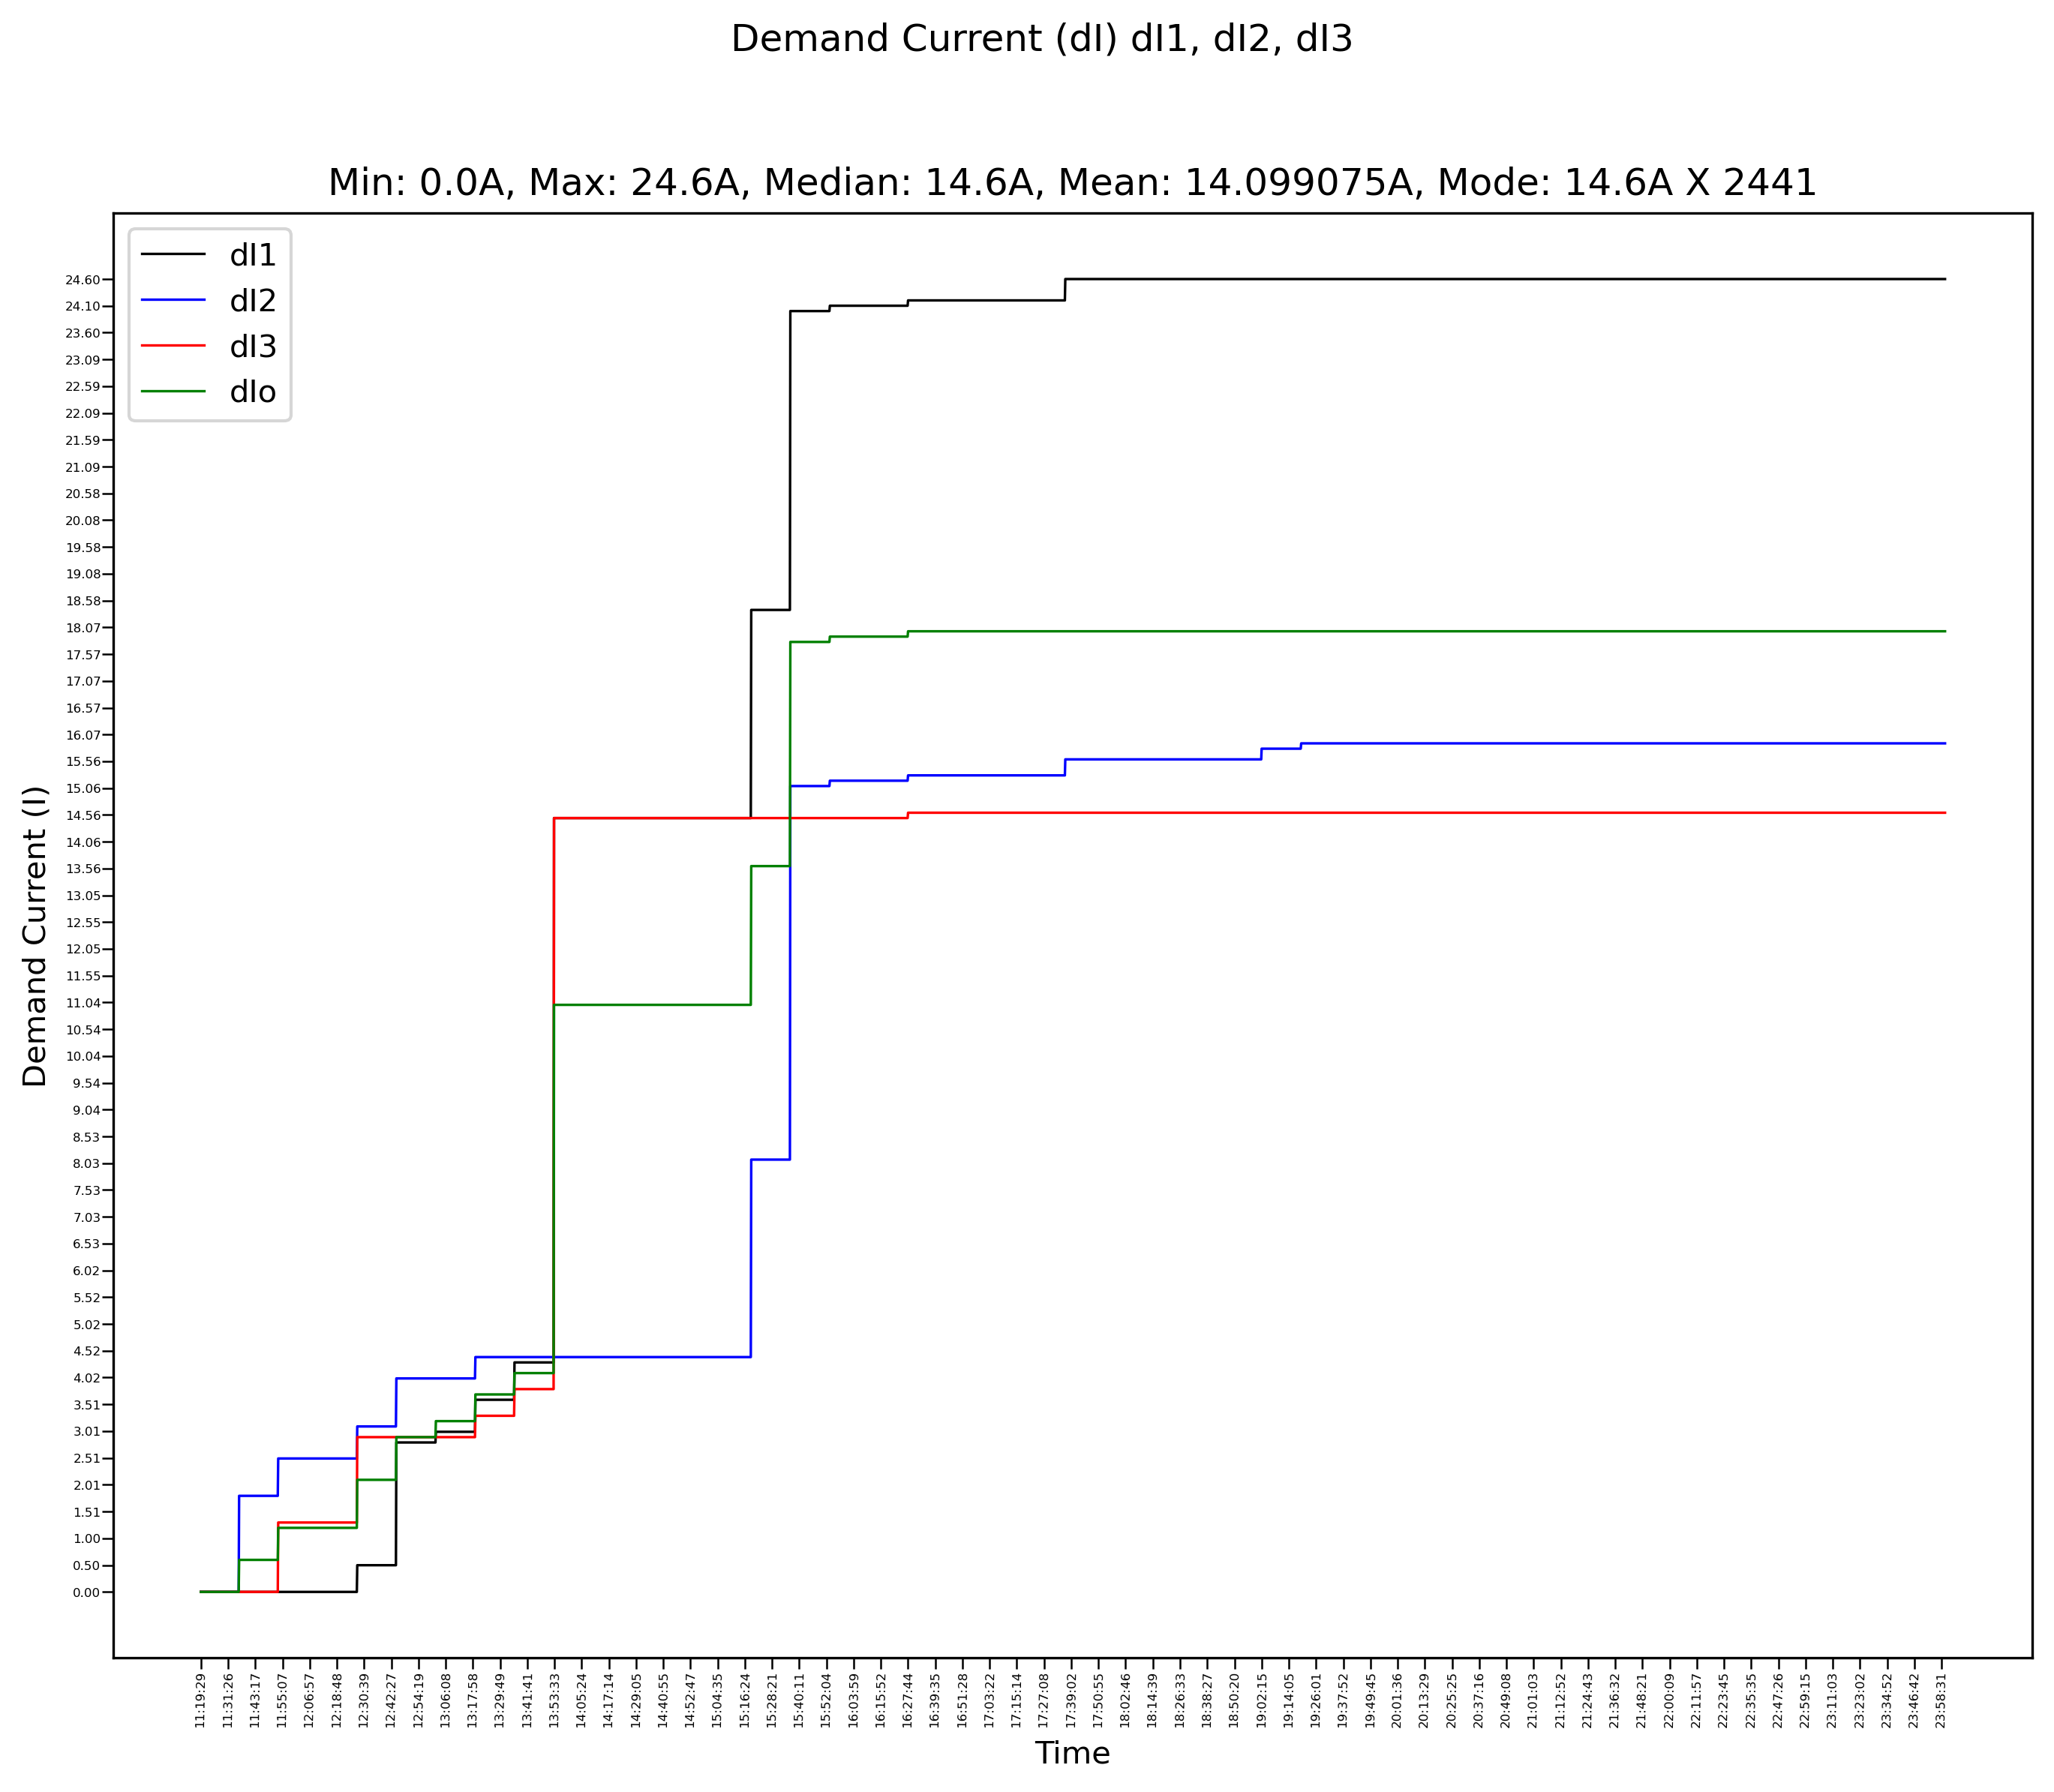

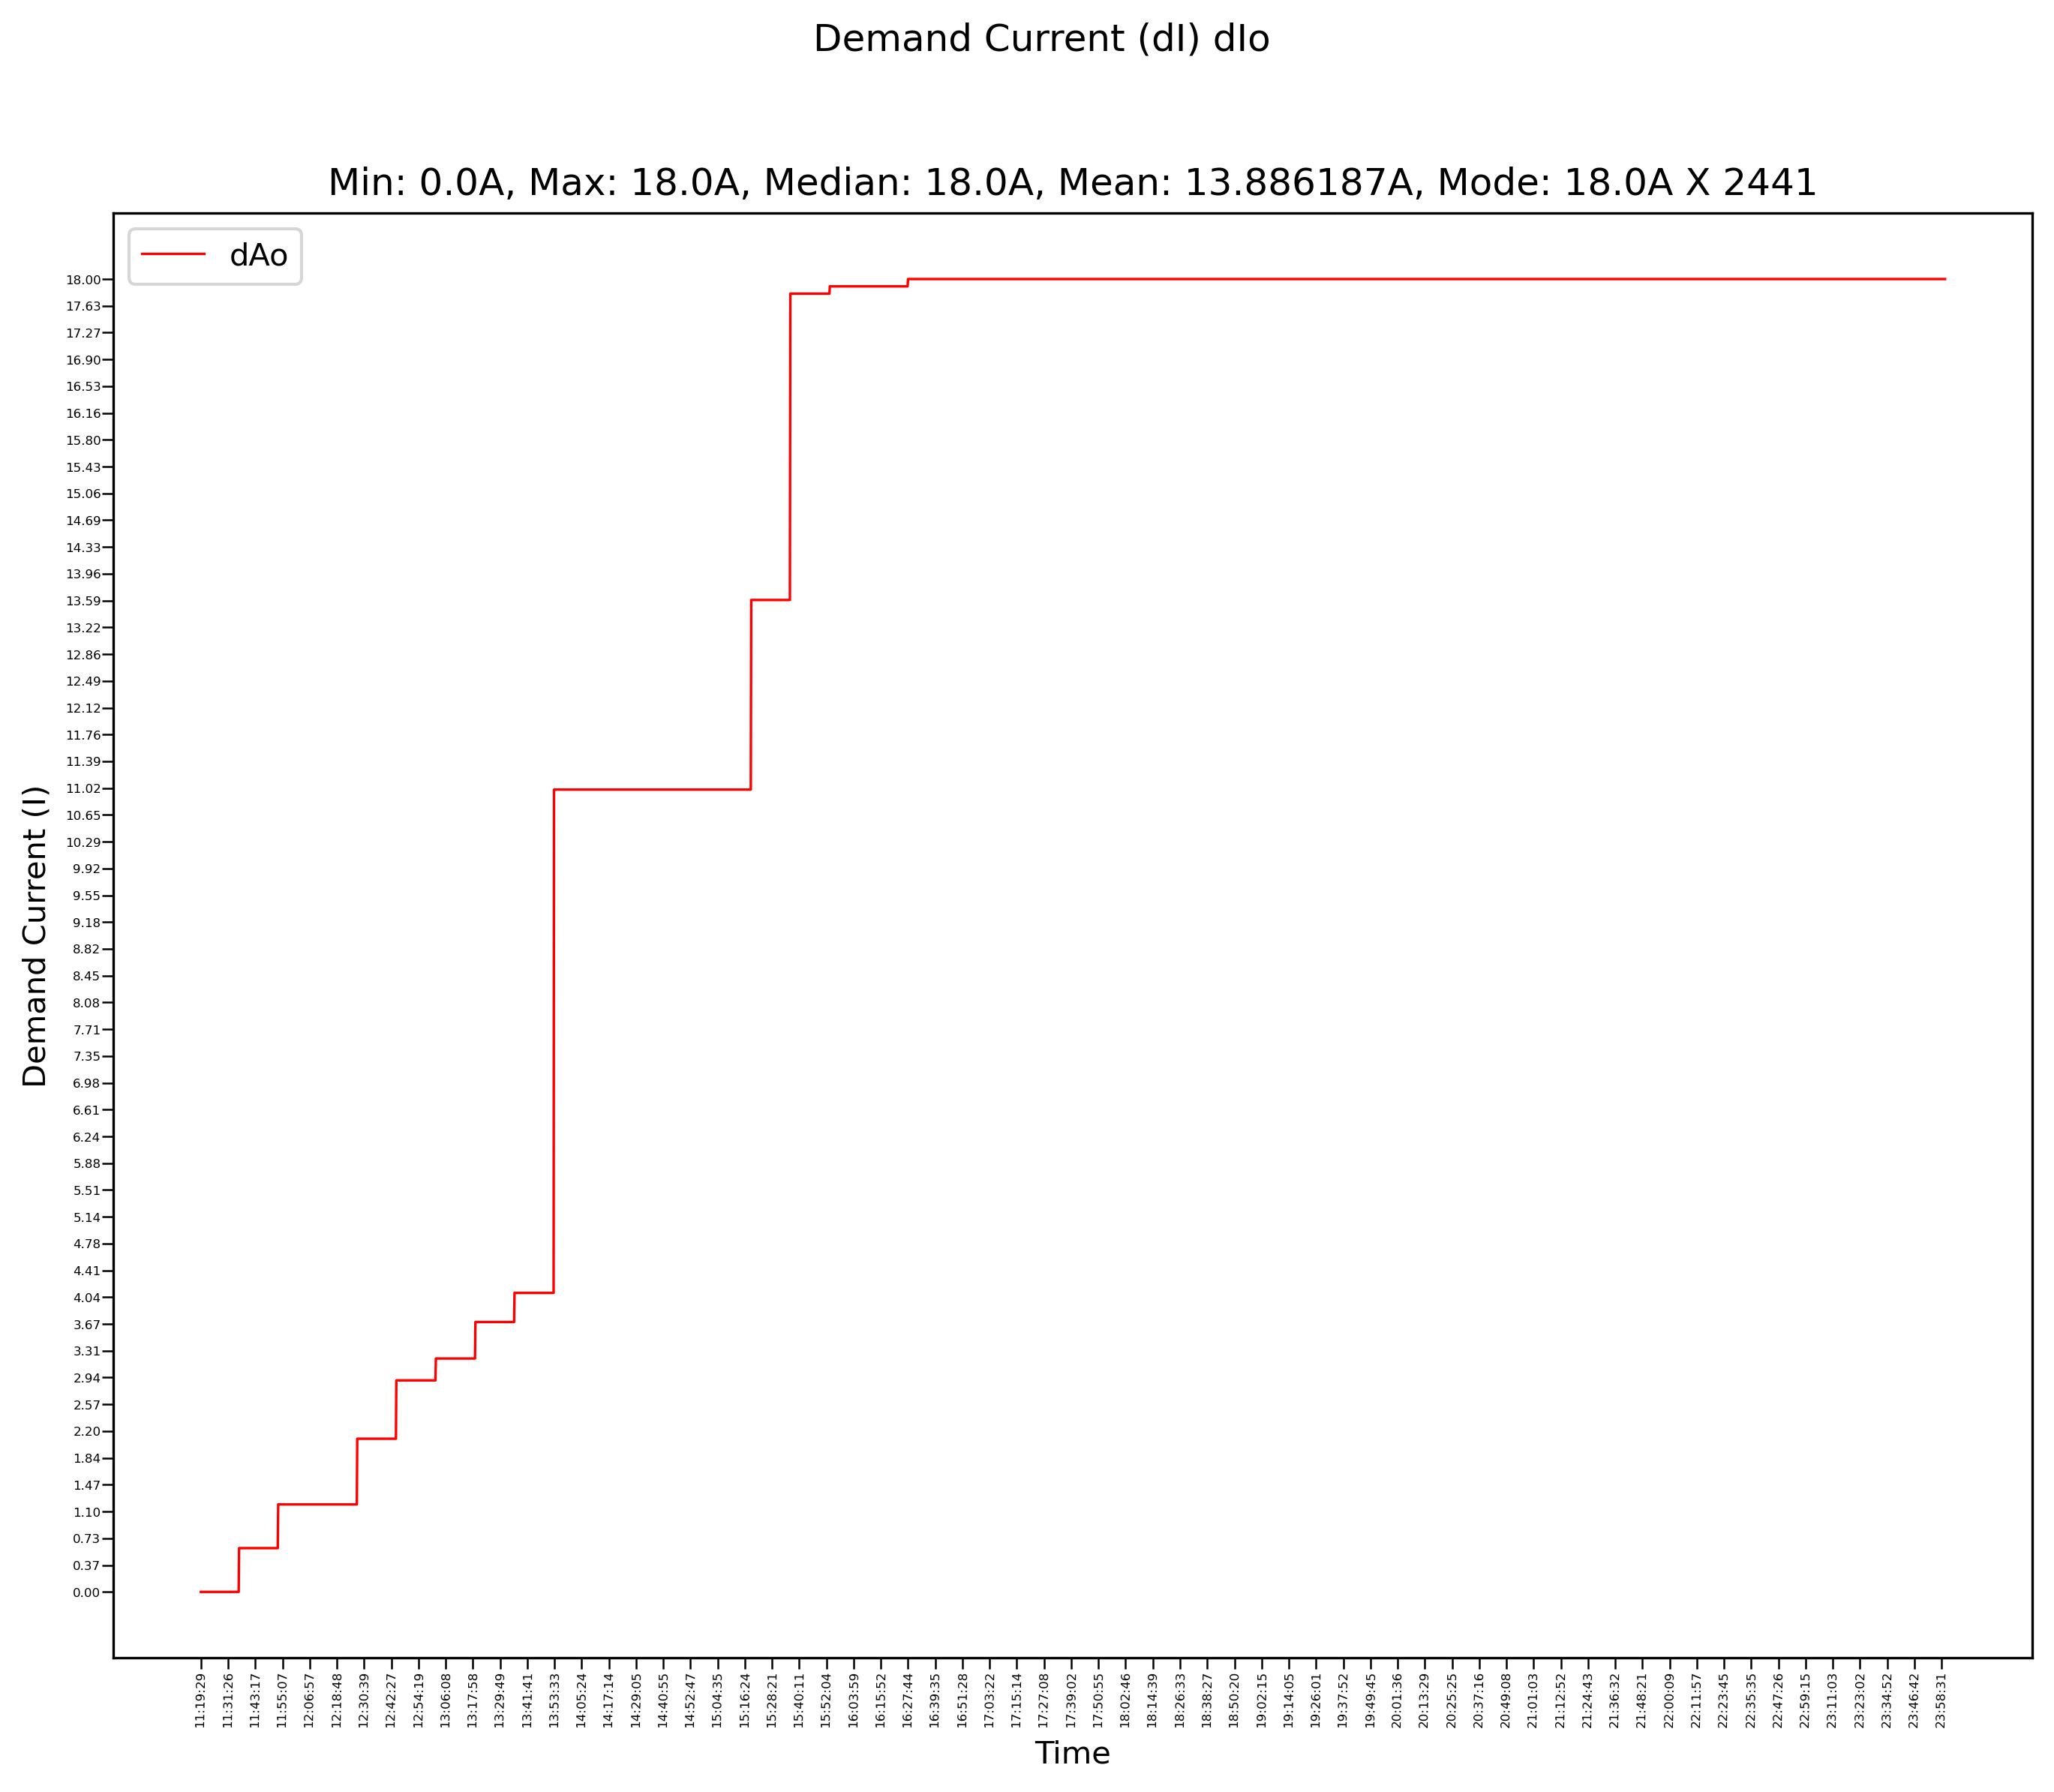

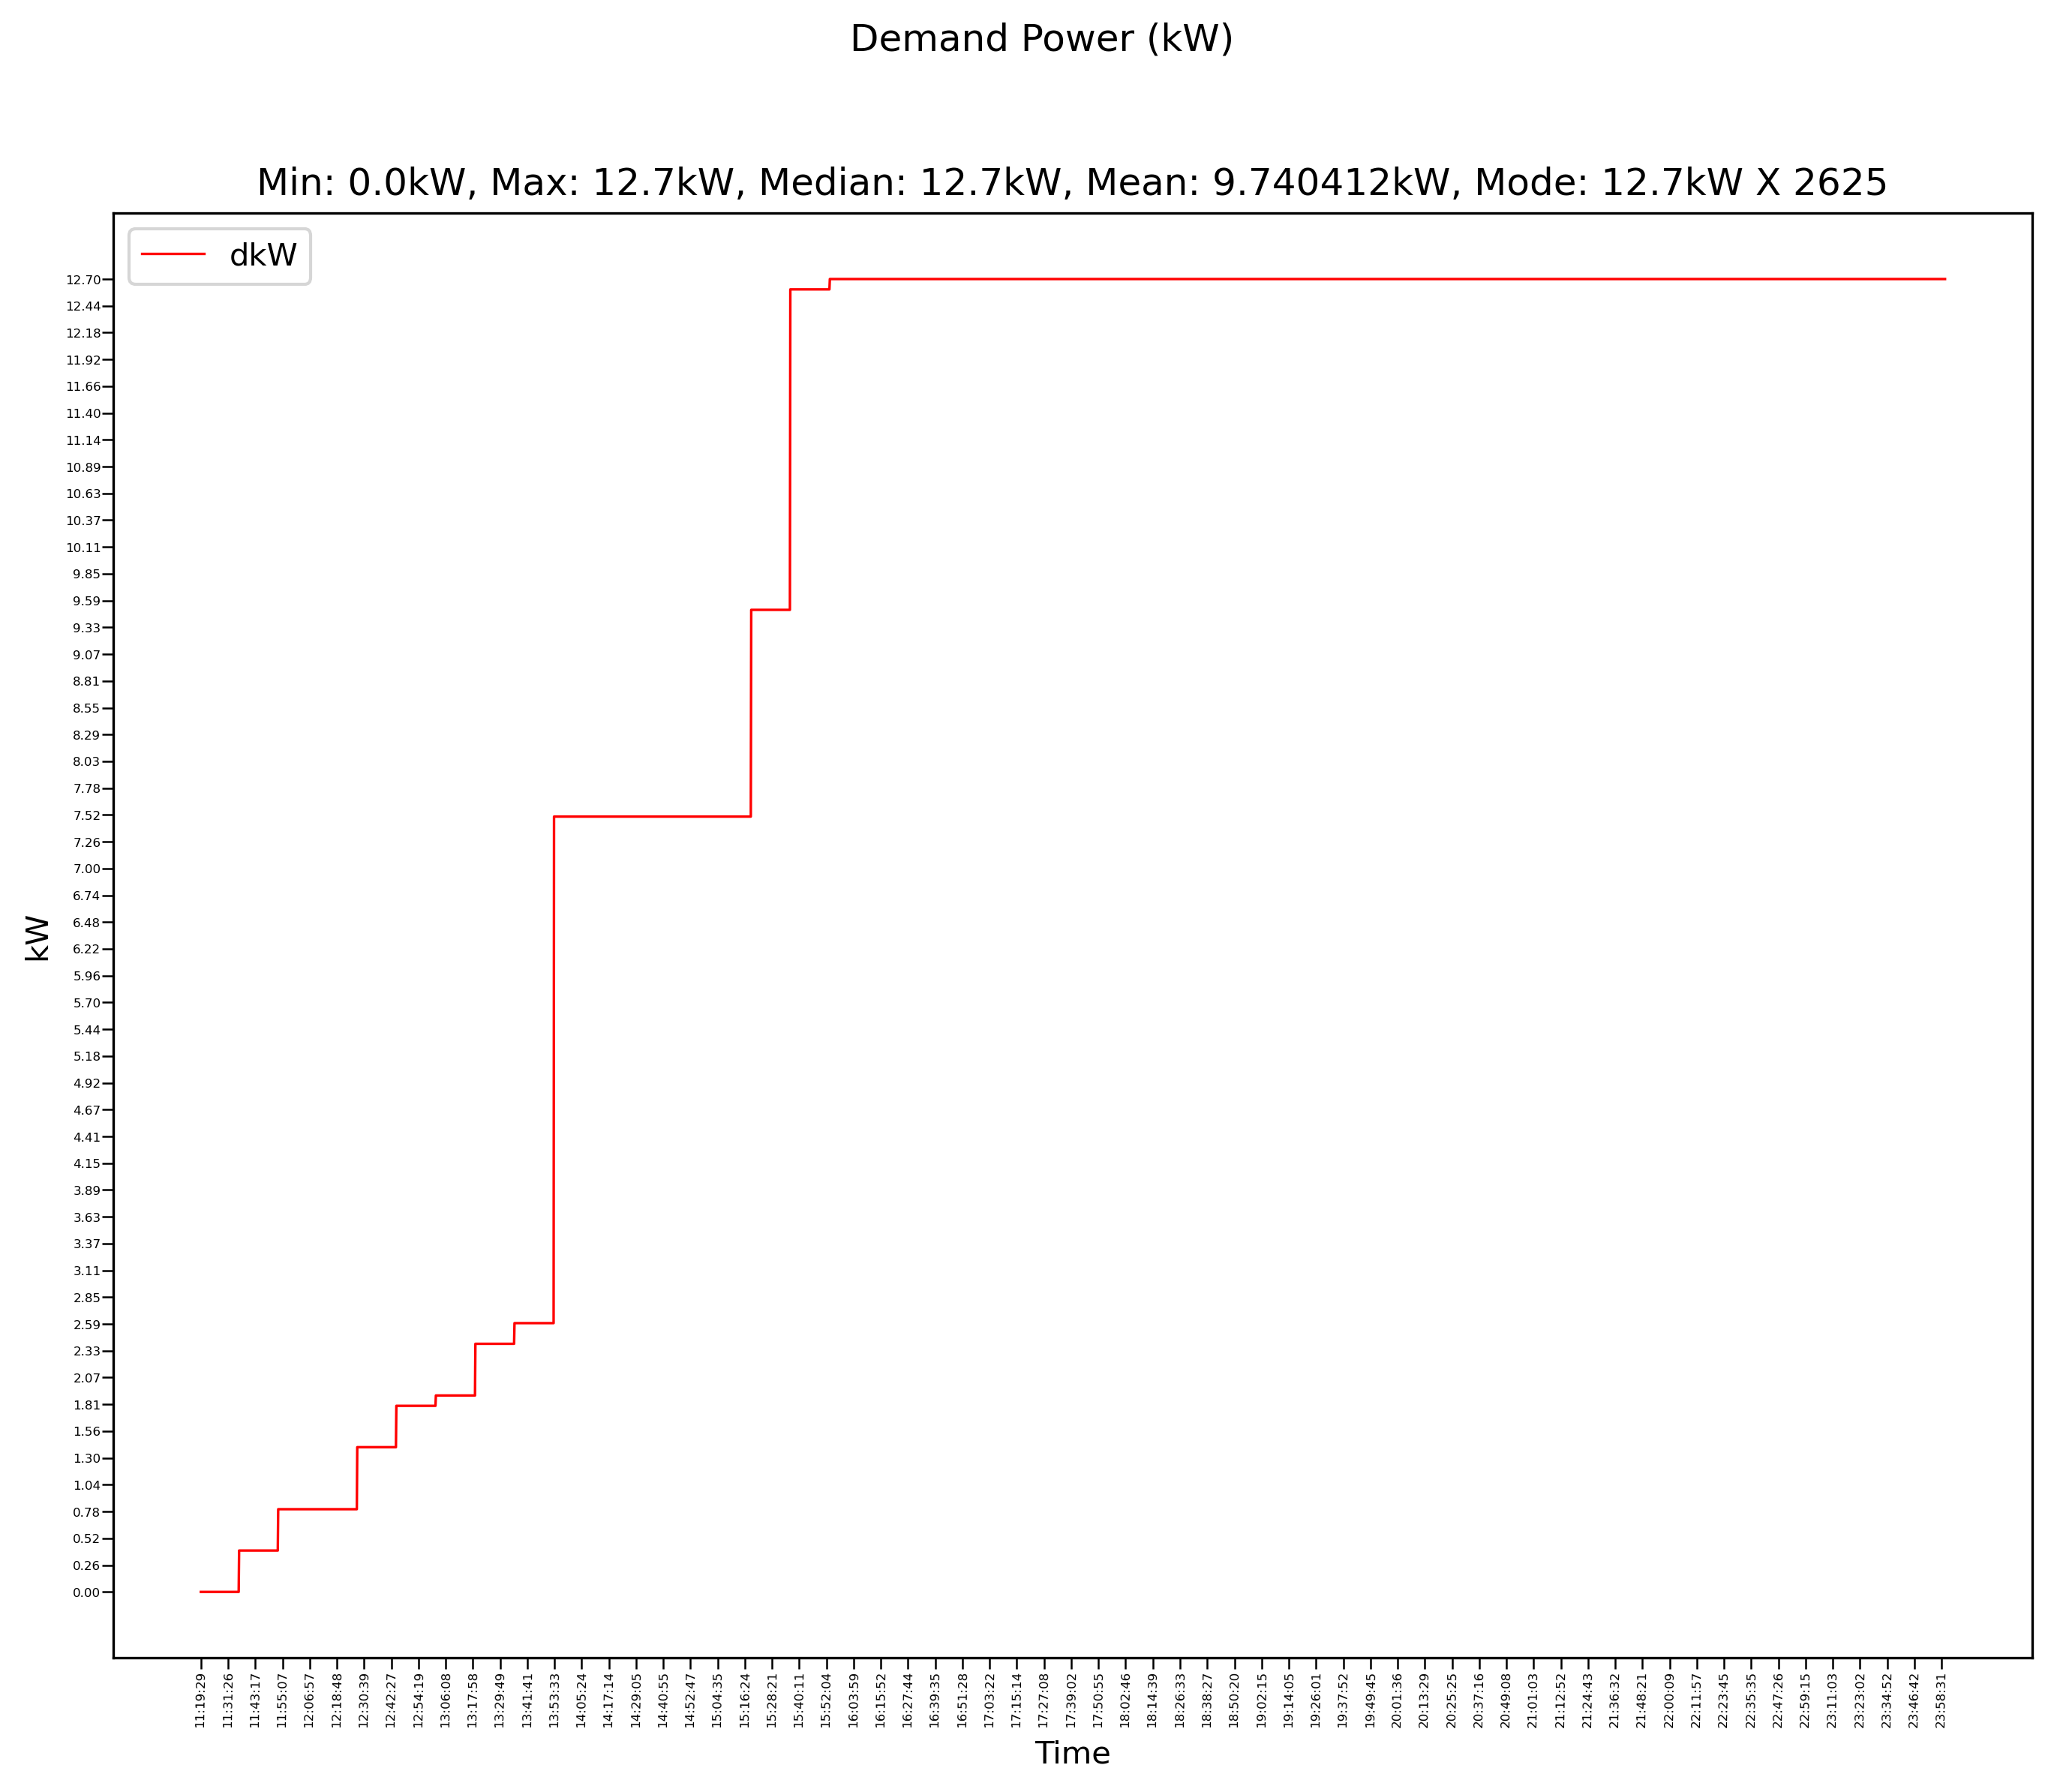

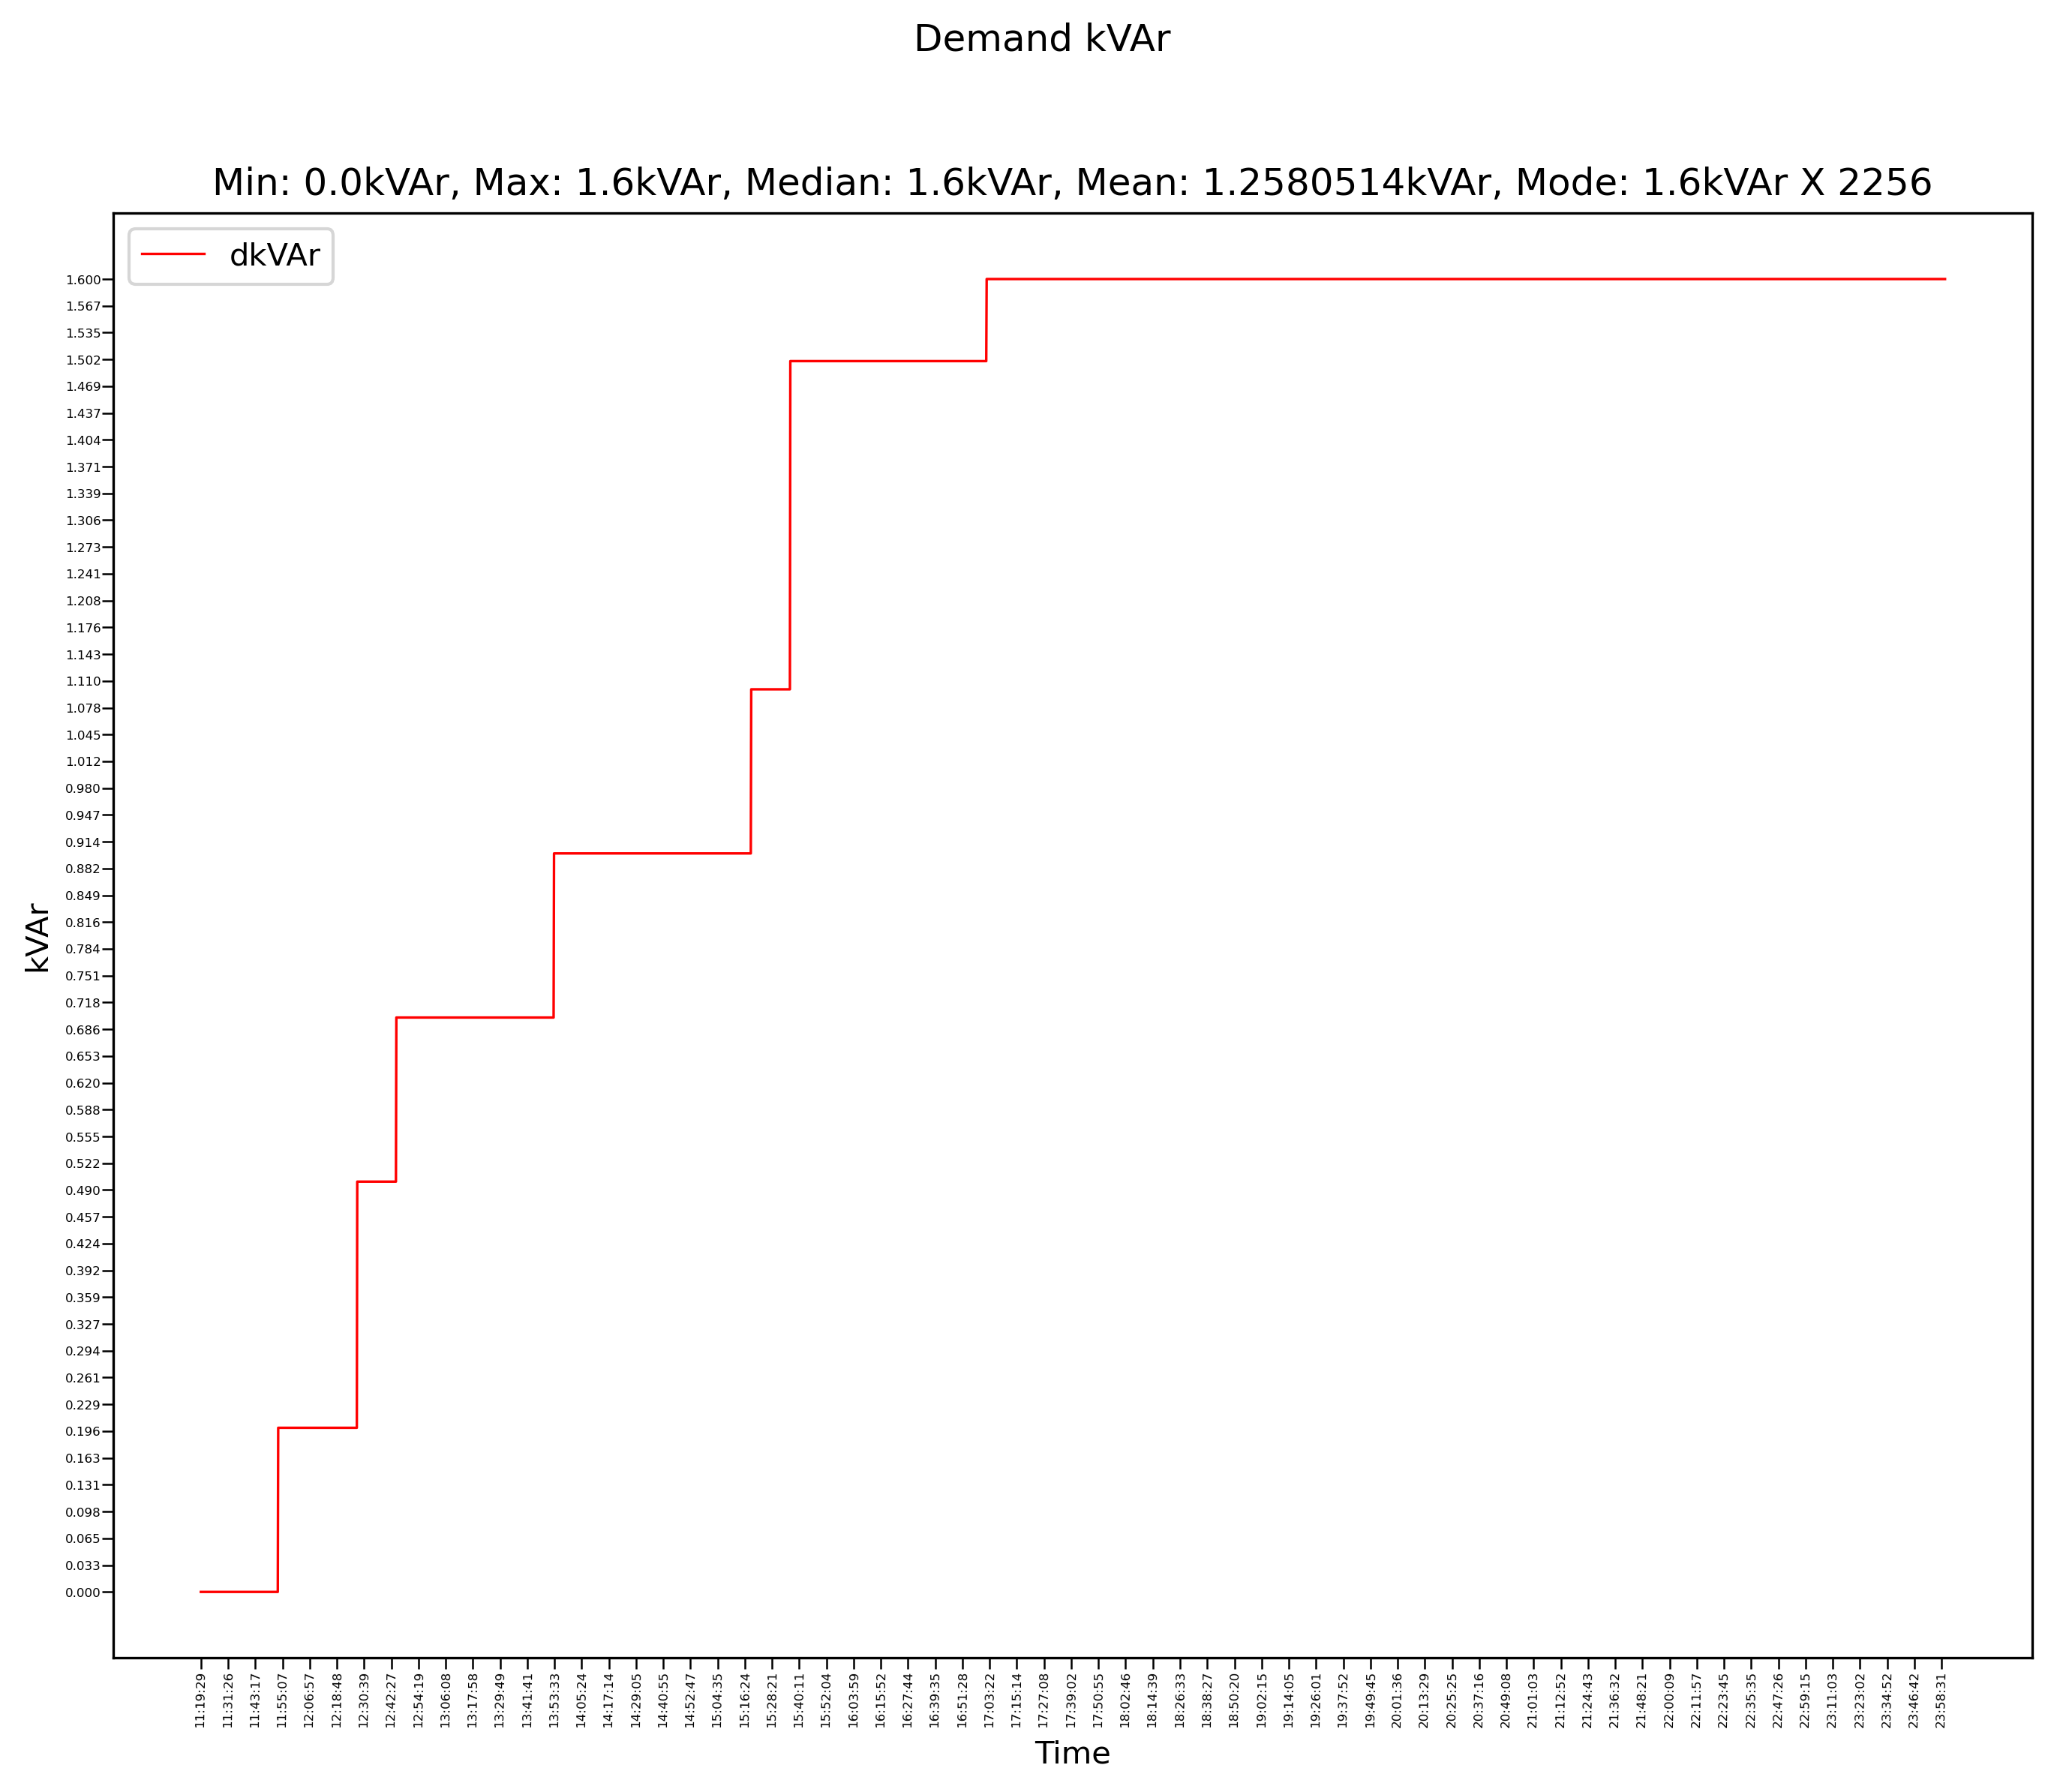

In [10]:
damps = q.MLabsPlot('damps')
damps.mkplot(ML.multiData('damps'))

dAo = q.MLabsPlot('dAo')
dAo.mkplot(ML.PlotData('dAo'))

dkW = q.MLabsPlot('dkW')
dkW.mkplot(ML.PlotData('dkW'))

dkVAr = q.MLabsPlot('dkVAr')
dkVAr.mkplot(ML.PlotData('dkVAr'))

# Total harmonic distortion: 

The Total Harmonic Distortion (THD) mode displays the following:
* THD per phase

THD L1, THD L2, THD L3

* THD phase to phase

THD L12 THD L23 THD L31

* THD current per phase

THD I1 THD I2 THD I3

* THD neutral current

THD In

*values are floats*



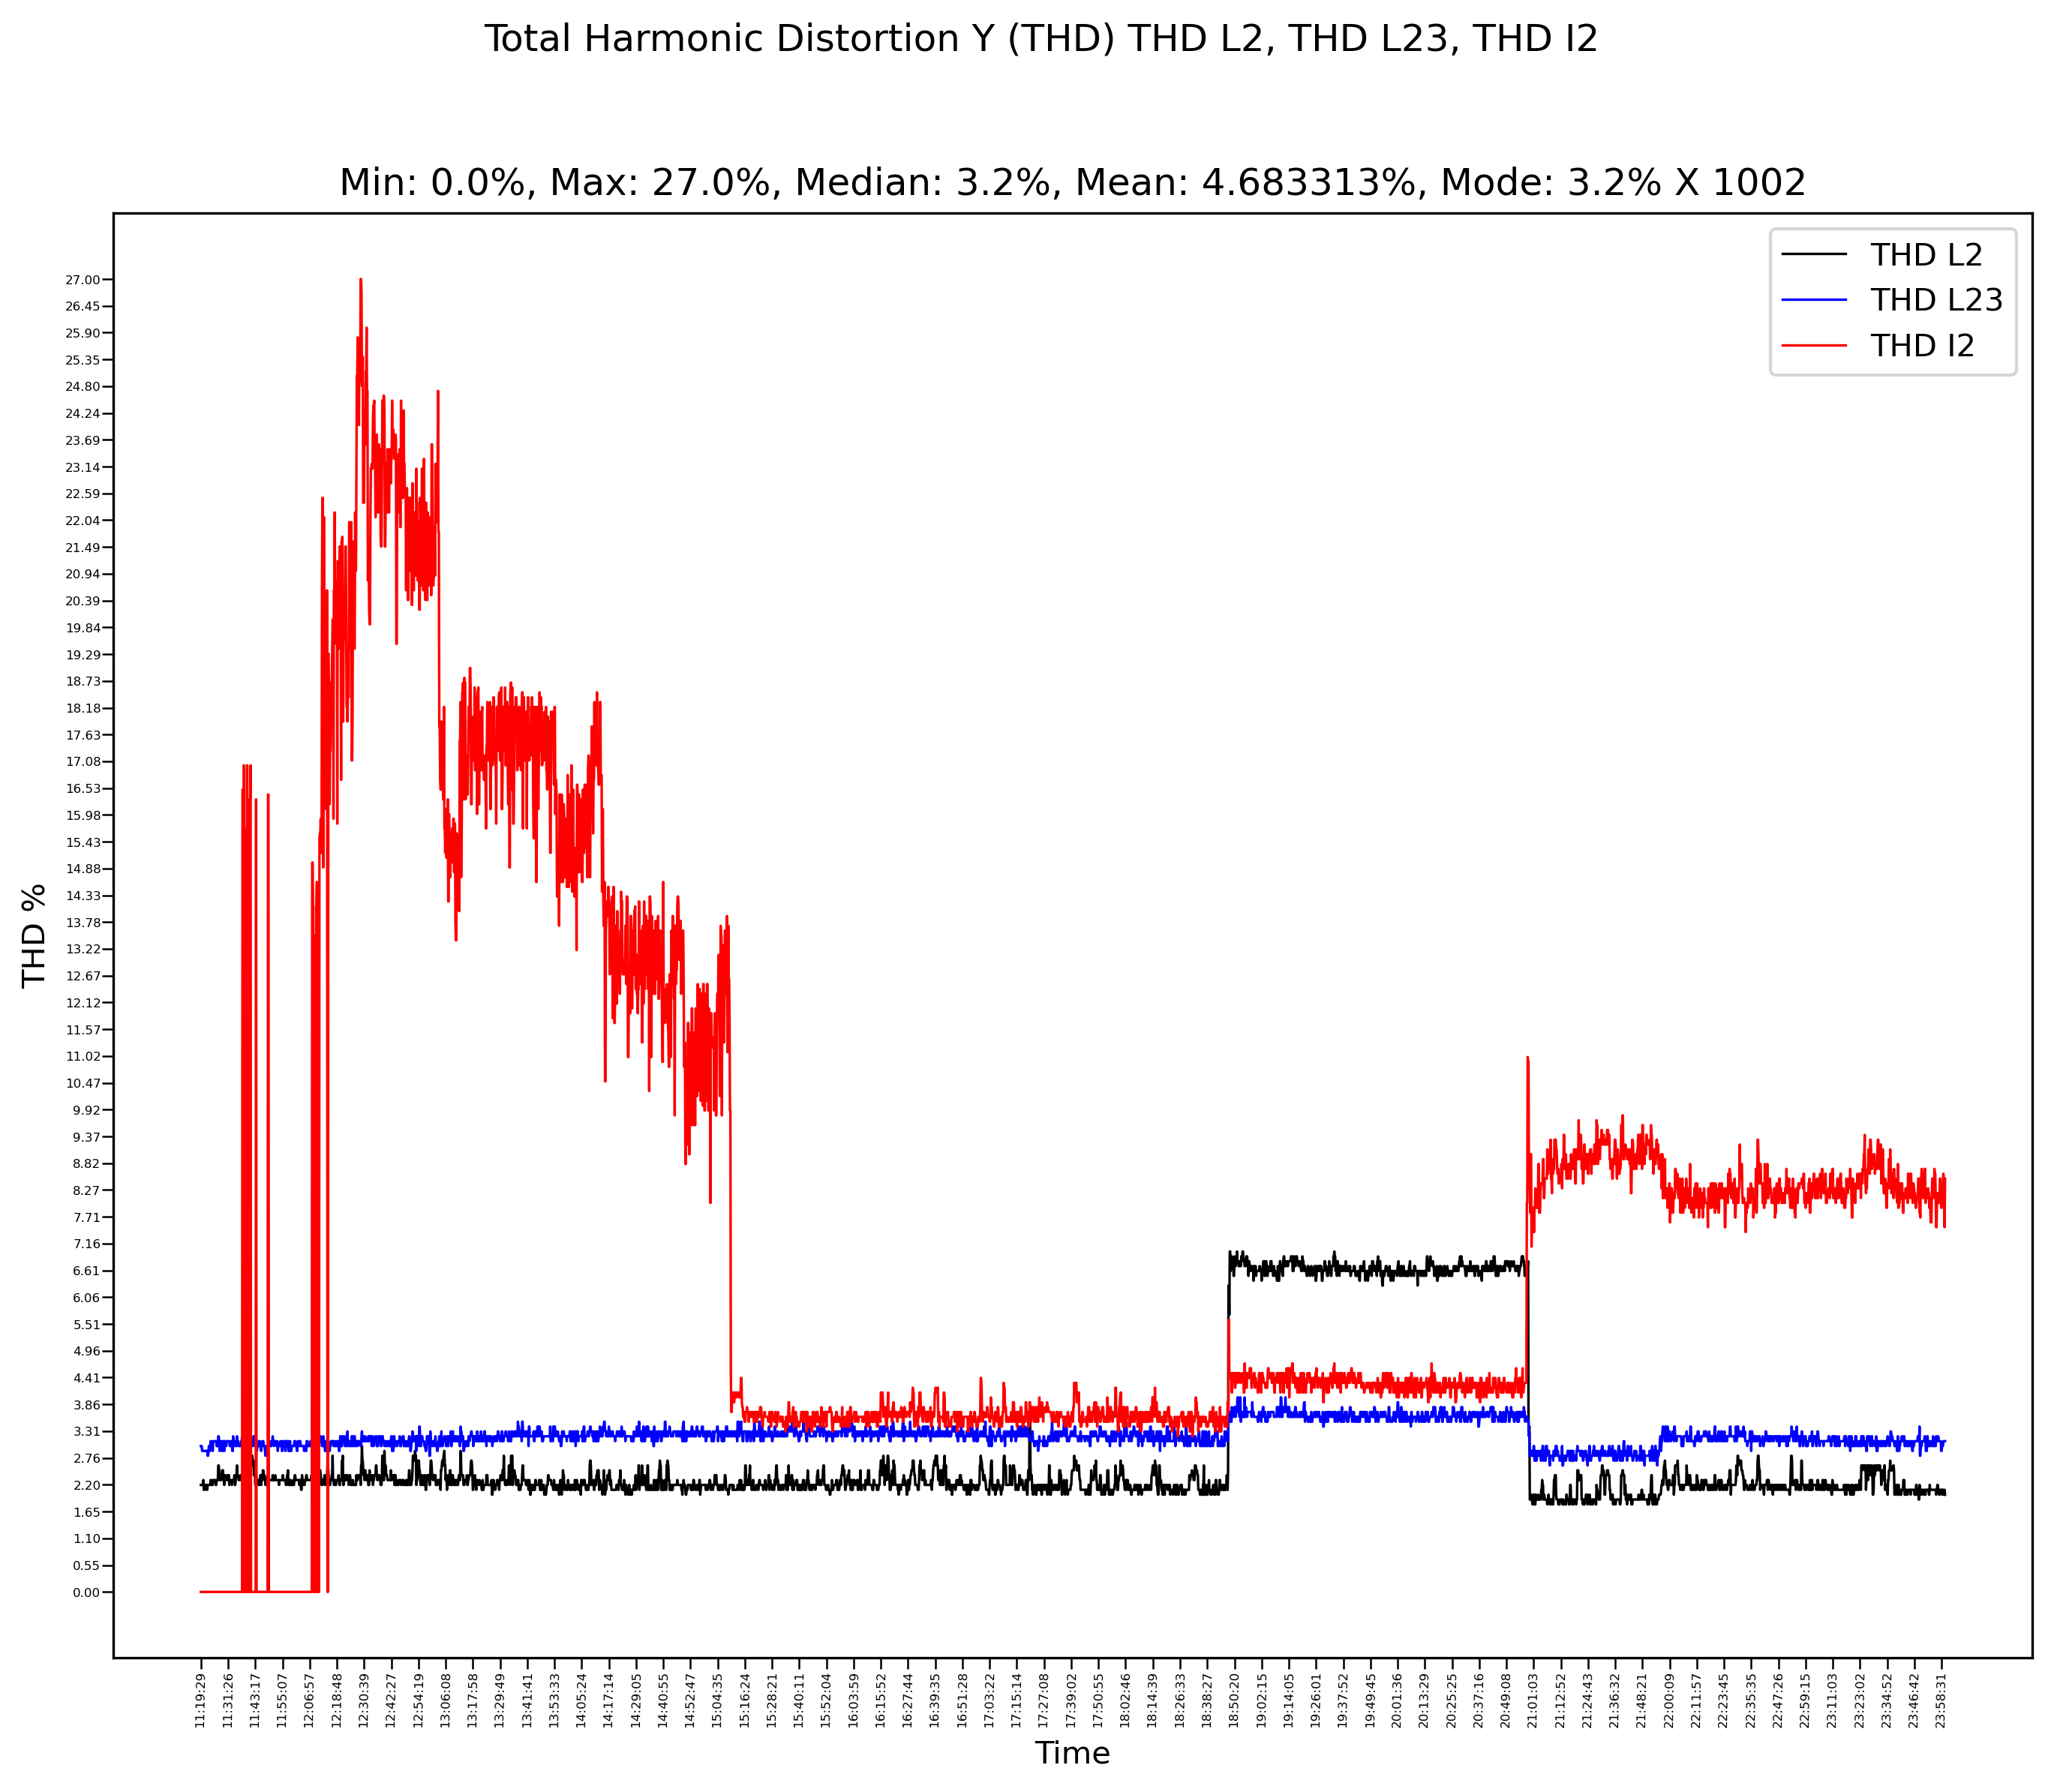

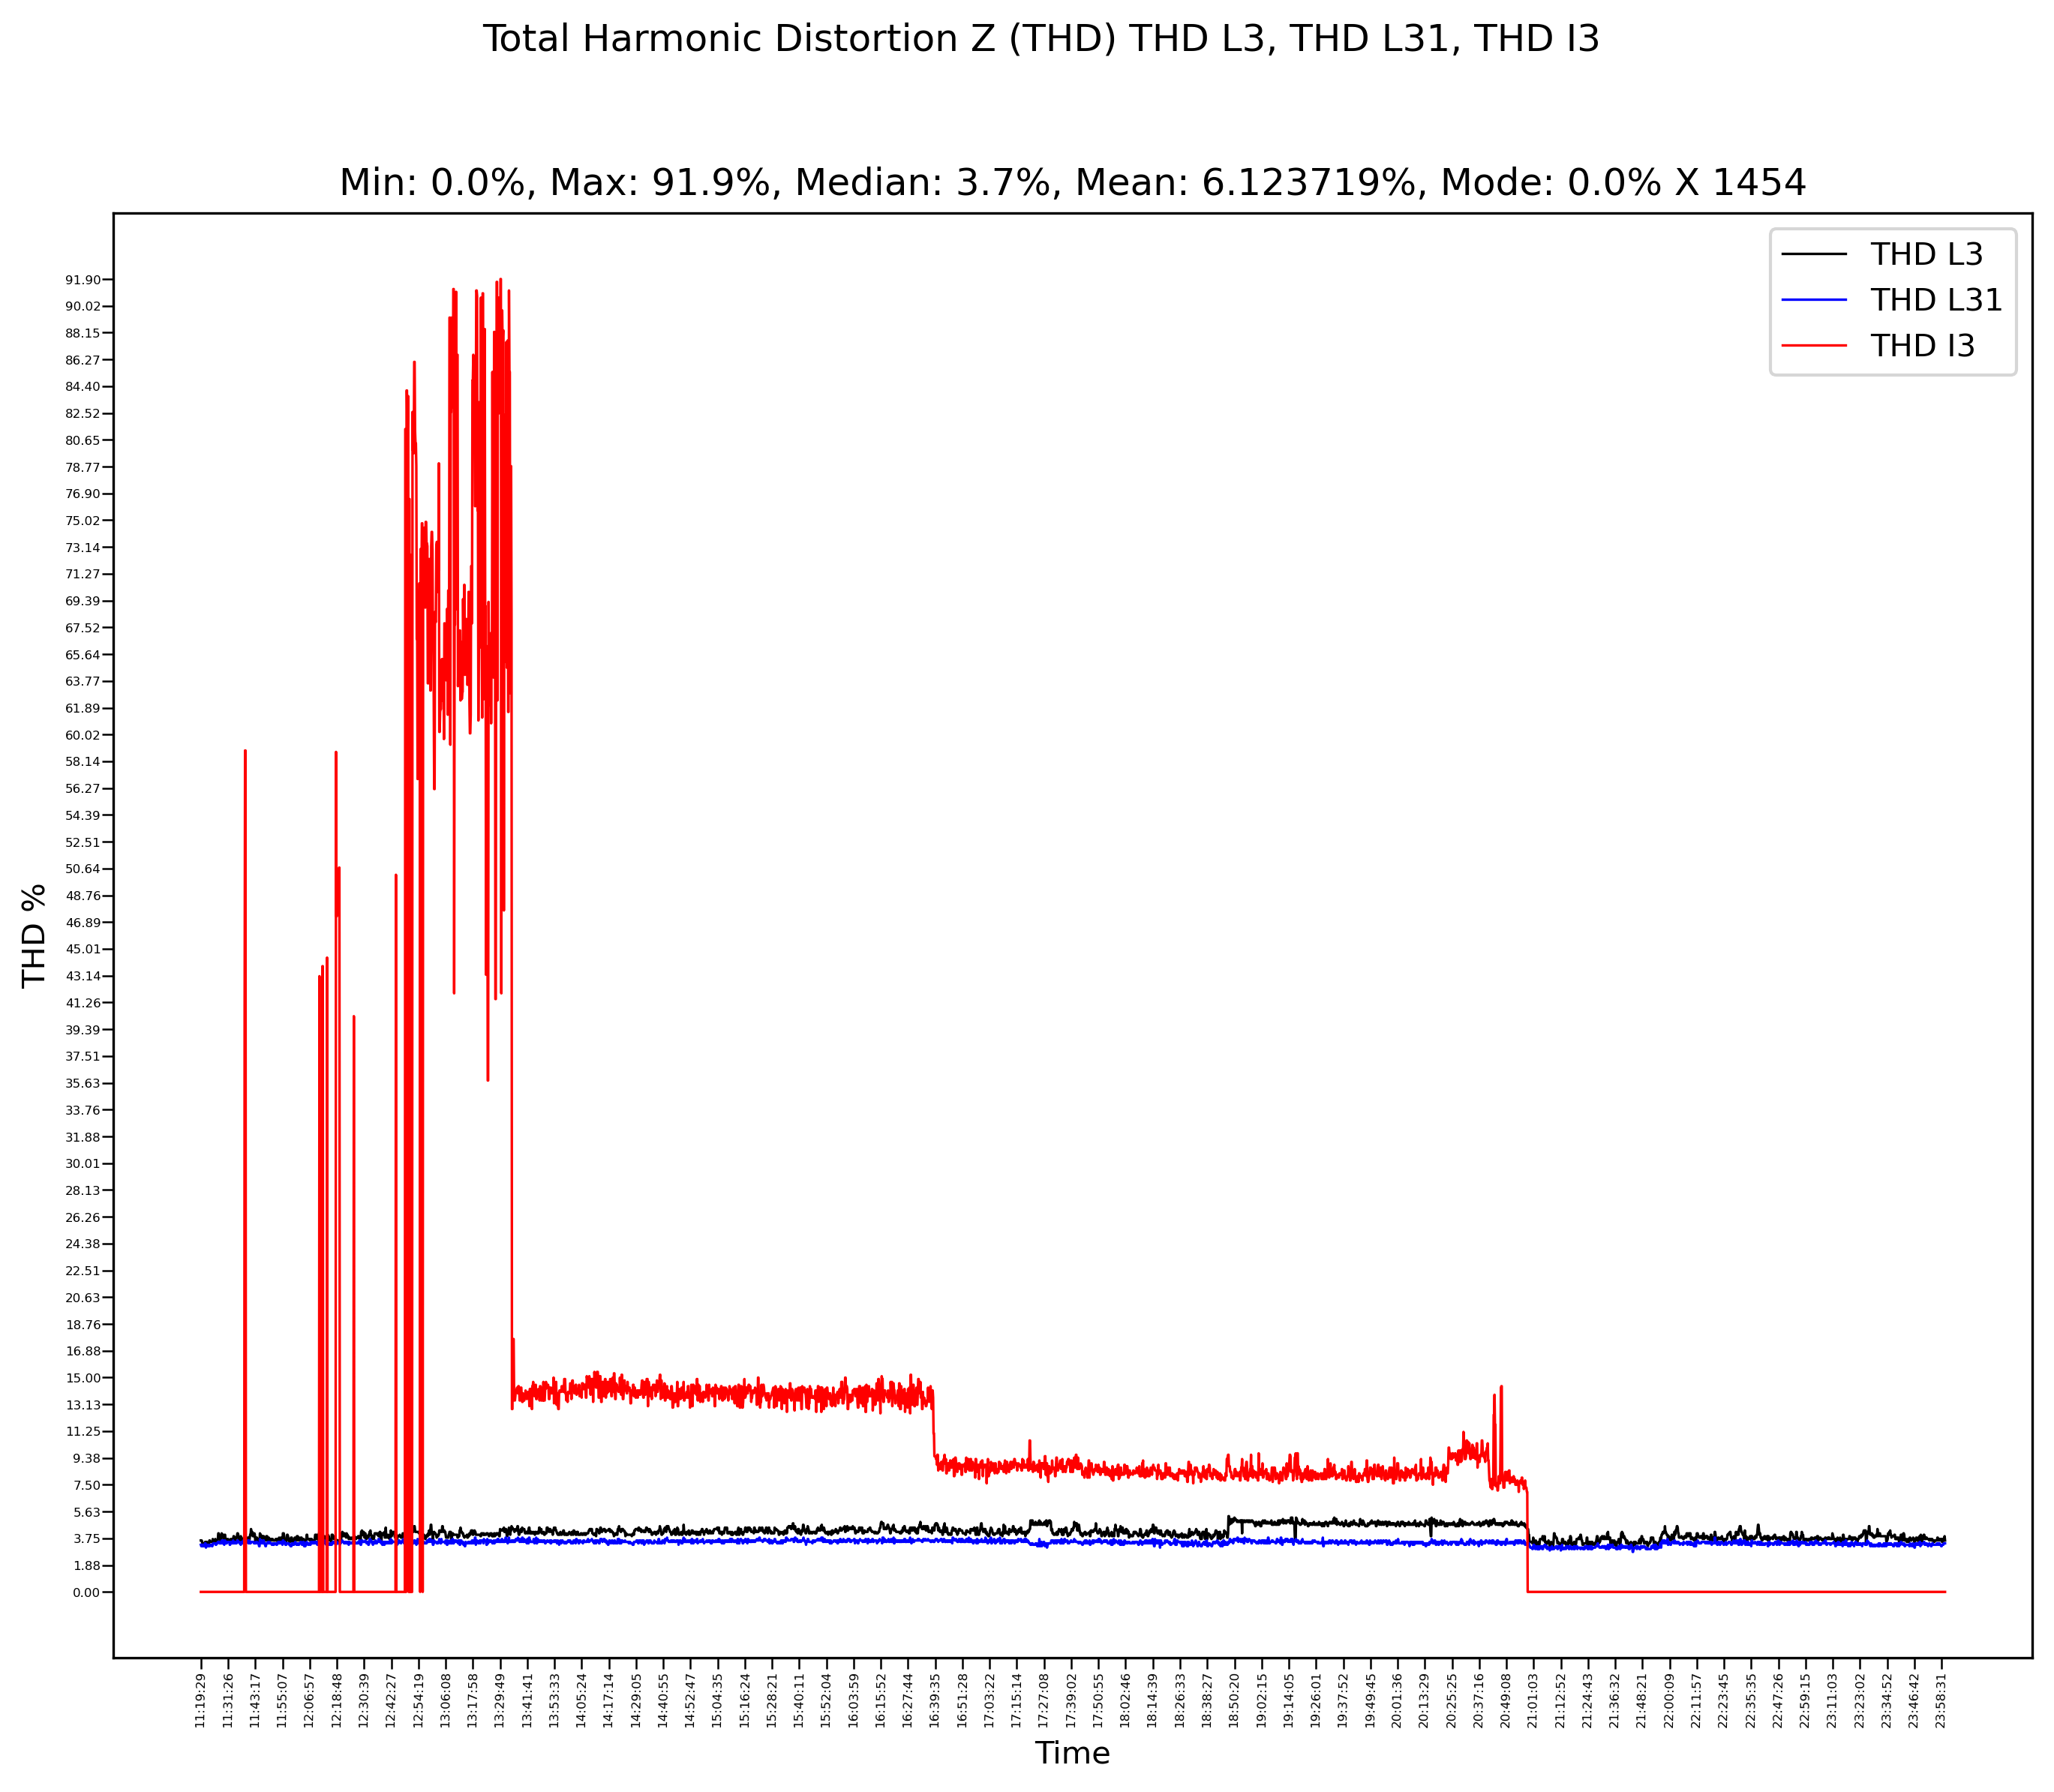

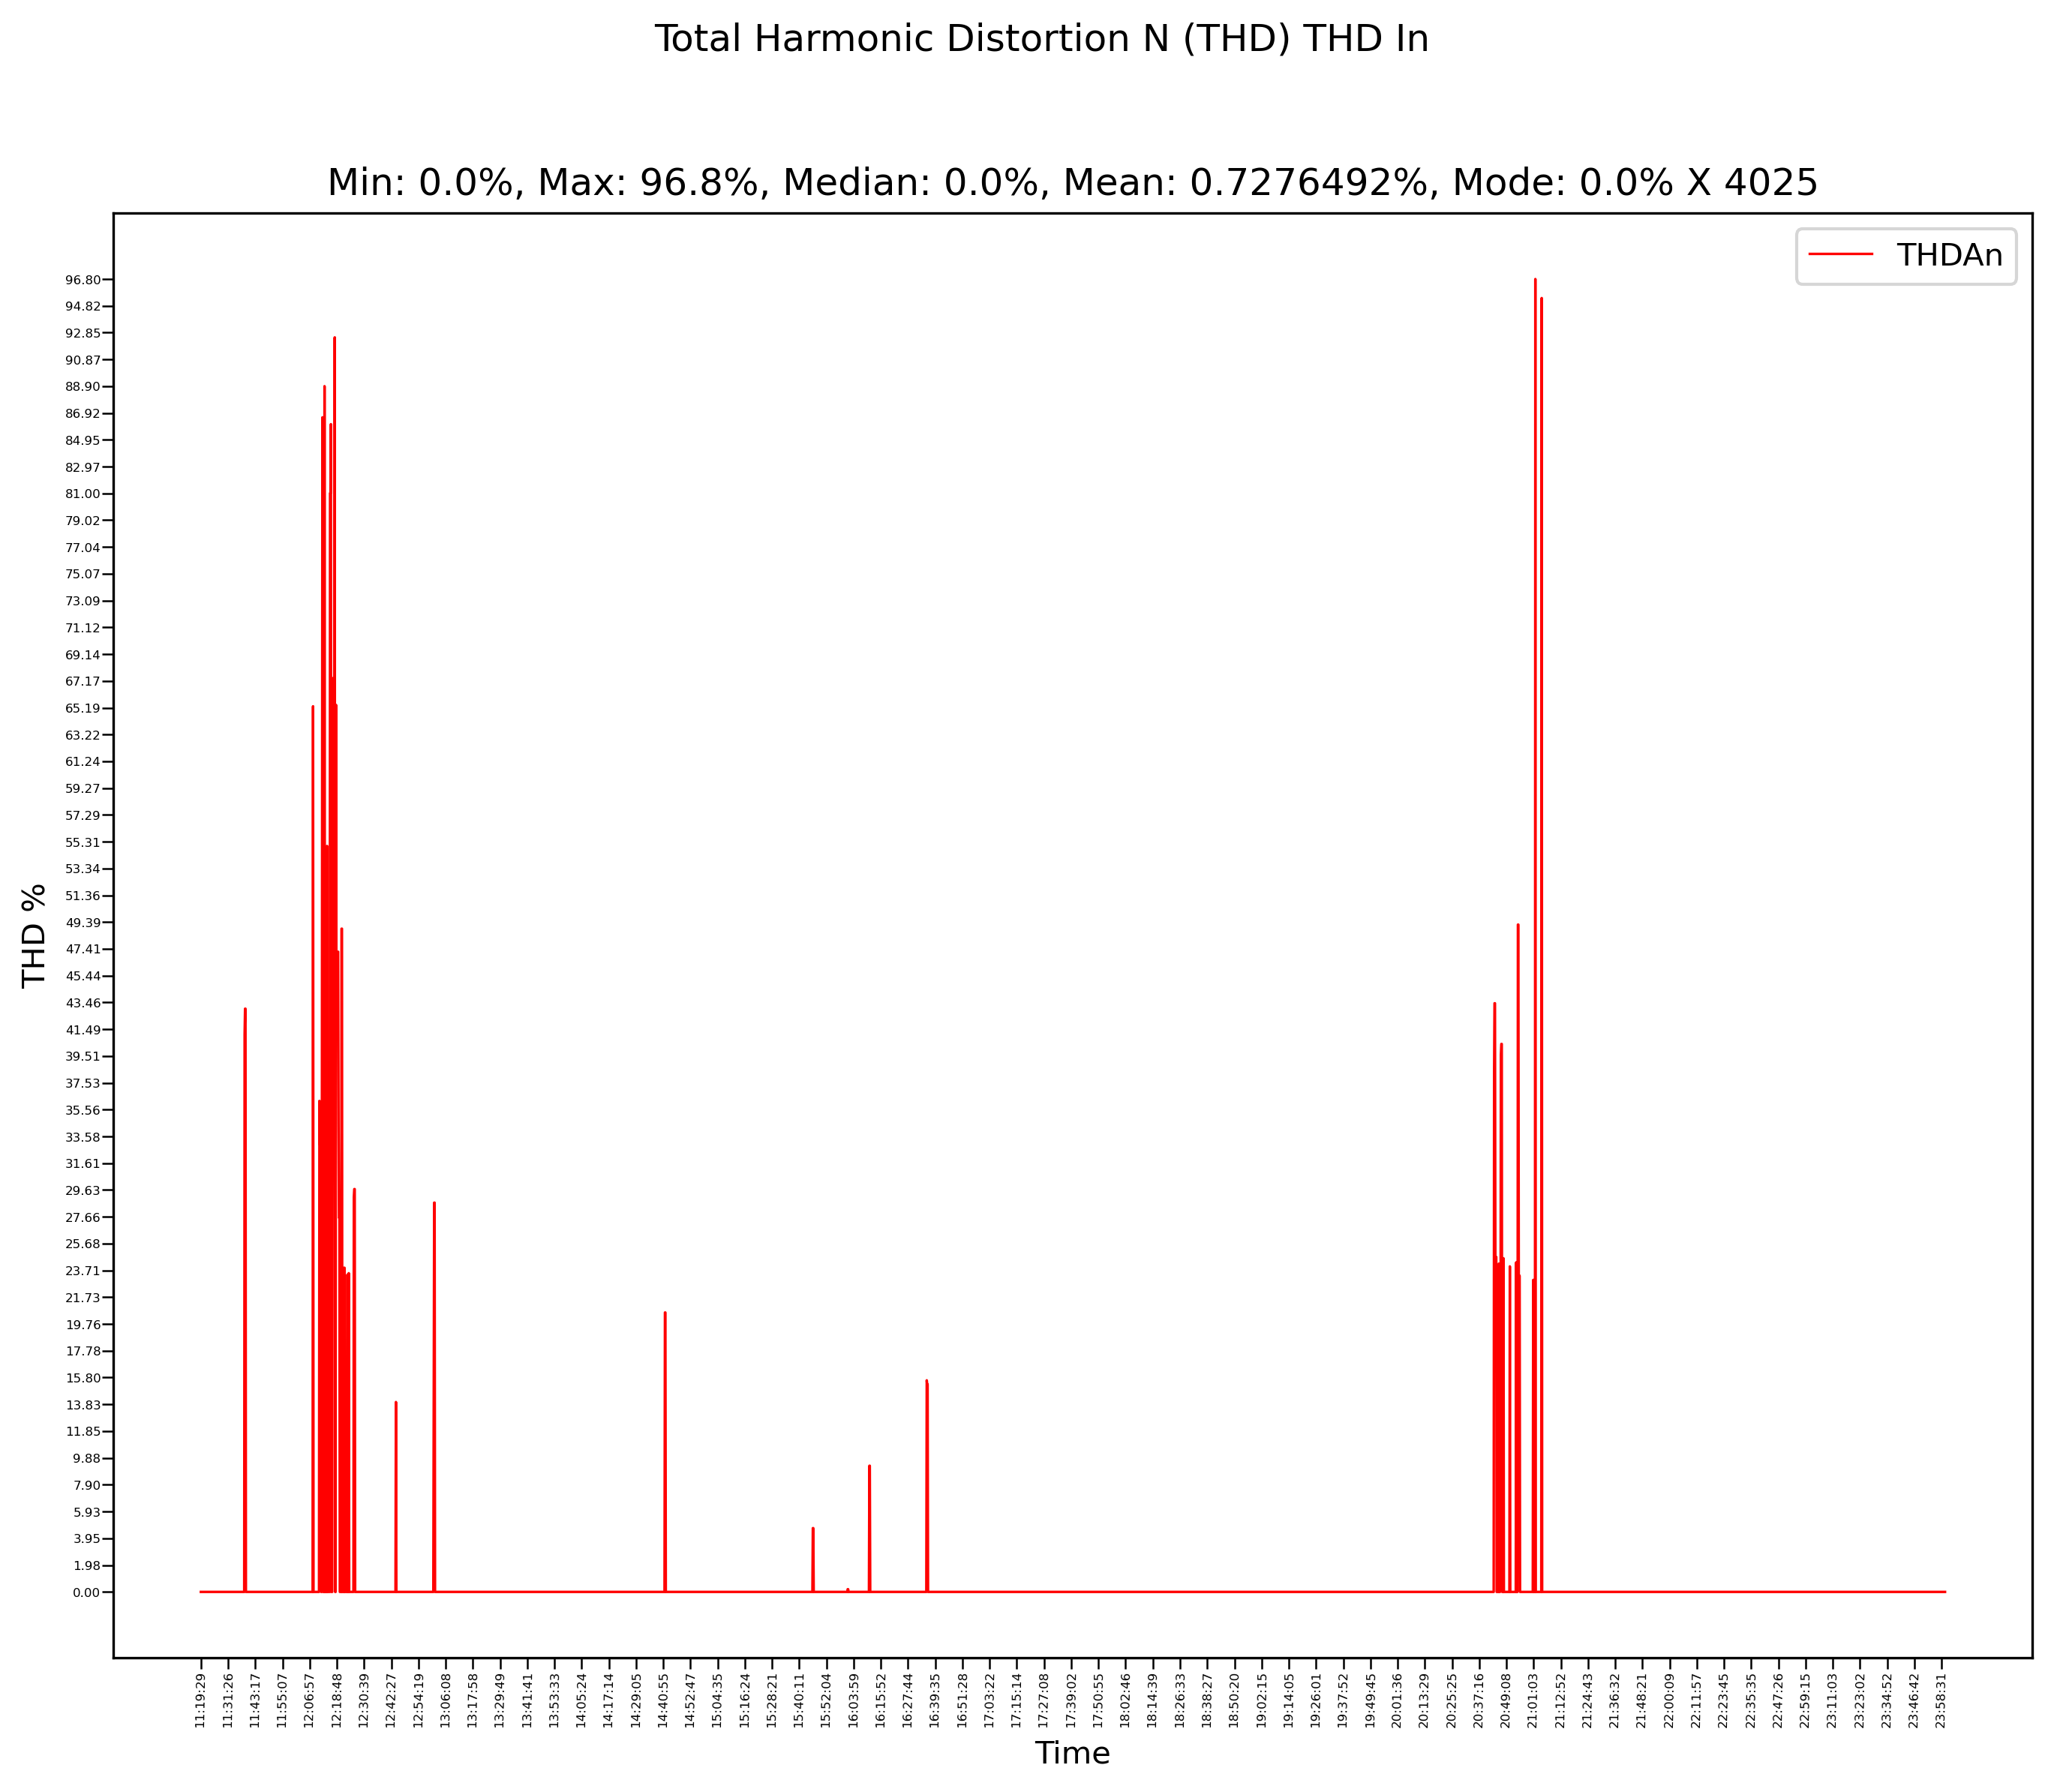

In [11]:
thdx = q.MLabsPlot('THDX')
thdx.mkplot(ML.multiData('THDX'))
thdy = q.MLabsPlot('THDY')
thdy.mkplot(ML.multiData('THDY'))
thdz = q.MLabsPlot('THDZ')
thdz.mkplot(ML.multiData('THDZ'))

thdan = q.MLabsPlot('THDAn')
thdan.mkplot(ML.PlotData('THDAn'))

# Log Counters


* Import Power 

Import power is the total kWh’s used

log file column: kWh_Im 

in kWh

* Export Power 

Since the meter is a line connected device export power is not used.

log file column: kWh_Ex 

in kWh

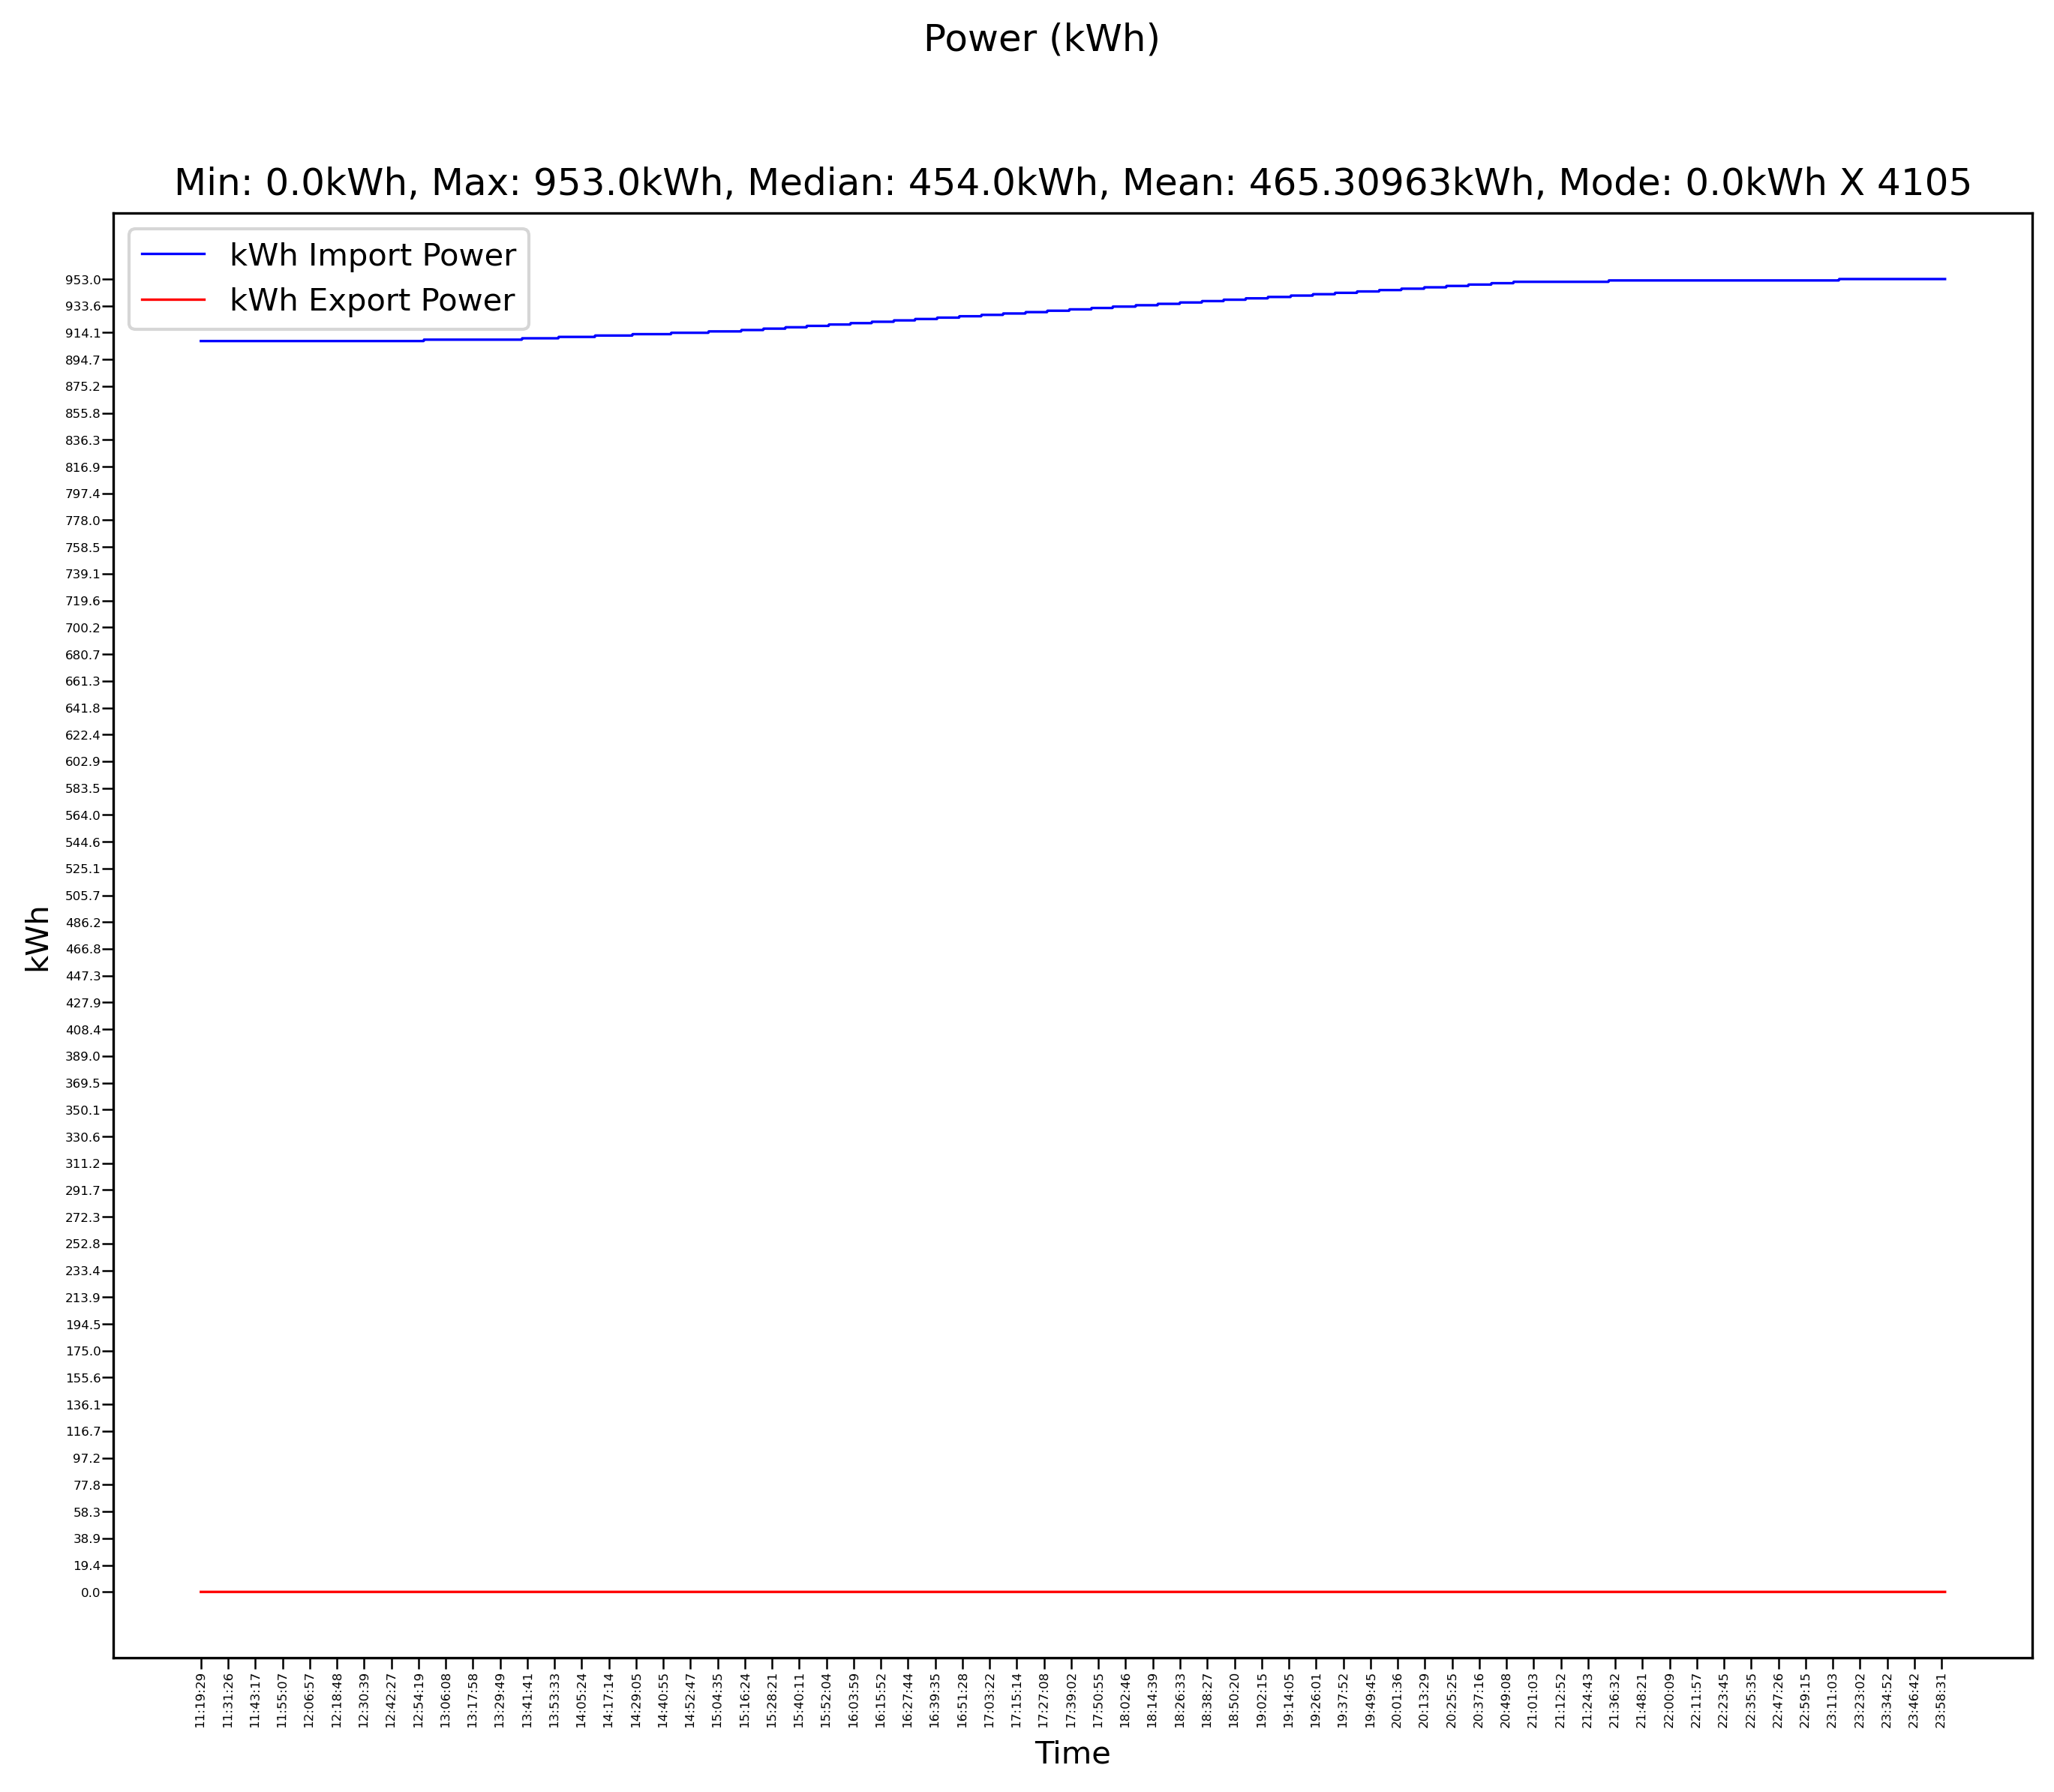

In [12]:
kWh = q.MLabsPlot('kWh')
kWh.mkplot(ML.multiData('kWh'))

## There are also counters for:

* Inductive Power

log file column: kVArh-I 

in kVArh


* Capacitive Power 

log file column: kVArh-C 

in kVArh



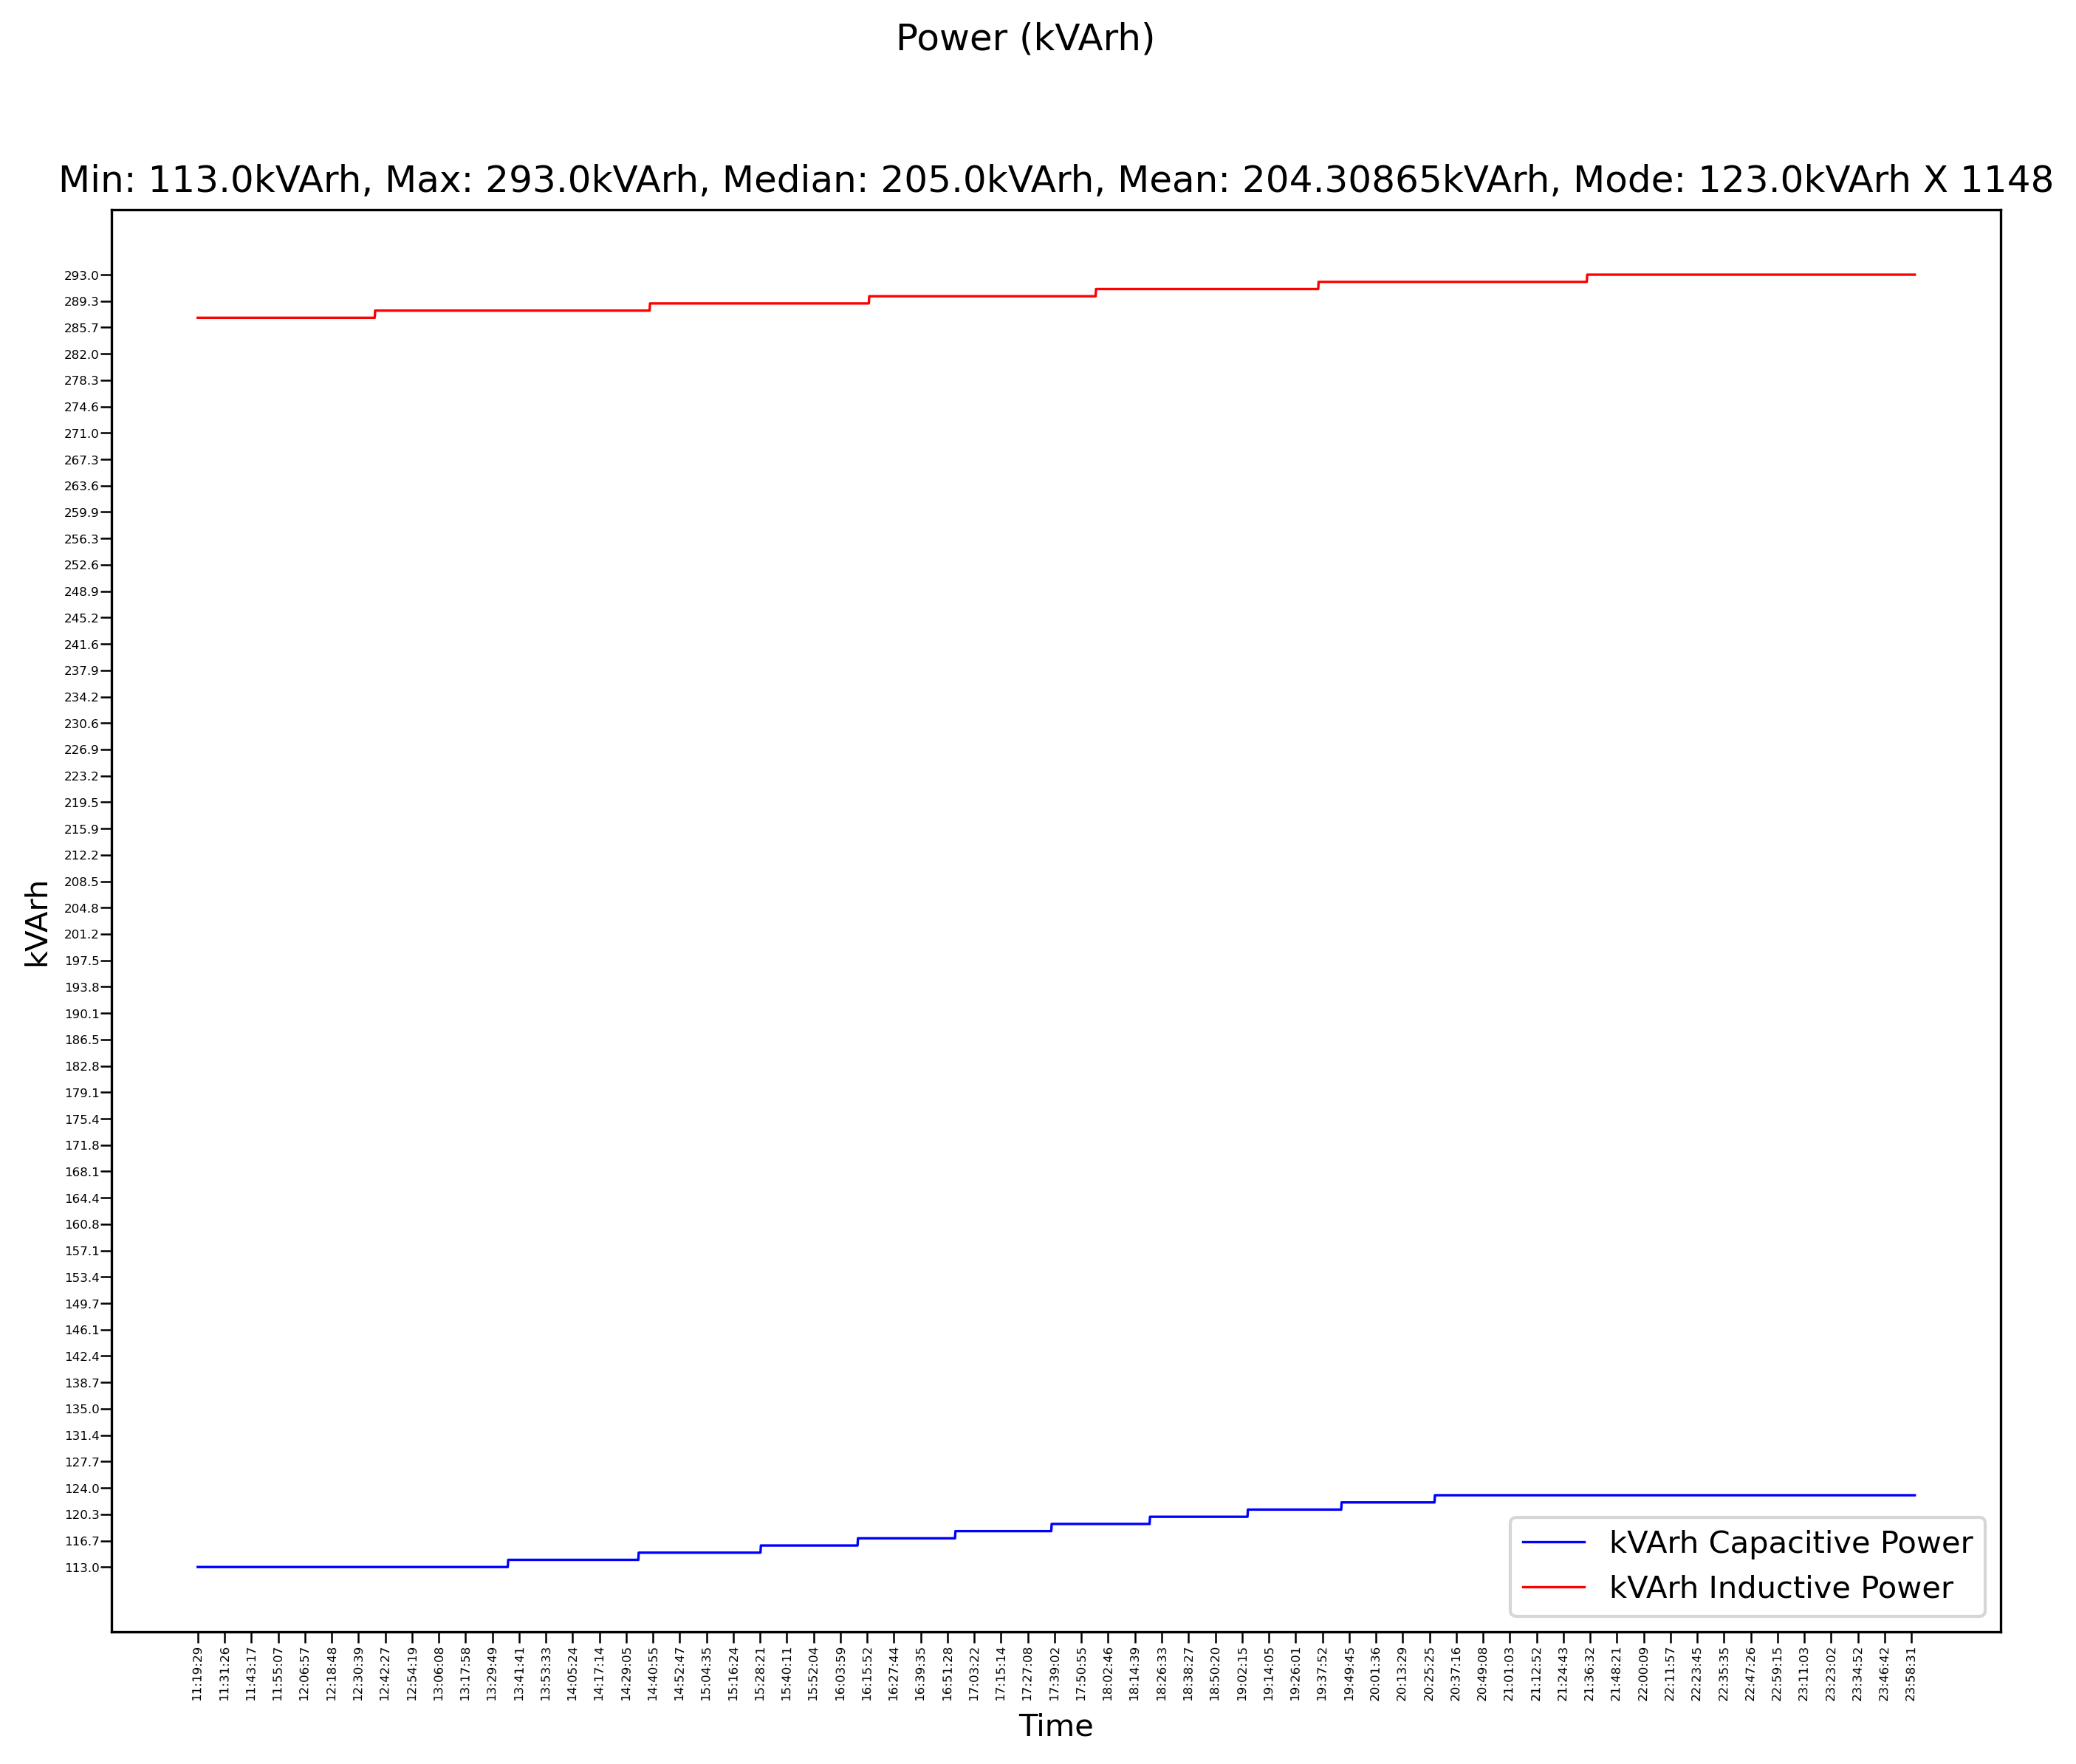

In [13]:
kVArh = q.MLabsPlot('kVArh')
kVArh.mkplot(ML.multiData('kVArh'))